In [1]:
# 그래프에 한국어폰트 나오게
!pip install koreanize-matplotlib

     |████████████████████████████████| 7.9 MB 6.0 MB/s            


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'


In [3]:
pwd

'/aiffel/aiffel/datathon_apt'

In [4]:
home = os.getenv('HOME') + '/aiffel/datathon_apt/data/' # 로컬에서 사용할 때 사용 하고 각자의 경로에 맞게 설정
# home = '/content/drive/MyDrive/data/'

## EDA

In [5]:
# 깃에서 클론 했을 시 trian 압축 해제
import zipfile


def unzip_file(zip_file_path, extract_to_path):
    """
    zip_file_path: 압축 파일의 경로
    extract_to_path: 압축을 푸는 경로
    """
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to_path)

# 사용 예시
zip_file_path = home + 'train.csv.zip' # 압축 파일 경로
extract_to_path = home  # 압축을 푸는 경로

unzip_file(zip_file_path, extract_to_path)

In [6]:
park = pd.read_csv(home + 'park.csv')
daycare = pd.read_csv(home + 'day_care_center.csv')
train_df = pd.read_csv(home + 'train.csv')
test_df = pd.read_csv(home +'test.csv')

In [7]:
train_df.shape, test_df.shape, daycare.shape, park.shape

((1216553, 13), (5463, 12), (7551, 11), (1359, 13))

In [8]:
# 각 데이터프레임의 .head()를 순차적으로 표시
dataframe_names = ['train_df', 'test_df', 'park', 'daycare']

# 정의된 데이터프레임 리스트를 순회하며 display 함수로 출력
for name in dataframe_names:
    print(f"{name}.head():")
    display(eval(name).head())
    display(eval(name).info())
    print("\n")  # 데이터프레임 사이에 공백 줄 추가

train_df.head():


transaction_id  apartment_id   city dong   jibun       apt  \
0               0          7622  서울특별시  신교동    6-13  신현(101동)   
1               1          5399  서울특별시  필운동     142    사직파크맨션   
2               2          3578  서울특별시  필운동   174-1    두레엘리시안   
3               3         10957  서울특별시  내수동      95     파크팰리스   
4               4         10639  서울특별시  내수동  110-15      킹스매너   

             addr_kr  exclusive_use_area  year_of_completion  \
0  신교동 6-13 신현(101동)               84.82                2002   
1     필운동 142 사직파크맨션               99.17                1973   
2   필운동 174-1 두레엘리시안               84.74                2007   
3       내수동 95 파크팰리스              146.39                2003   
4    내수동 110-15 킹스매너              194.43                2004   

   transaction_year_month transaction_date  floor  transaction_real_price  
0                  200801            21~31      2                   37500  
1                  200801             1~10      6                   20000  
2                  200801             1~10      6                   38500  
3                  200801            11~20     15                  118000  
4                  200801            21~31      3                  120000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216553 entries, 0 to 1216552
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   transaction_id          1216553 non-null  int64  
 1   apartment_id            1216553 non-null  int64  
 2   city                    1216553 non-null  object 
 3   dong                    1216553 non-null  object 
 4   jibun                   1216553 non-null  object 
 5   apt                     1216553 non-null  object 
 6   addr_kr                 1216553 non-null  object 
 7   exclusive_use_area      1216553 non-null  float64
 8   year_of_completion      1216553 non-null  int64  
 9   transaction_year_month  1216553 non-null  int64  
 10  transaction_date        1216553 non-null  object 
 11  floor                   1216553 non-null  int64  
 12  transaction_real_price  1216553 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 120.7+ M

None



test_df.head():


transaction_id  apartment_id   city dong   jibun              apt  \
0         1145756         10453  서울특별시   목동     938               청학   
1         1198704           989  부산광역시  초량동  1143-8             고관맨션   
2         1222384          8597  부산광역시  괴정동  447-13             우림그린   
3         1179897         11086  서울특별시  대치동  1007-2  풍림아이원4차(1007-2)   
4         1223091          2121  부산광역시  다대동    1670         다대롯데캐슬블루   

                      addr_kr  exclusive_use_area  year_of_completion  \
0                   목동 938 청학             35.5500                2002   
1             초량동 1143-8 고관맨션             68.7200                1977   
2             괴정동 447-13 우림그린             72.5400                1989   
3  대치동 1007-2 풍림아이원4차(1007-2)            111.5400                2004   
4           다대동 1670 다대롯데캐슬블루            119.6398                2014   

   transaction_year_month transaction_date  floor  
0                  201711            11~20      2  
1                  201708            21~31      2  
2                  201710            11~20      2  
3                  201707             1~10     10  
4                  201712            11~20     21

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5463 entries, 0 to 5462
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   transaction_id          5463 non-null   int64  
 1   apartment_id            5463 non-null   int64  
 2   city                    5463 non-null   object 
 3   dong                    5463 non-null   object 
 4   jibun                   5463 non-null   object 
 5   apt                     5463 non-null   object 
 6   addr_kr                 5463 non-null   object 
 7   exclusive_use_area      5463 non-null   float64
 8   year_of_completion      5463 non-null   int64  
 9   transaction_year_month  5463 non-null   int64  
 10  transaction_date        5463 non-null   object 
 11  floor                   5463 non-null   int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 512.3+ KB


None



park.head():


city  gu dong park_name park_type  park_area park_exercise_facility  \
0  부산광역시  남구  대연동      대연공원      근린공원    55227.0                    NaN   
1  부산광역시  남구  대연동      당곡공원      역사공원    75465.0                    NaN   
2  부산광역시  남구  대연동   대일어린이공원     어린이공원      422.1                    NaN   
3  부산광역시  남구  대연동   못골어린이공원     어린이공원      499.8                    NaN   
4  부산광역시  남구  용호동   솔밭어린이공원     어린이공원     1500.2                    NaN   

  park_entertainment_facility park_benefit_facility park_cultural_facitiy  \
0                         NaN                   NaN                   NaN   
1                         NaN                   NaN                   NaN   
2                         NaN                   NaN                   NaN   
3                         NaN                   NaN                   NaN   
4                         NaN                   NaN                   NaN   

  park_facility_other  park_open_year reference_date  
0                 NaN          1944.0     2018-08-14  
1                 NaN          1944.0     2018-08-14  
2                 NaN          1965.0     2018-08-14  
3                 NaN          1968.0     2018-08-14  
4                 NaN          1970.0     2018-08-14

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   city                         1359 non-null   object 
 1   gu                           1356 non-null   object 
 2   dong                         1359 non-null   object 
 3   park_name                    1359 non-null   object 
 4   park_type                    1359 non-null   object 
 5   park_area                    1359 non-null   float64
 6   park_exercise_facility       277 non-null    object 
 7   park_entertainment_facility  435 non-null    object 
 8   park_benefit_facility        266 non-null    object 
 9   park_cultural_facitiy        72 non-null     object 
 10  park_facility_other          175 non-null    object 
 11  park_open_year               937 non-null    float64
 12  reference_date               1359 non-null   object 
dtypes: float64(2), obj

None



daycare.head():


city    gu day_care_name day_care_type  day_care_baby_num  teacher_num  \
0  서울특별시  서대문구        가람어린이집           국공립                 70         11.0   
1  서울특별시  서대문구      가좌제일어린이집           국공립                 88         22.0   
2  서울특별시  서대문구       경찰청어린이집            직장                 90         23.0   
3  서울특별시  서대문구      고운햇살어린이집            가정                 18          5.0   
4  서울특별시  서대문구        고은어린이집           국공립                 93         20.0   

   nursing_room_num  playground_num  CCTV_num is_commuting_vehicle  \
0               5.0             1.0       7.0                    N   
1               5.0             2.0      10.0                    N   
2               6.0             1.0      32.0                    N   
3               3.0             0.0       4.0                    N   
4               7.0             2.0      10.0                    N   

  reference_date  
0     2018-07-31  
1     2018-07-31  
2     2018-07-31  
3     2018-07-31  
4     2018-07-31

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7551 entries, 0 to 7550
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   city                  7551 non-null   object 
 1   gu                    7551 non-null   object 
 2   day_care_name         7551 non-null   object 
 3   day_care_type         7551 non-null   object 
 4   day_care_baby_num     7551 non-null   int64  
 5   teacher_num           7326 non-null   float64
 6   nursing_room_num      4352 non-null   float64
 7   playground_num        3626 non-null   float64
 8   CCTV_num              5280 non-null   float64
 9   is_commuting_vehicle  7055 non-null   object 
 10  reference_date        7551 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 649.0+ KB


None

### 아파트 데이터

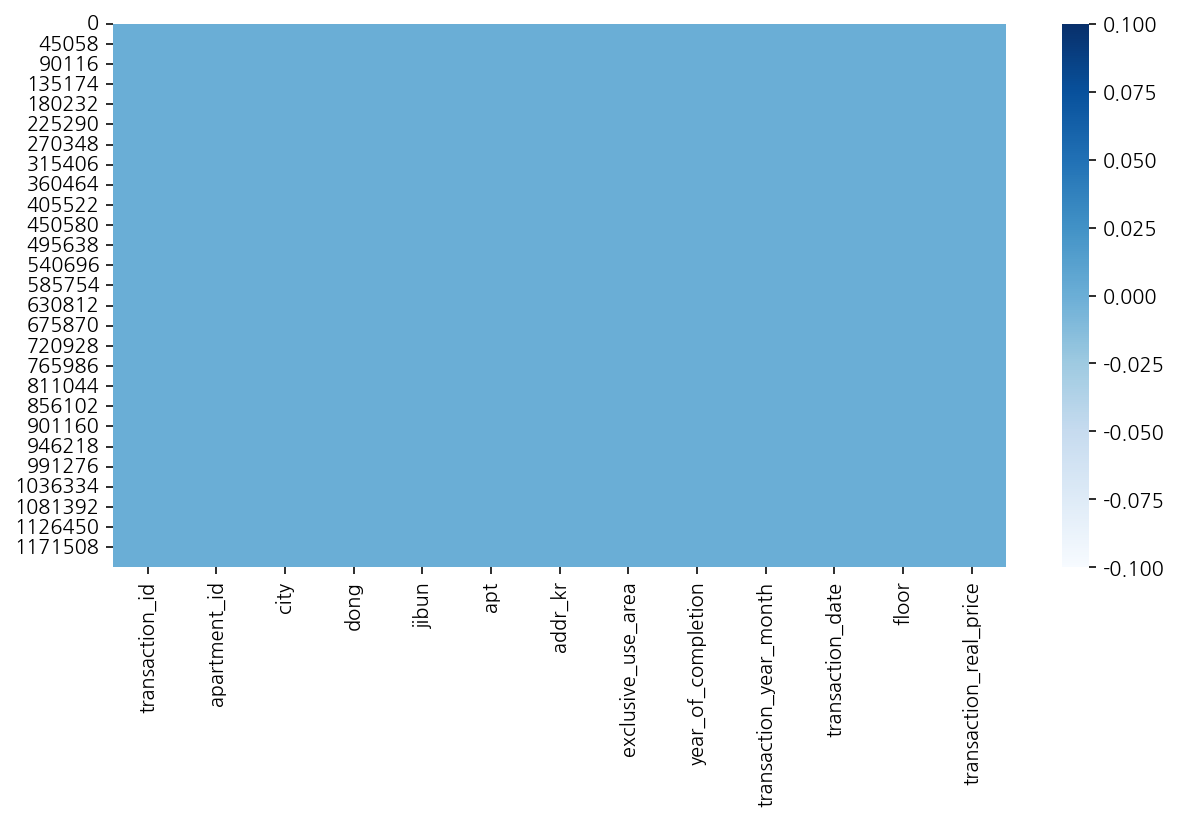

In [9]:
# 결측치 시각화
fig = plt.figure(figsize=(10, 5))
sns.heatmap(train_df.isnull(), cmap='Blues');

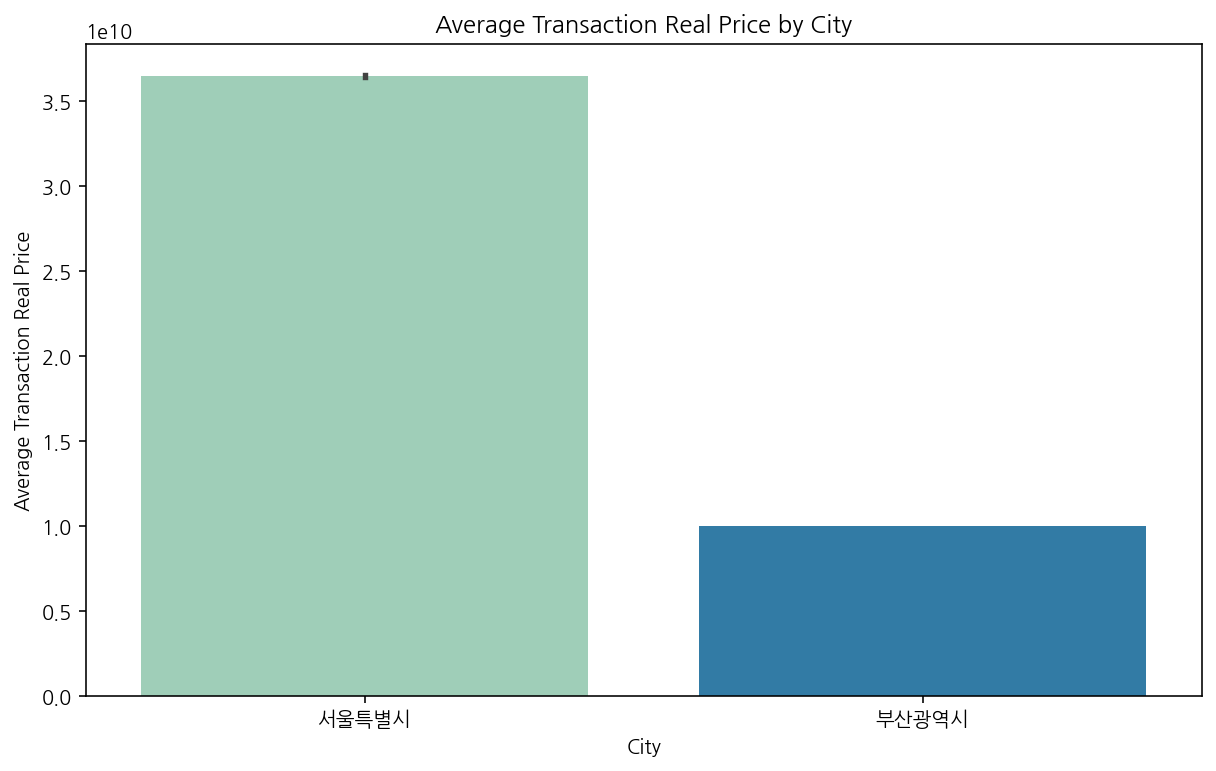

In [10]:
# 각 도시별 아파트 거래 가격의 평균 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='city', y='transaction_real_price', data=train_df, estimator=sum, palette='YlGnBu')
plt.title('Average Transaction Real Price by City')
plt.xlabel('City')
plt.ylabel('Average Transaction Real Price')
plt.show()



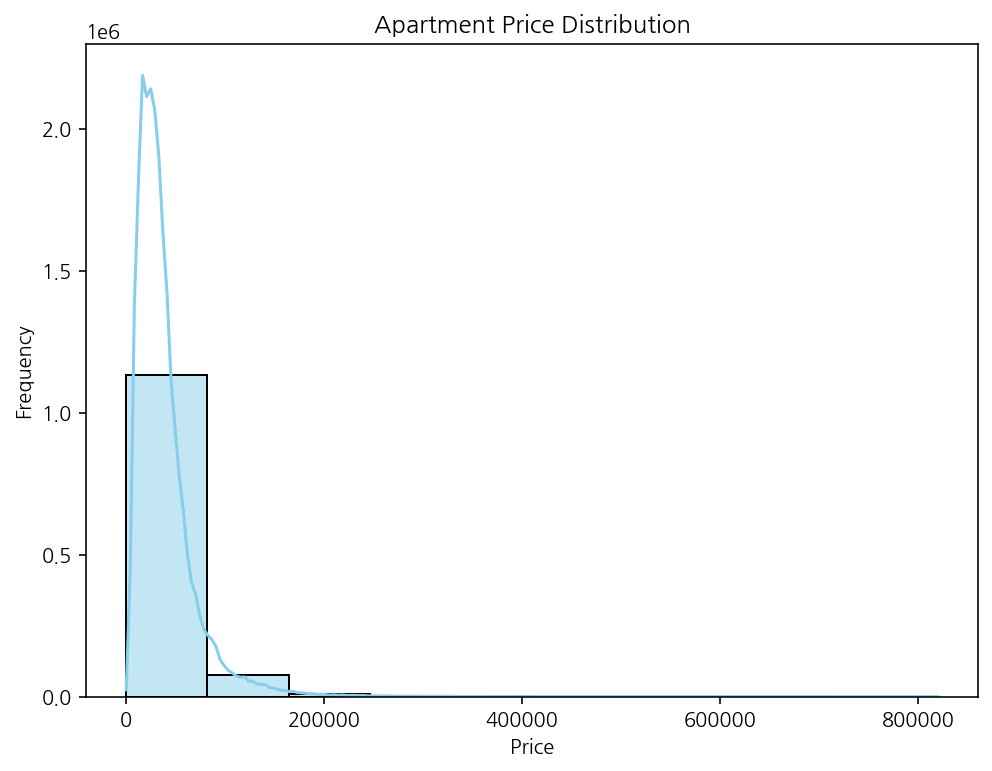

In [11]:
# 아파트 가격 분포 시각화
plt.figure(figsize=(8, 6))
sns.histplot(train_df['transaction_real_price'], bins=10, kde=True, color='skyblue', edgecolor='black')
plt.title('Apartment Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


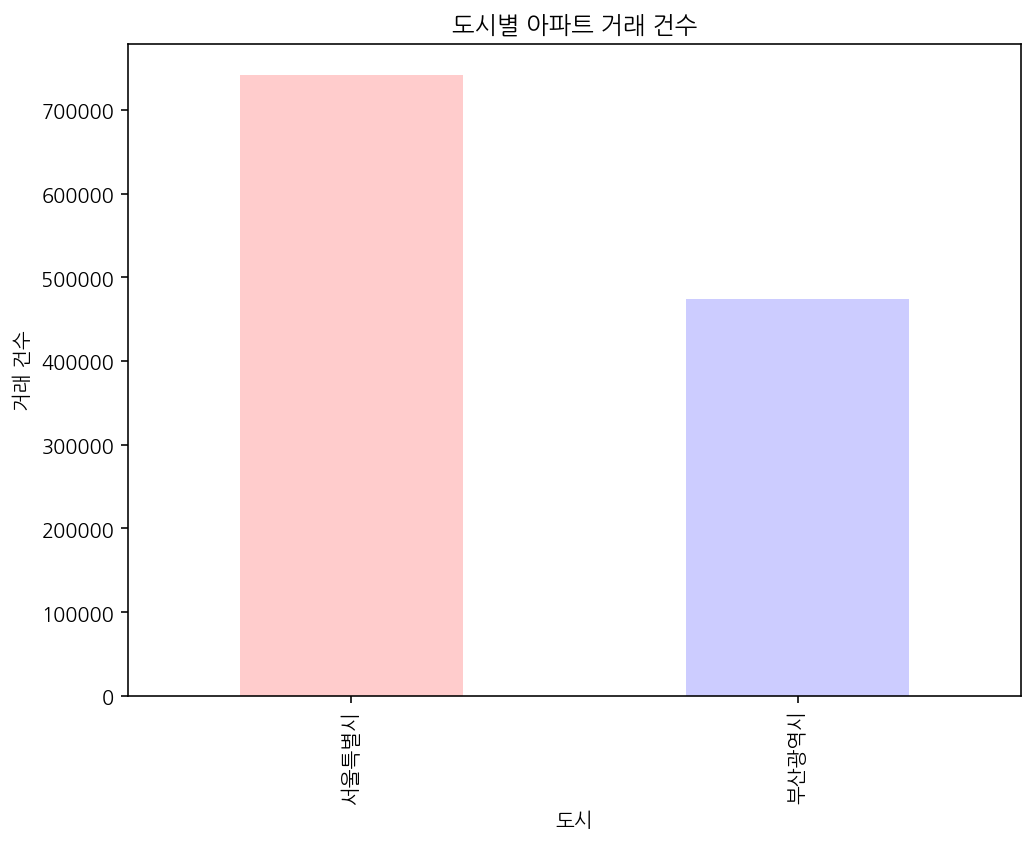

In [12]:
# 지역별 아파트 거래량
plt.figure(figsize=(8, 6))
train_df['city'].value_counts().plot(kind='bar', color=['red', 'blue'], alpha=0.2)
plt.title('도시별 아파트 거래 건수')
plt.xlabel('도시')
plt.ylabel('거래 건수')
plt.show()


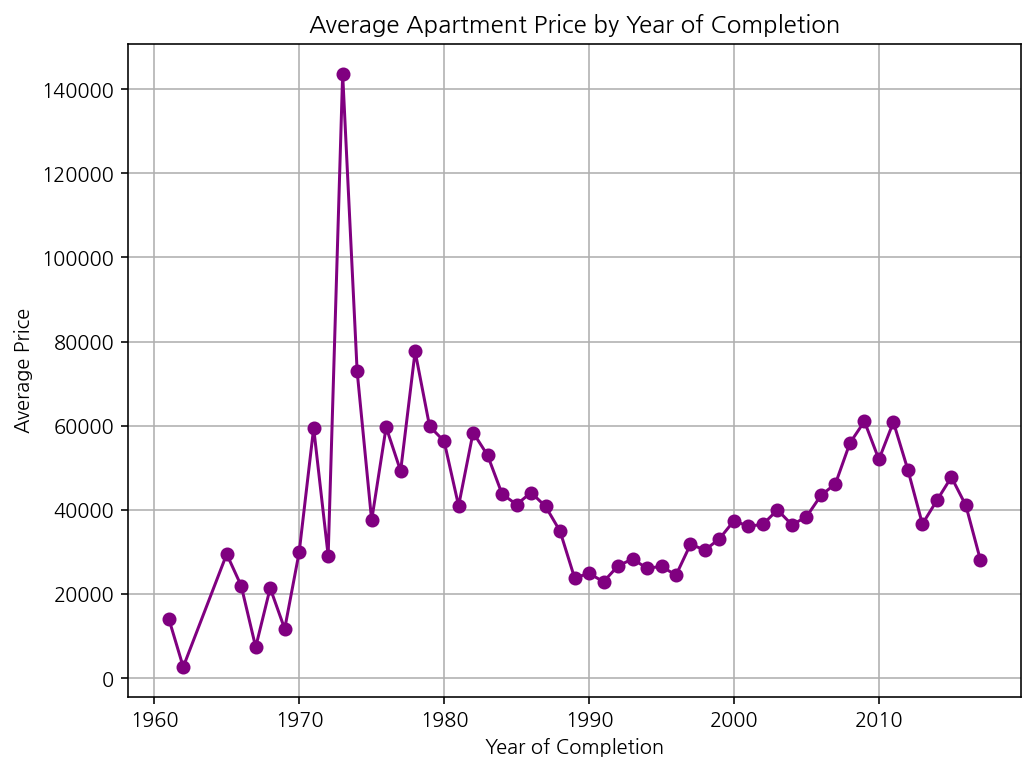

In [13]:
# 아파트 건축 연도별 변화 시각화
plt.figure(figsize=(8, 6))
train_df.groupby('year_of_completion')['transaction_real_price'].mean().plot(marker='o', color='purple')
plt.title('Average Apartment Price by Year of Completion')
plt.xlabel('Year of Completion')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()


In [14]:
# # 'dong' 별 평균 가격 계산
# train_df['dong_avg'] = train_df.groupby('dong')['transaction_real_price'].mean().sort_values()

# # 그래프 그리기
# plt.figure(figsize=(10, 6))
# train_df['dong_avg'].plot(kind='bar', color='skyblue')
# plt.title('Average Price by Dong')
# plt.xlabel('Dong')
# plt.ylabel('Average Price')
# plt.xticks(rotation=45)
# plt.grid(axis='y', linestyle='--')

# plt.show()

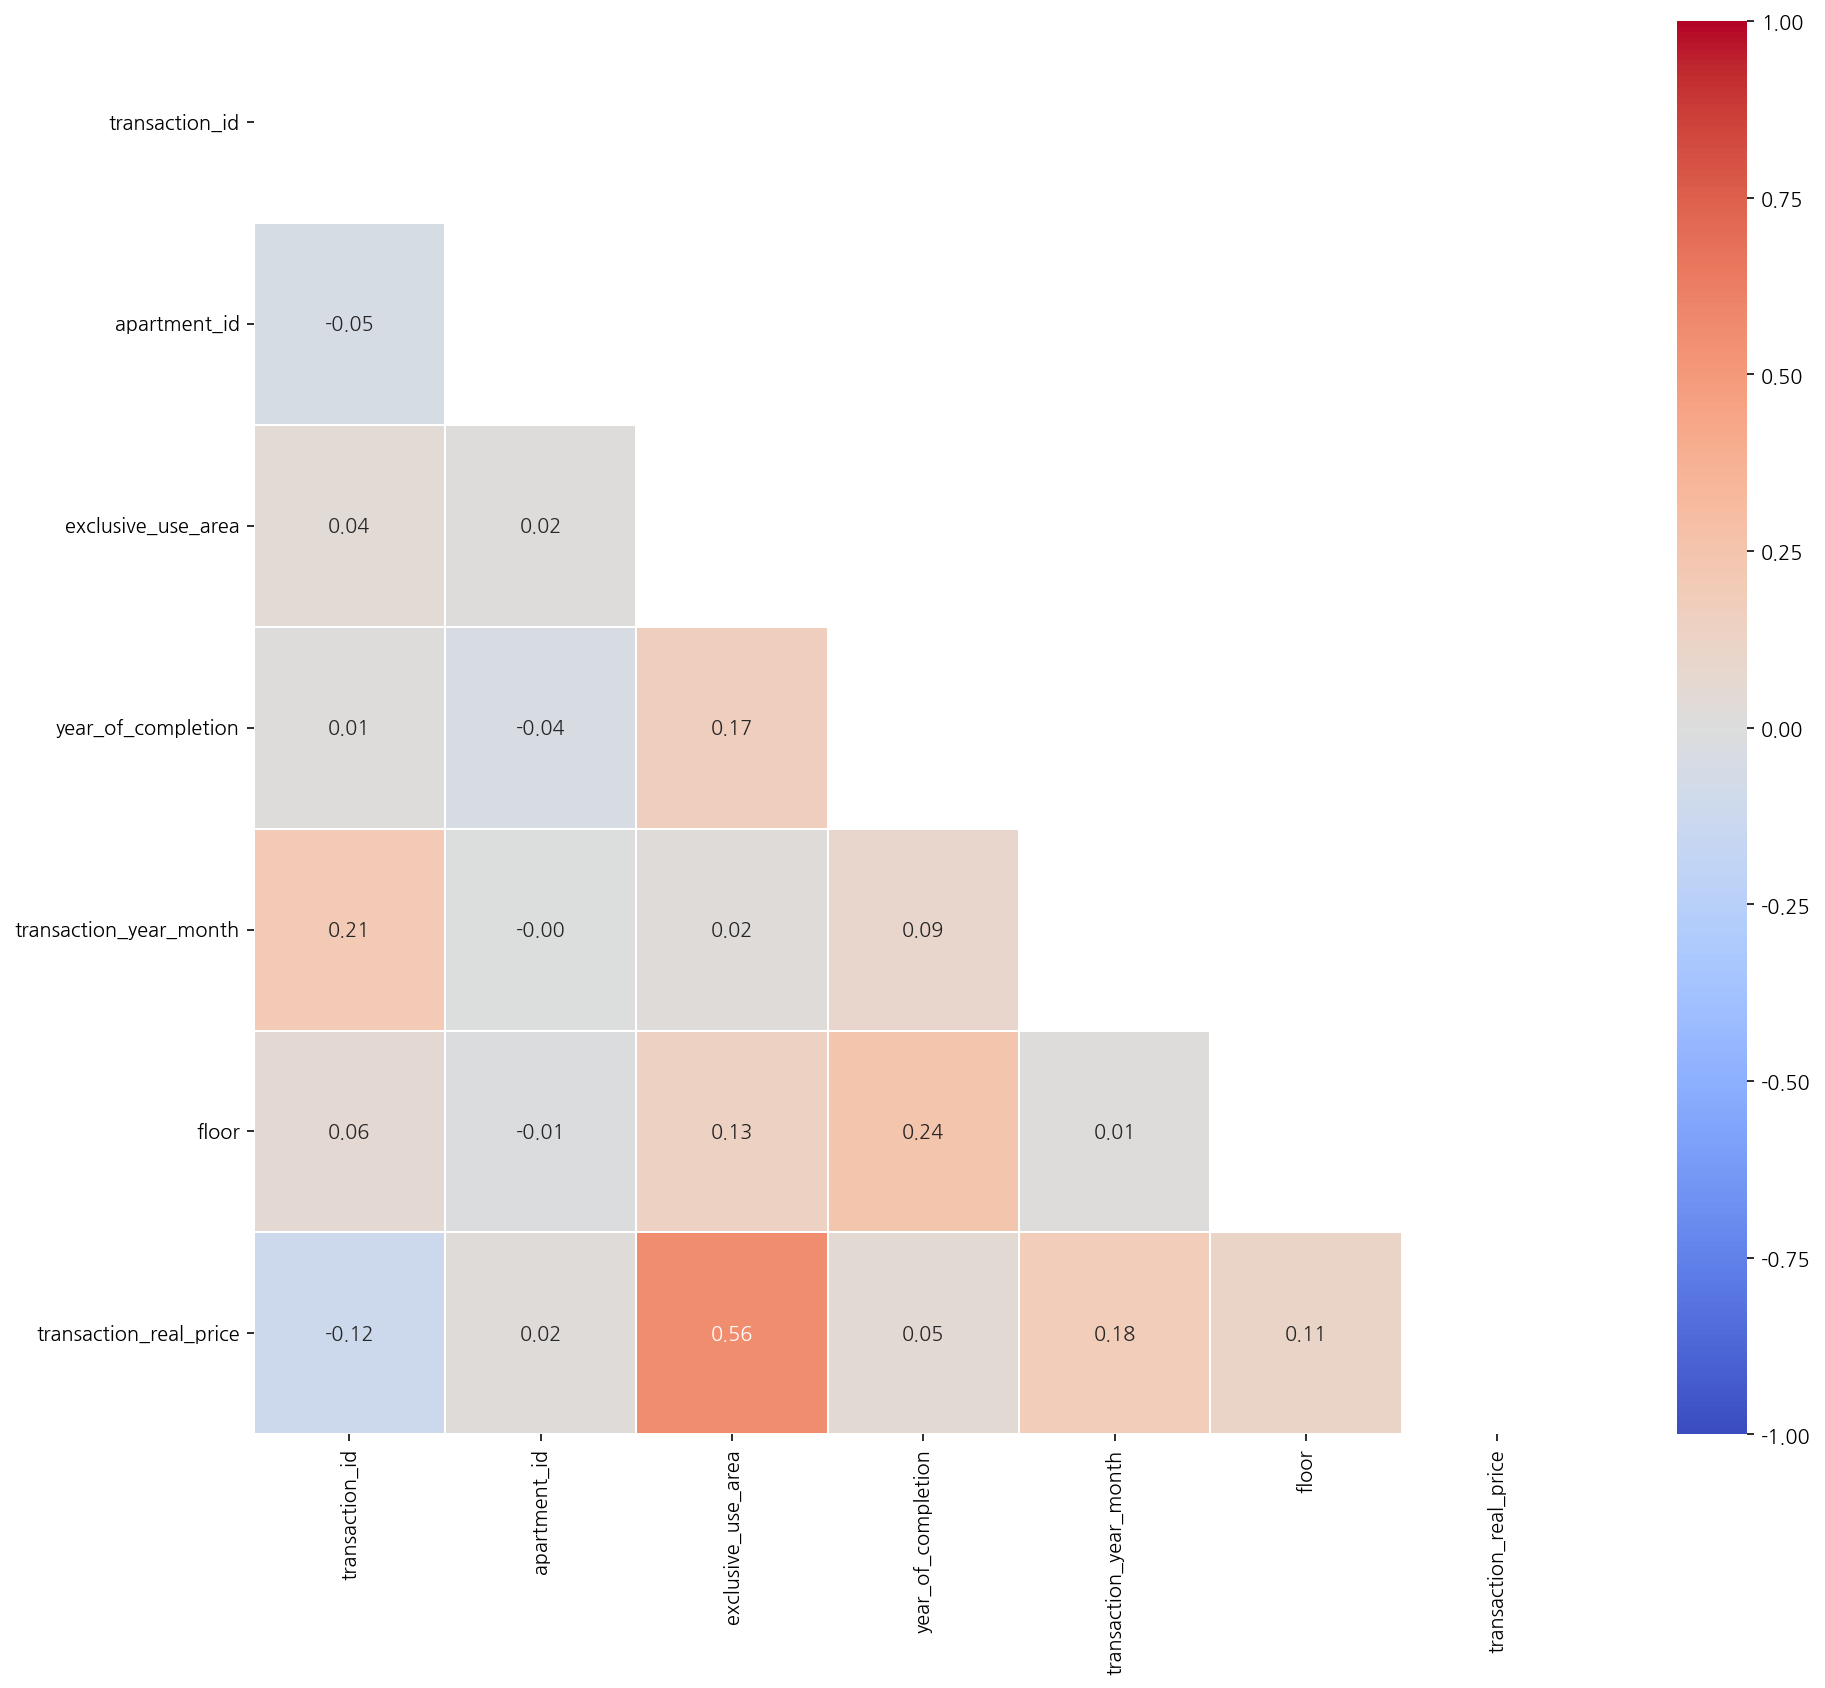

In [15]:
# 아파트 피쳐 상관관계 확인
# corr = train_df.corr(numeric_only=True)
# mask = np.triu(np.ones_like(corr, dtype=bool))
# fig = plt.figure(figsize=(15, 13))
# sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.2, vmin = -1, vmax = 1, mask = mask)

# 파이썬 버전차이로 조금 LMS에서는 이 코드를 사용
numeric_columns = train_df.select_dtypes(include=np.number)
corr = numeric_columns.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
fig = plt.figure(figsize=(15, 13))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.2, vmin=-1, vmax=1, mask=mask)
plt.show()


사용 구역과 가격의 상관관계가 높다는 것을 알 수 있었다.<br>
그 다음으로 완공연도 와 층의 상관관계가 높았다.

In [16]:
# Drop non-numeric columns
numeric_train_df = train_df.select_dtypes(include=[np.number])

# Calculate correlation
corr = numeric_train_df.corr()['transaction_real_price'].sort_values(ascending=False)

print(corr)

transaction_real_price    1.000000
exclusive_use_area        0.561563
transaction_year_month    0.183910
floor                     0.112278
year_of_completion        0.052656
apartment_id              0.017576
transaction_id           -0.120734
Name: transaction_real_price, dtype: float64


<AxesSubplot:>

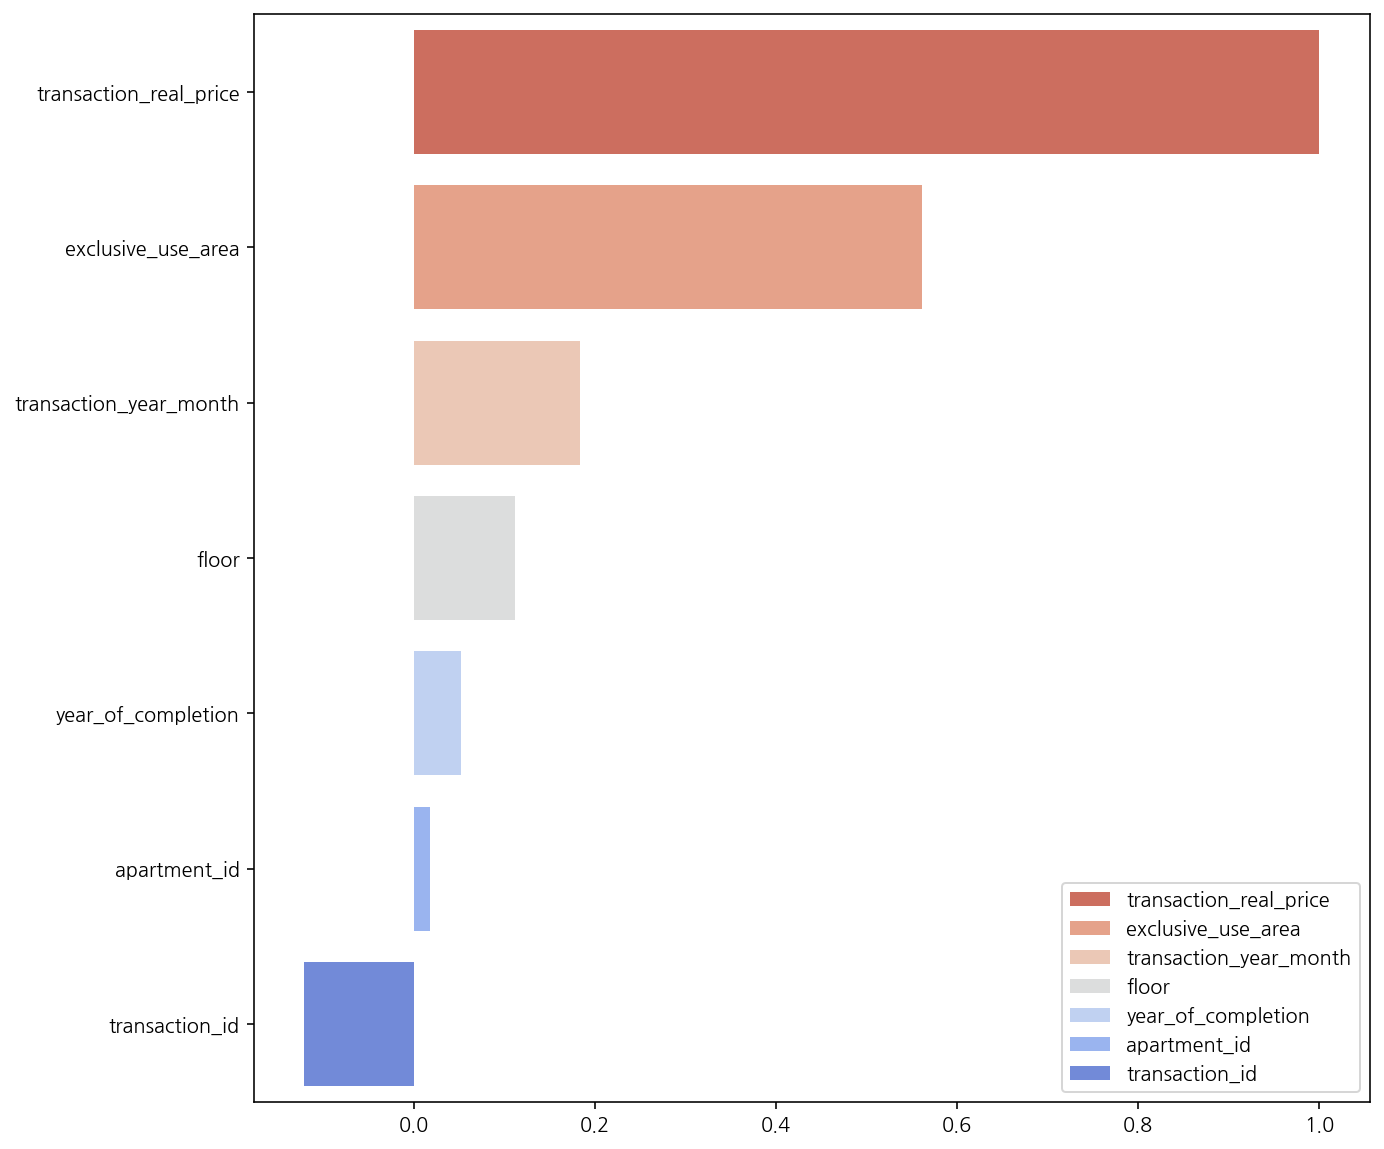

In [17]:
fig = plt.figure(figsize=(10, 10))
sns.barplot(x=corr.values, y=corr.index, hue=corr.index, dodge=False, palette='coolwarm_r')

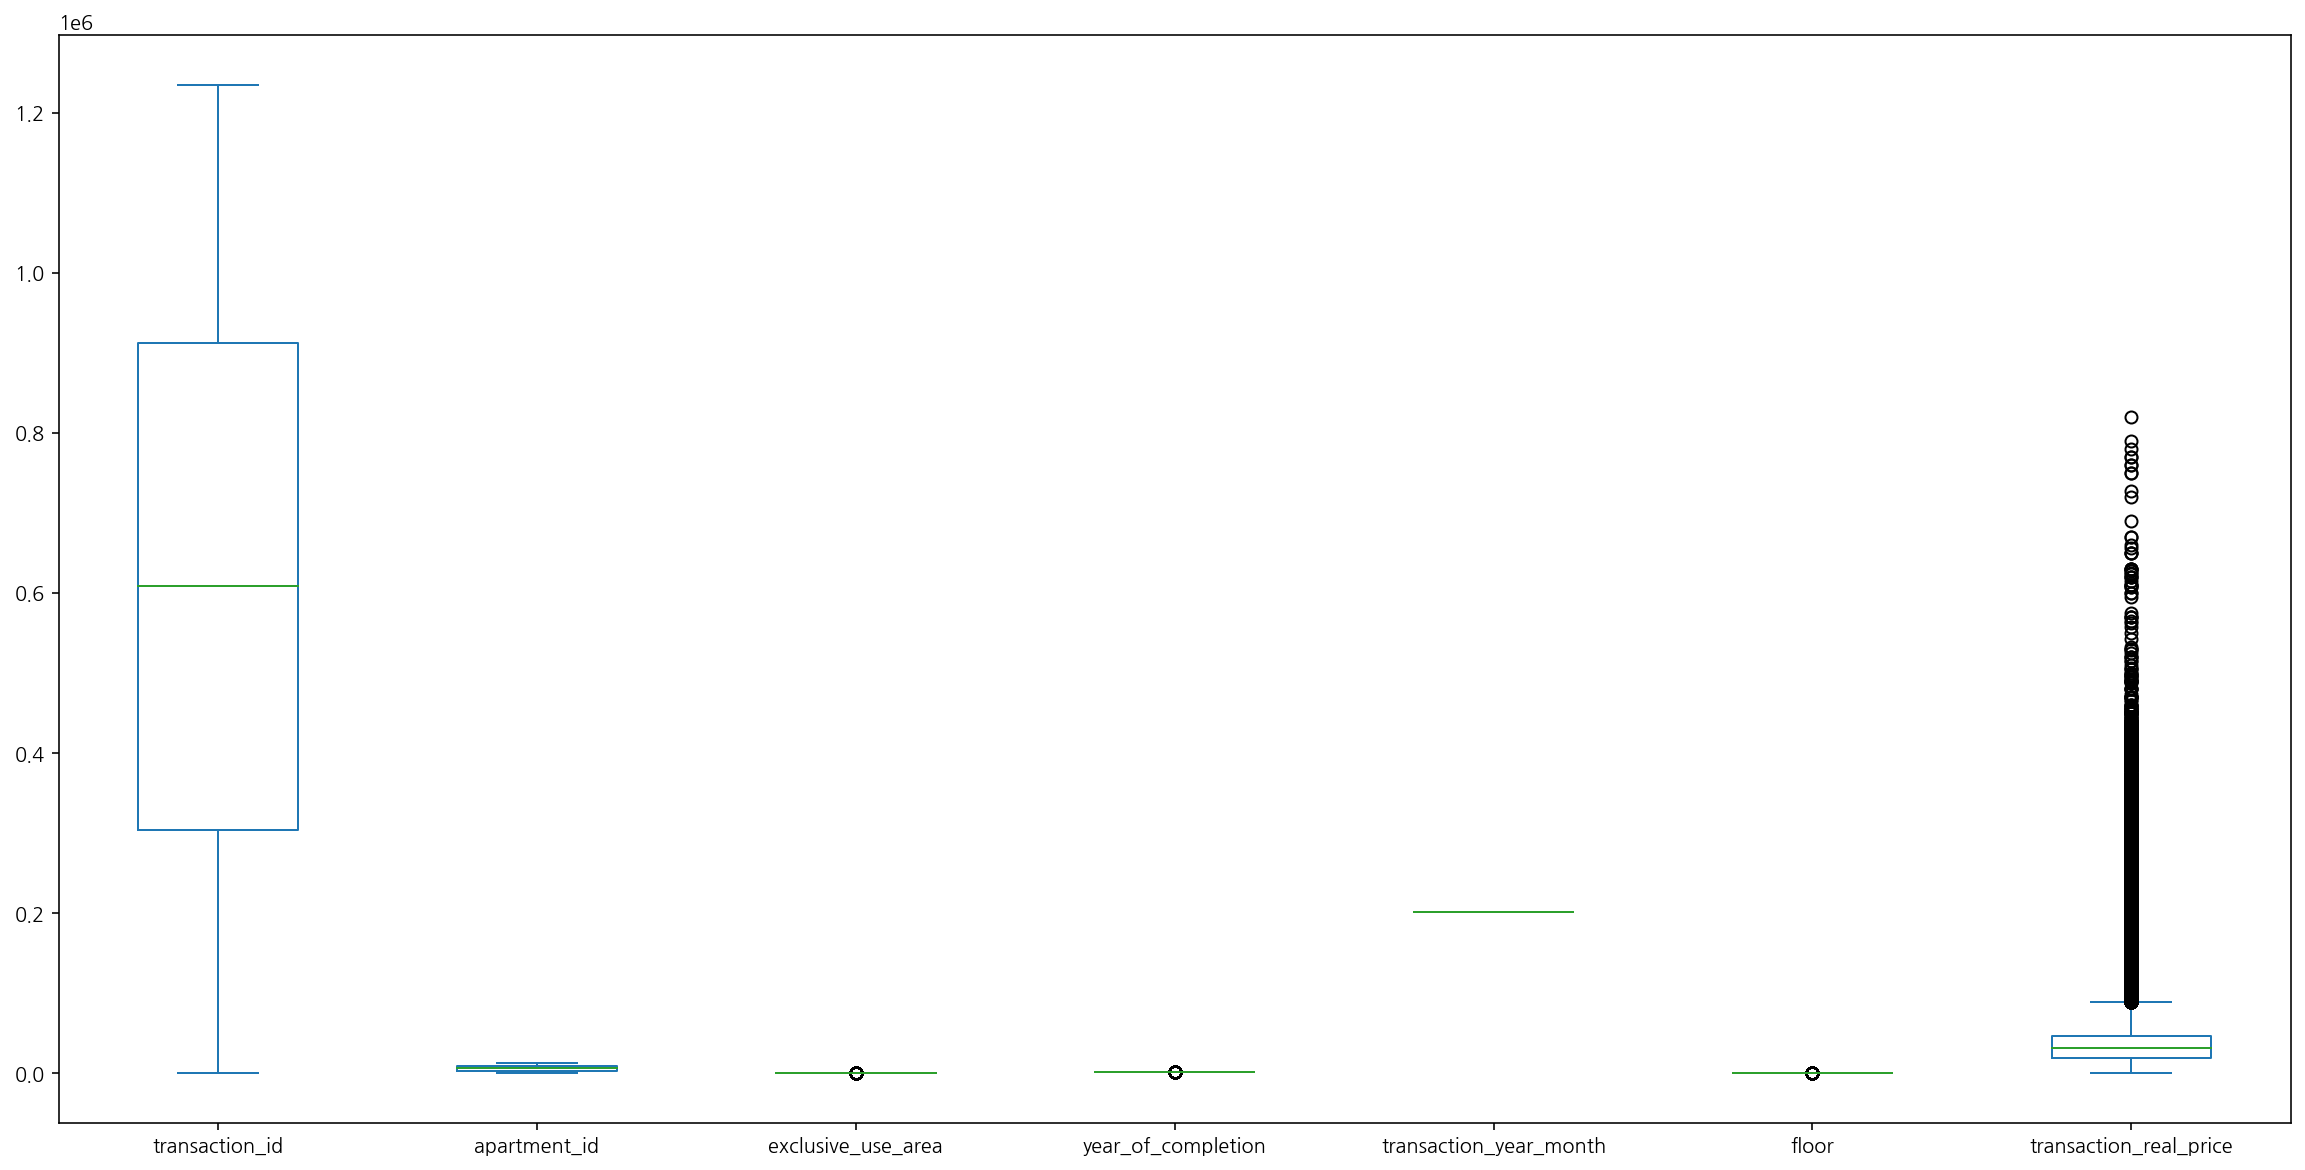

In [18]:
#boxplot 으로 outlier 확인
train_df.plot(kind="box", figsize=(20, 10));

<AxesSubplot:xlabel='transaction_real_price'>

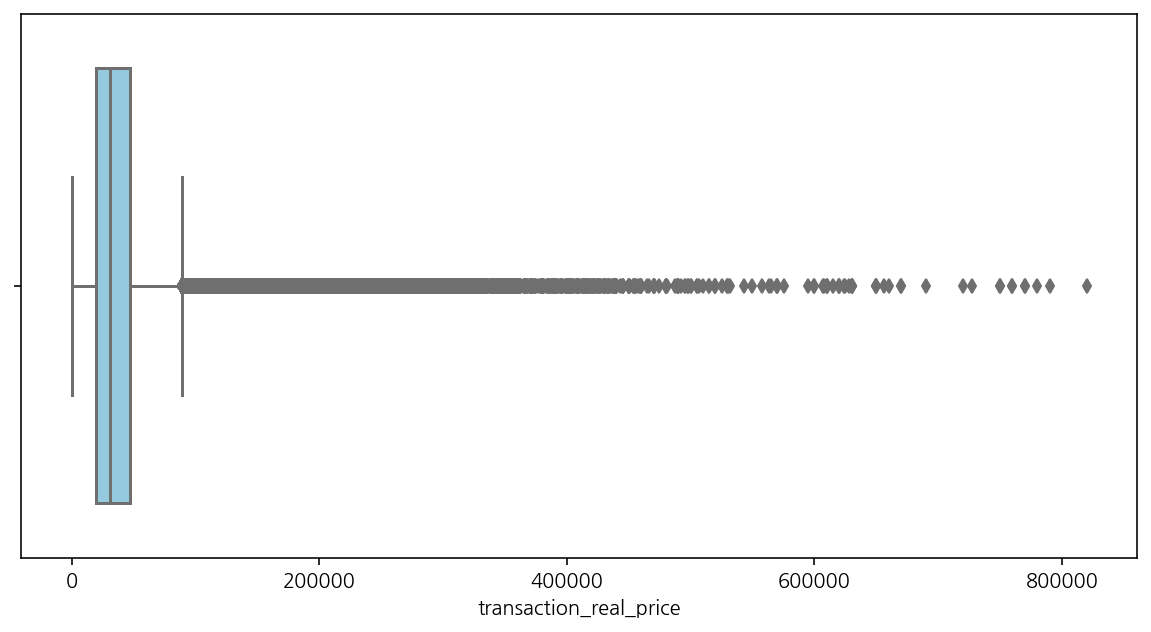

In [19]:
fig = plt.figure(figsize=(10, 5))
sns.boxplot(data = train_df, x='transaction_real_price', color='skyblue')

가격에서 이상치가 많다는 것을 알 수 있었다. 이상치 정리가 필요해보인다.

In [20]:

# sns.pairplot(train_df, kind="kde")


### 어린이집 데이터

<AxesSubplot:>

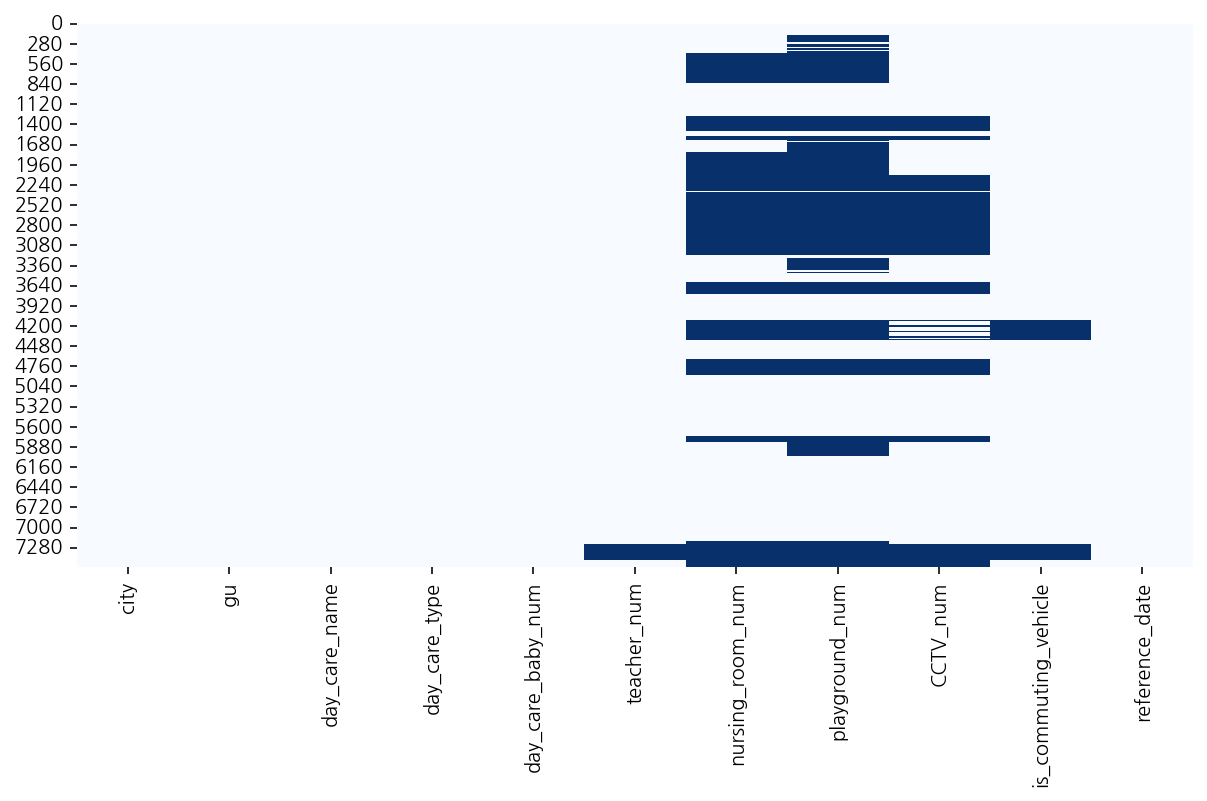

In [21]:
# 결측치 시각화     
fig = plt.figure(figsize=(10, 5))
sns.heatmap(daycare.isnull(), cbar=False, cmap='Blues')  

아파트 데이터에 비해서 결측치가 상당히 많은걸 확인

In [22]:
daycare.groupby('day_care_type').size()

day_care_type
가정        3120
국공립       1408
민간        2492
법인·단체      113
사회복지법인     107
직장         272
협동          39
dtype: int64

In [23]:
daycare.groupby('day_care_type').agg(['mean'])[['day_care_baby_num', 'teacher_num', 'nursing_room_num', 'playground_num', 'CCTV_num']]


day_care_baby_num teacher_num nursing_room_num playground_num  \
                           mean        mean             mean           mean   
day_care_type                                                                 
가정                    18.394551    5.467890         3.310231       0.097790   
국공립                   64.024858   11.867953         5.040201       0.665710   
민간                    60.483949   11.007838         5.652452       0.528854   
법인·단체                 64.575221   10.451327         4.658228       0.952381   
사회복지법인                85.392523   14.420561         6.132353       0.758621   
직장                    71.334559   15.122951         5.299363       0.859259   
협동                    29.179487    6.578947         3.925926       0.000000   

                CCTV_num  
                    mean  
day_care_type             
가정              4.054497  
국공립             8.883065  
민간              8.105740  
법인·단체           7.352273  
사회복지법인          9.746479  
직장             13.171123  
협동              2.333333

<AxesSubplot:xlabel='city', ylabel='count'>

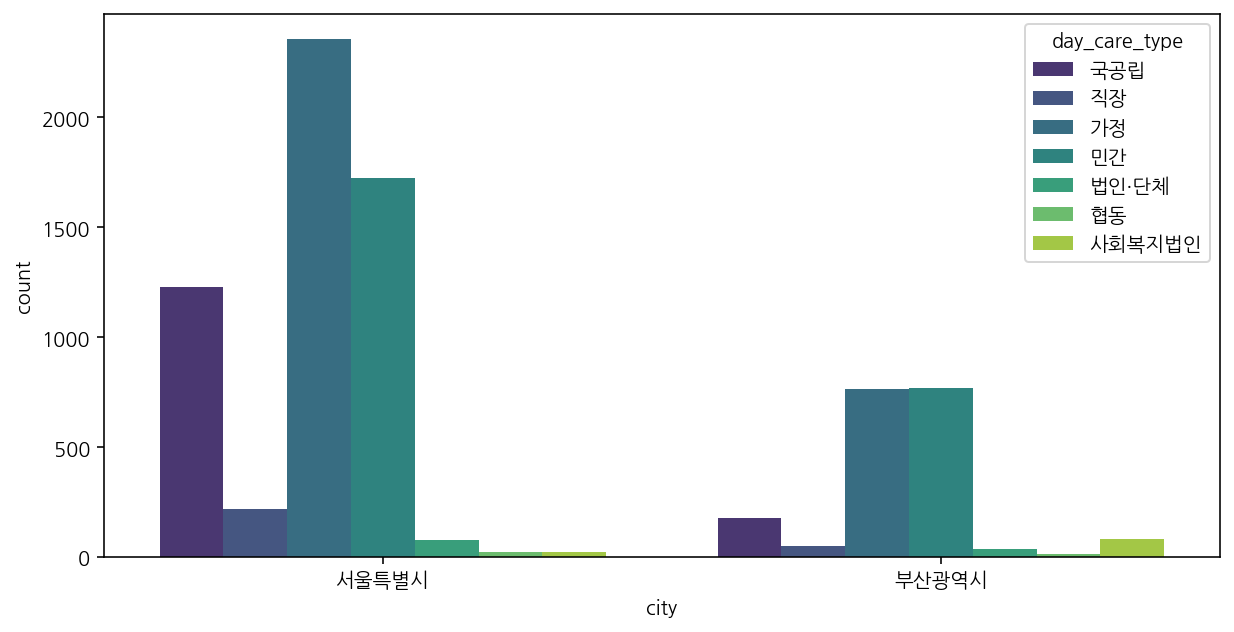

In [24]:
fig = plt.figure(figsize=(10, 5))
sns.countplot(data=daycare, x='city', hue='day_care_type', palette='viridis')

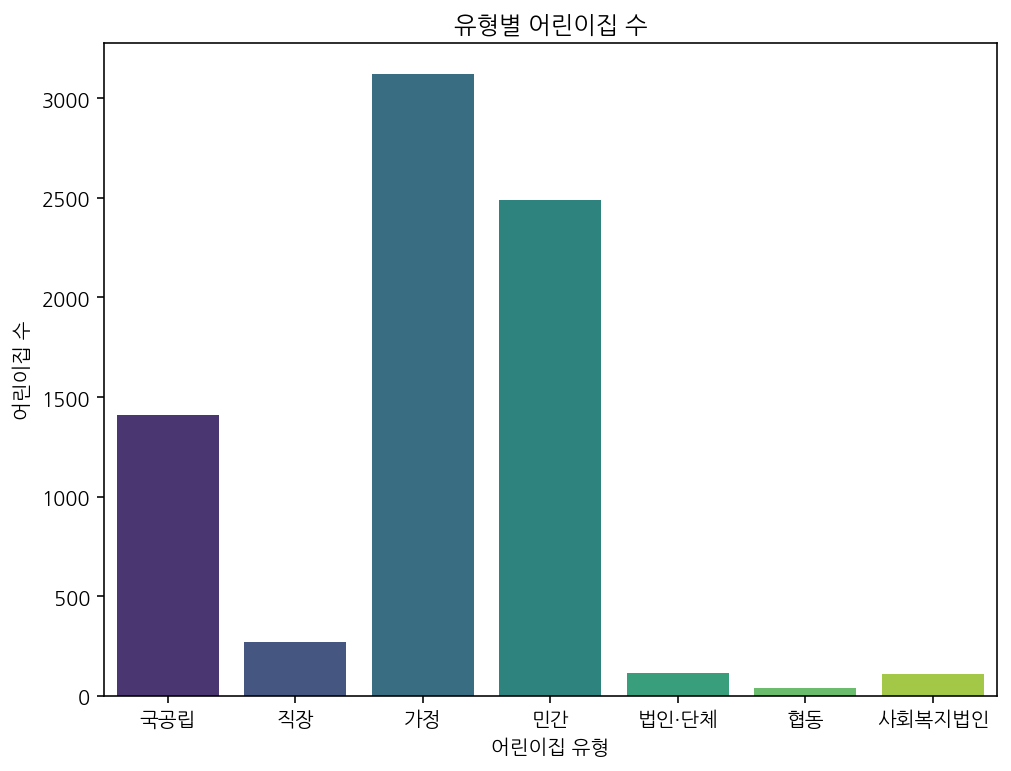

In [25]:
# 어린이집 유형별로 개수를 카운트하여 시각화
plt.figure(figsize=(8, 6))
sns.countplot(data=daycare, x='day_care_type',palette='viridis')
plt.title('유형별 어린이집 수')
plt.xlabel('어린이집 유형')
plt.ylabel('어린이집 수')
plt.show()


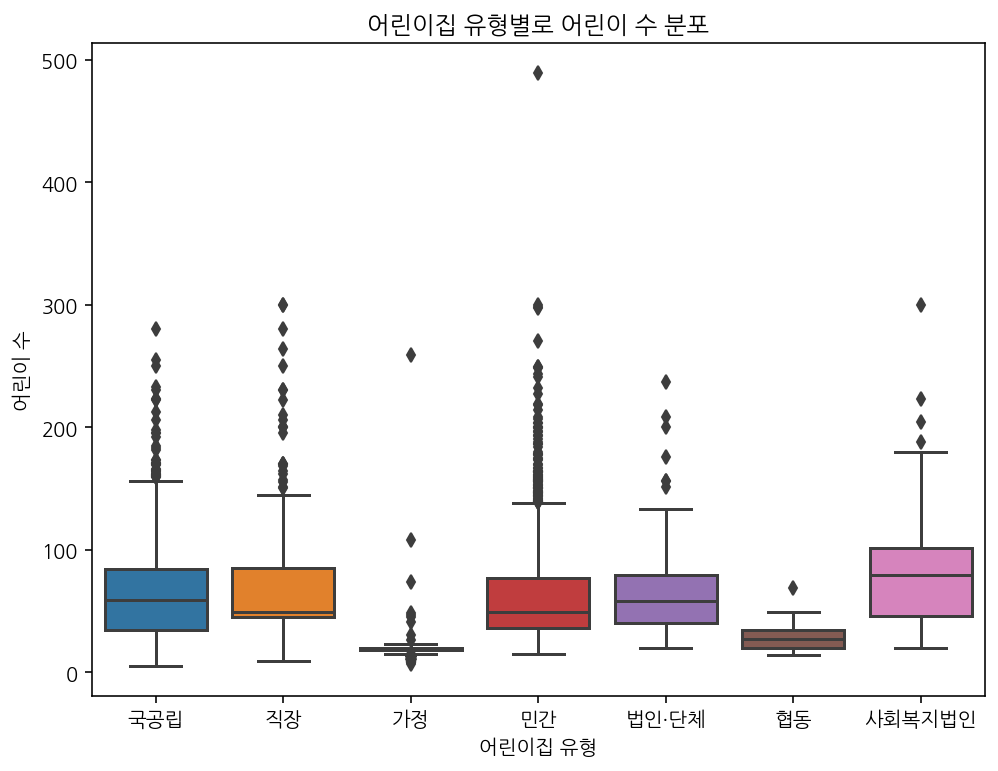

In [26]:
# 어린이집 유형별로 어린이 수 
plt.figure(figsize=(8, 6))
sns.boxplot(data=daycare, x='day_care_type', y='day_care_baby_num')
plt.title('어린이집 유형별로 어린이 수 분포')
plt.xlabel('어린이집 유형')
plt.ylabel('어린이 수')
plt.show()


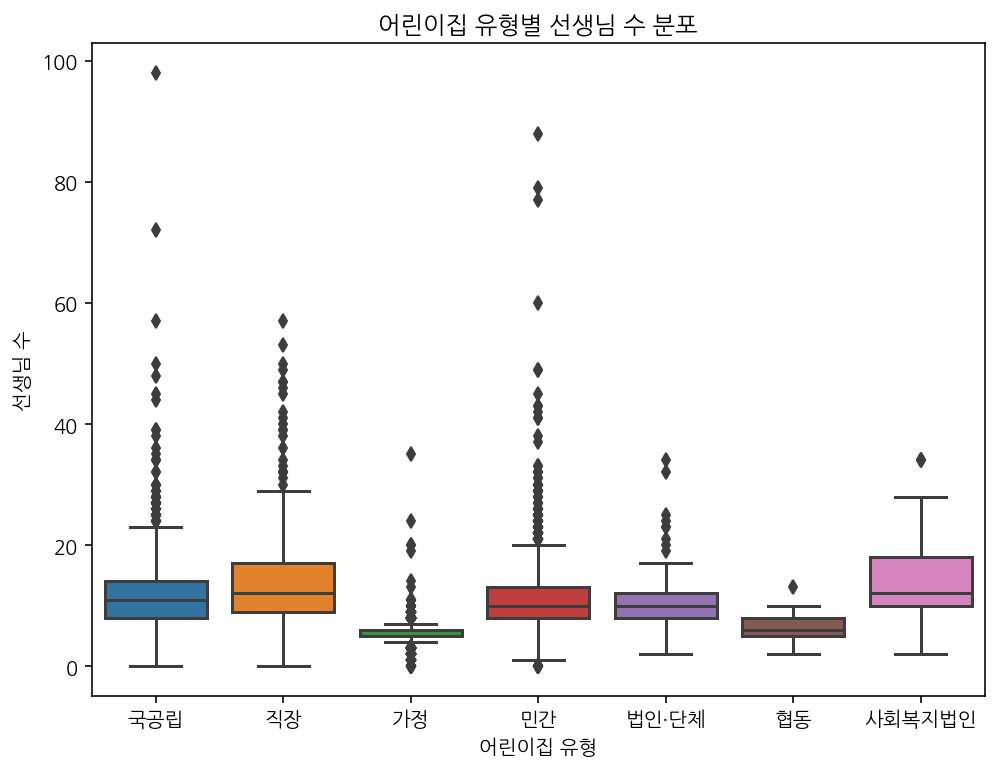

In [27]:
# 어린이집 유형별로 선생님 수 
plt.figure(figsize=(8, 6))
sns.boxplot(data=daycare, x='day_care_type', y='teacher_num')
plt.title('어린이집 유형별 선생님 수 분포')
plt.xlabel('어린이집 유형')
plt.ylabel('선생님 수')
plt.show()


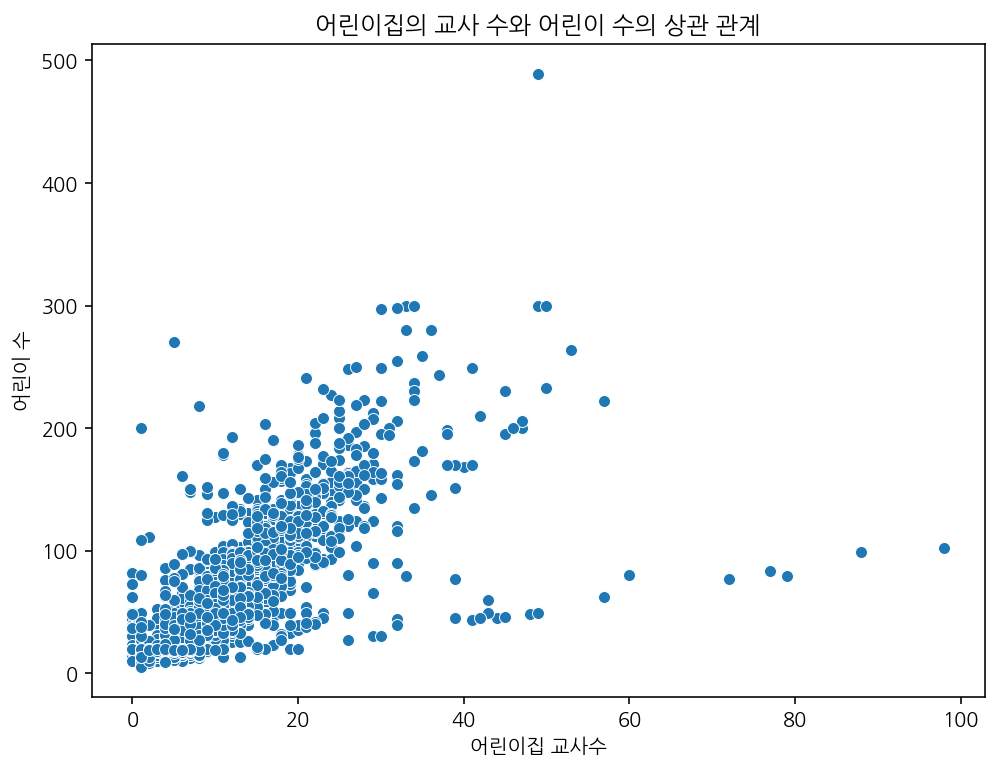

In [28]:
# 어린이집의 교사 수 와 어린이 수의 상관 관계
plt.figure(figsize=(8, 6))
sns.scatterplot(data=daycare, x='teacher_num', y='day_care_baby_num')
plt.title('어린이집의 교사 수와 어린이 수의 상관 관계')
plt.xlabel('어린이집 교사수')
plt.ylabel('어린이 수')
plt.show()


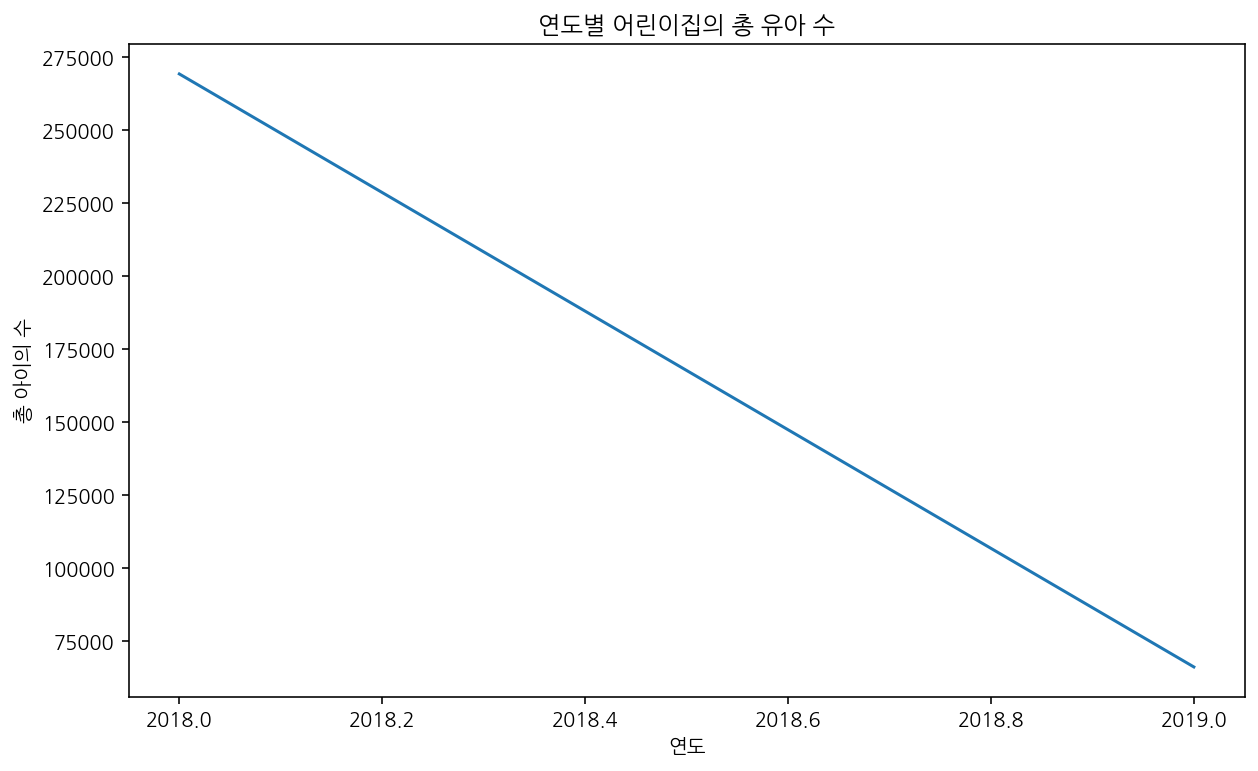

In [29]:
# 'reference_date' 열을 연도 정보로 변환
daycare['reference_date'] = pd.to_datetime(daycare['reference_date'])
daycare['year'] = daycare['reference_date'].dt.year

plt.figure(figsize=(10, 6))
sns.lineplot(data=daycare, x='year', y='day_care_baby_num', estimator='sum', ci=None)
plt.title('연도별 어린이집의 총 유아 수')
plt.xlabel('연도')
plt.ylabel('총 아이의 수')
plt.show()


저출산 시대에 살고 있는게 맞는거 같다

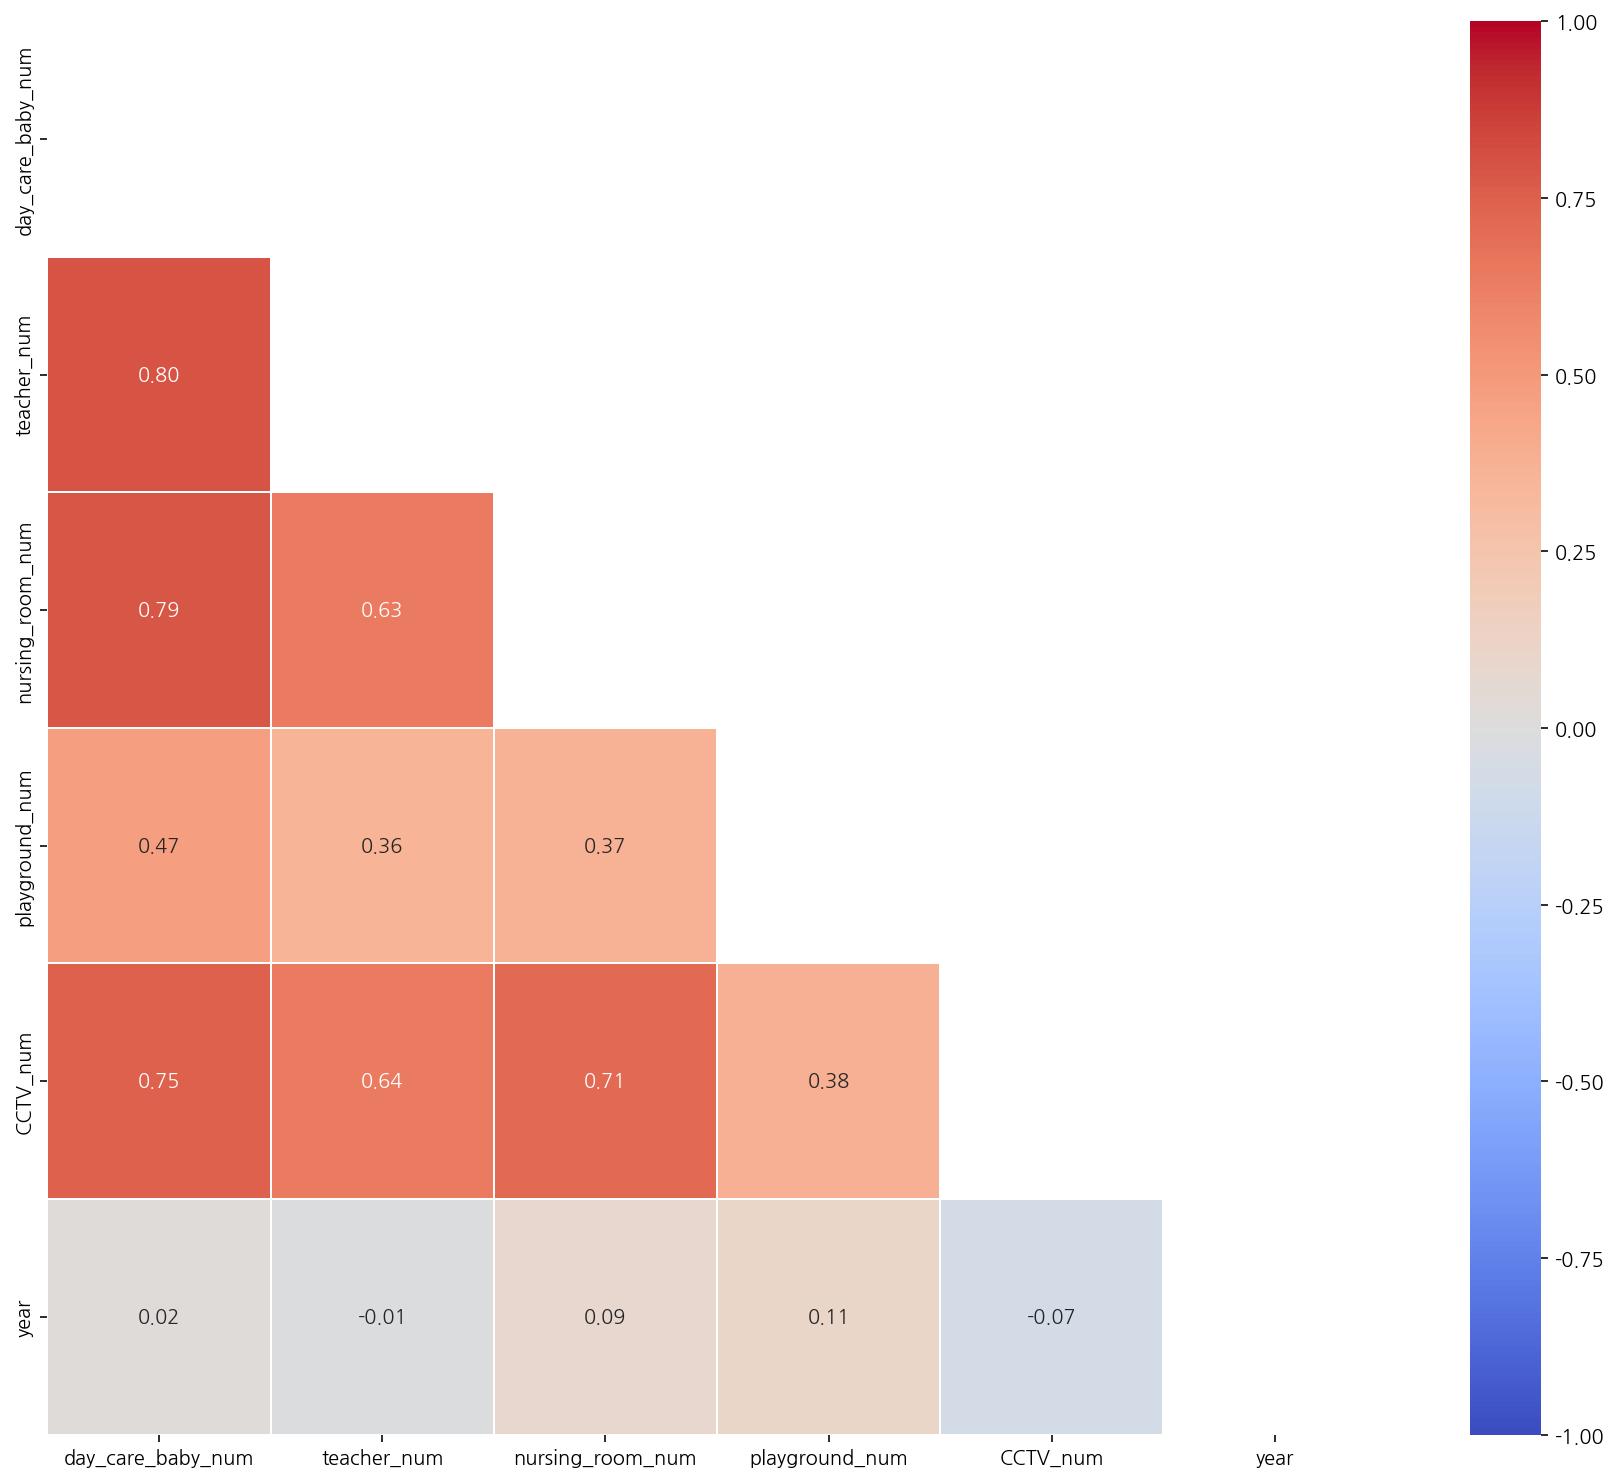

In [30]:
# 유치원 피쳐 상관관계 확인
# corr = daycare.corr(numeric_only=True)
# mask = np.triu(np.ones_like(corr, dtype=bool))
# fig = plt.figure(figsize=(15, 13))
# sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.2, vmin = -1, vmax = 1, mask = mask)

# 파이썬 버전차이로 조금 LMS에서는 이 코드를 사용
numeric_columns = daycare.select_dtypes(include=np.number)
corr = numeric_columns.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
fig = plt.figure(figsize=(15, 13))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.2, vmin=-1, vmax=1, mask=mask)
plt.show()


In [31]:
# Drop non-numeric columns
numeric_train_df = daycare.select_dtypes(include=[np.number])

# Calculate correlation
corr = numeric_train_df.corr()['day_care_baby_num'].sort_values(ascending=False)

print(corr)

day_care_baby_num    1.000000
teacher_num          0.796199
nursing_room_num     0.788166
CCTV_num             0.746723
playground_num       0.472172
year                 0.017496
Name: day_care_baby_num, dtype: float64


<AxesSubplot:>

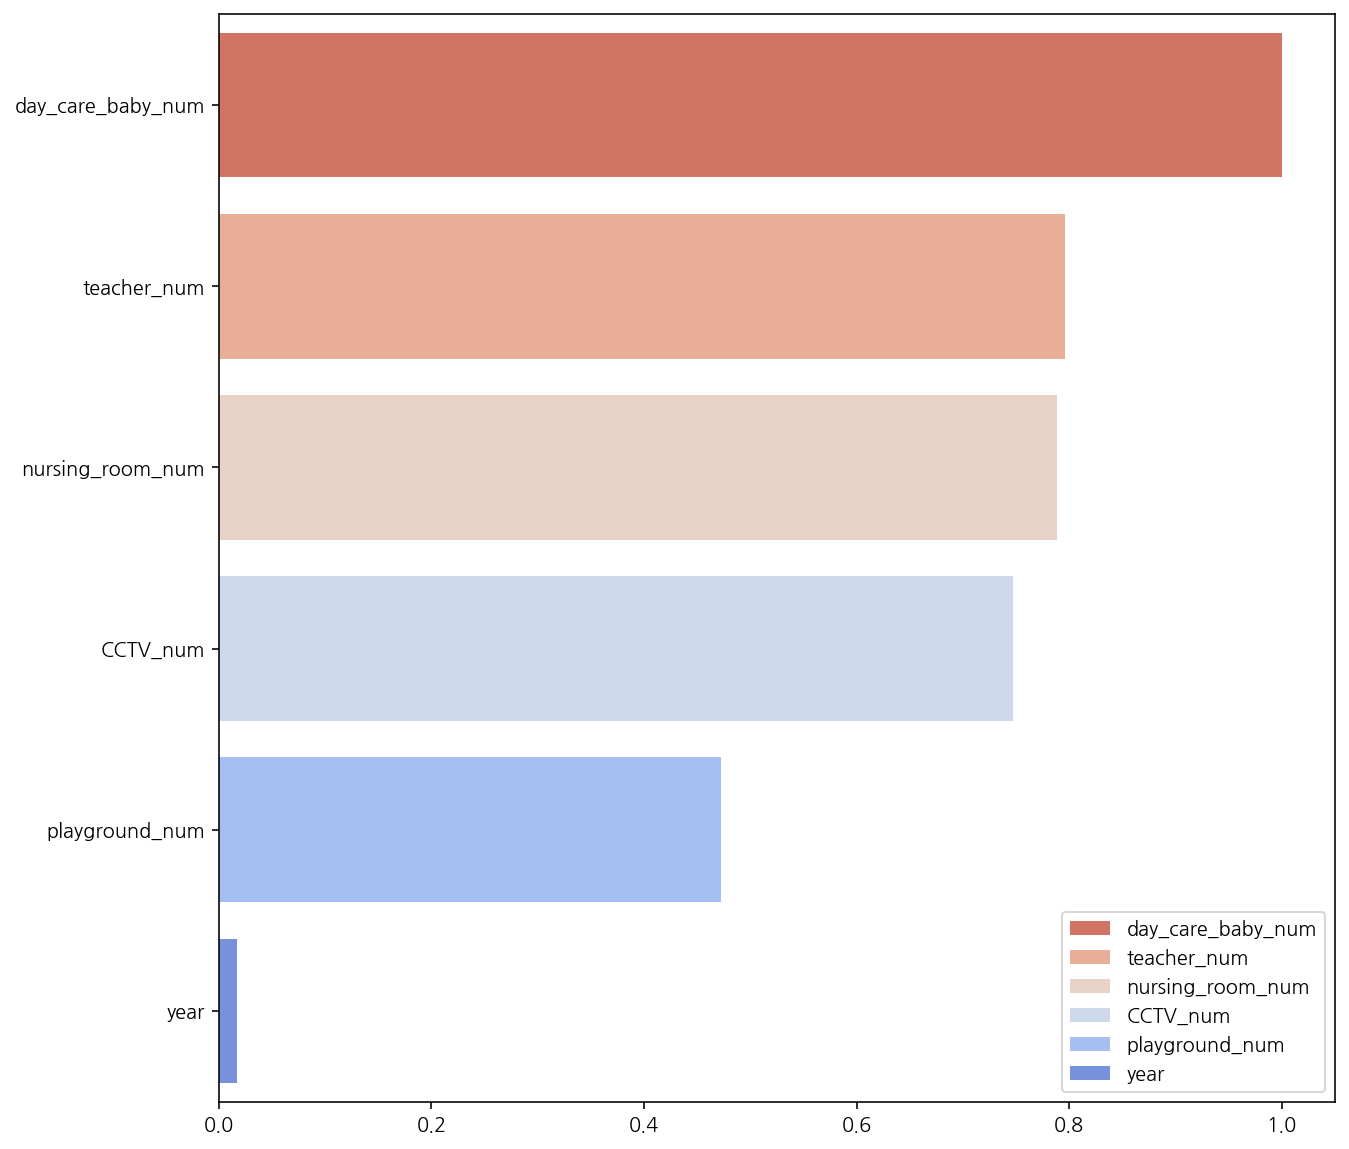

In [32]:
fig = plt.figure(figsize=(10, 10))
sns.barplot(x=corr.values, y=corr.index, hue=corr.index, dodge=False, palette='coolwarm_r')

### 공원 데이터

<AxesSubplot:>

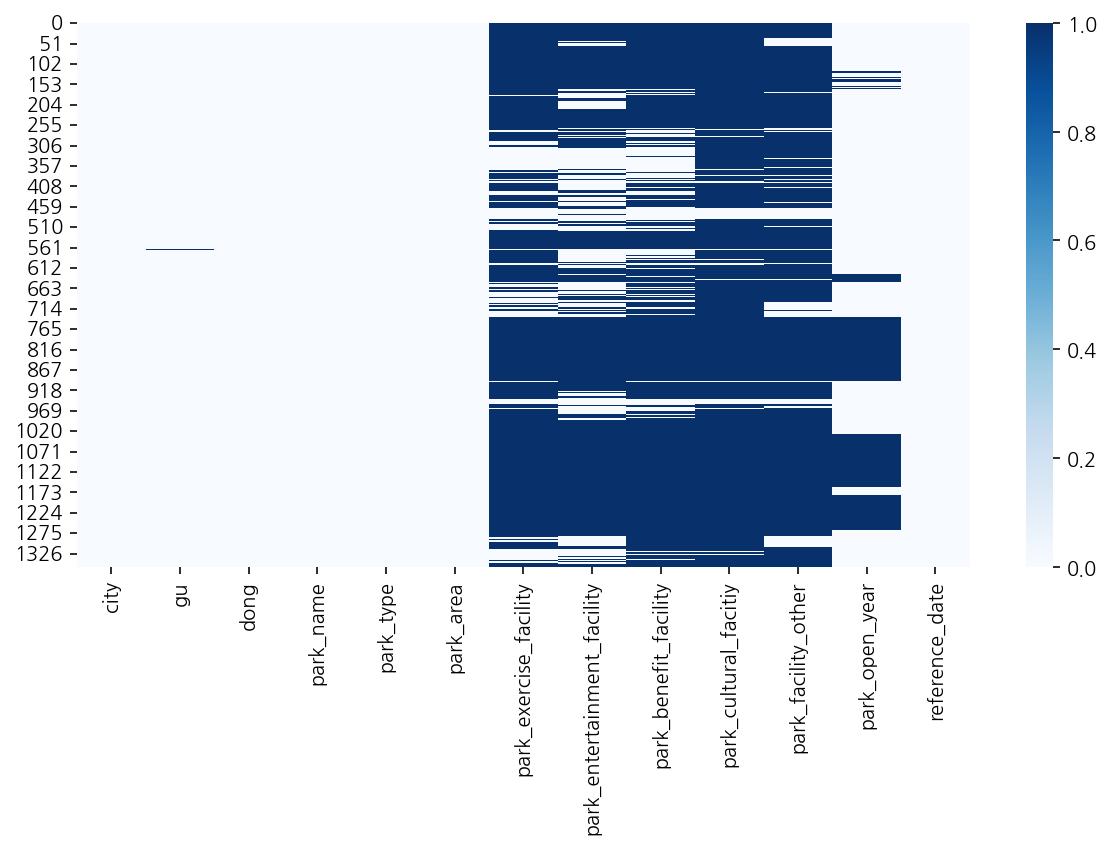

In [33]:
# 결측치 시각화
fig = plt.figure(figsize=(10, 5))
sns.heatmap(park.isnull(), cmap='Blues')  

결측치가 많다는 것을 알 수 있었다.

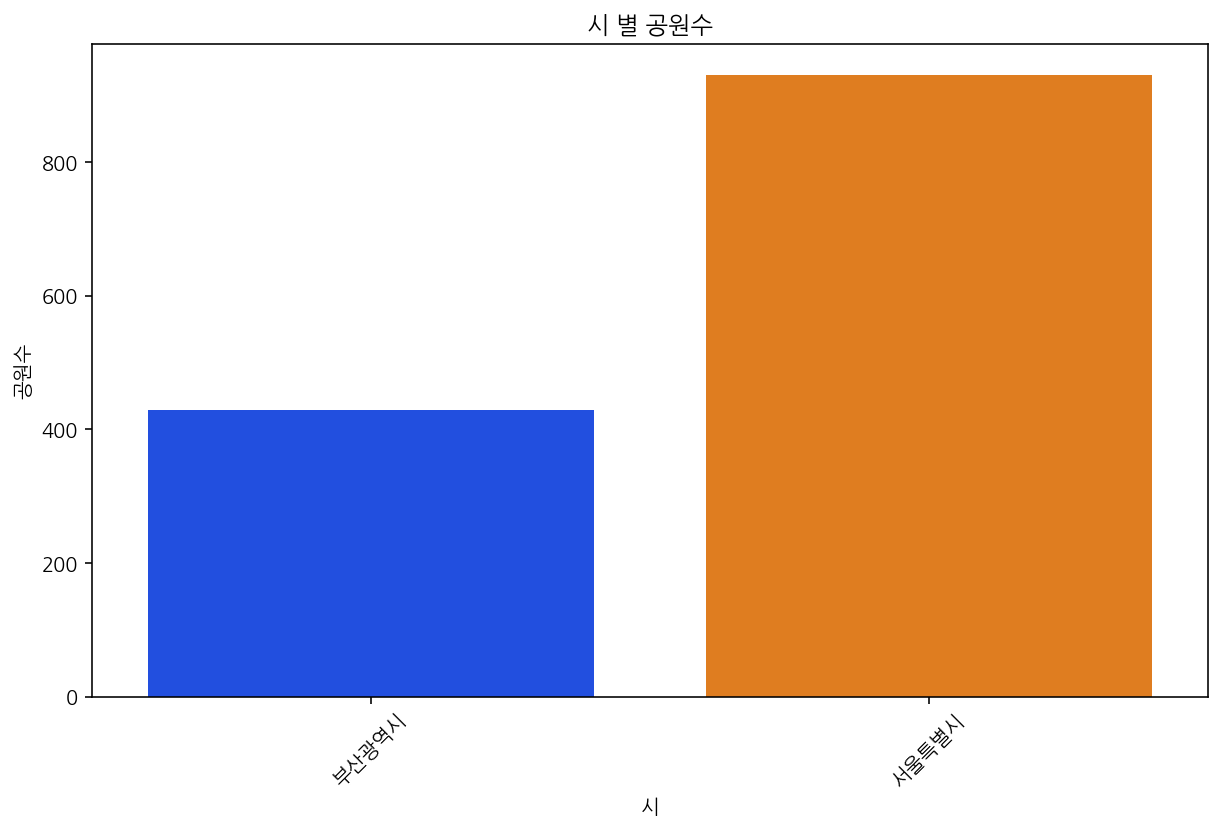

In [34]:
# 도시별 공원 개수
plt.figure(figsize=(10, 6))
sns.countplot(data=park, x='city', palette='bright')
plt.title('시 별 공원수')
plt.xlabel('시')
plt.ylabel('공원수')
plt.xticks(rotation=45)
plt.show()


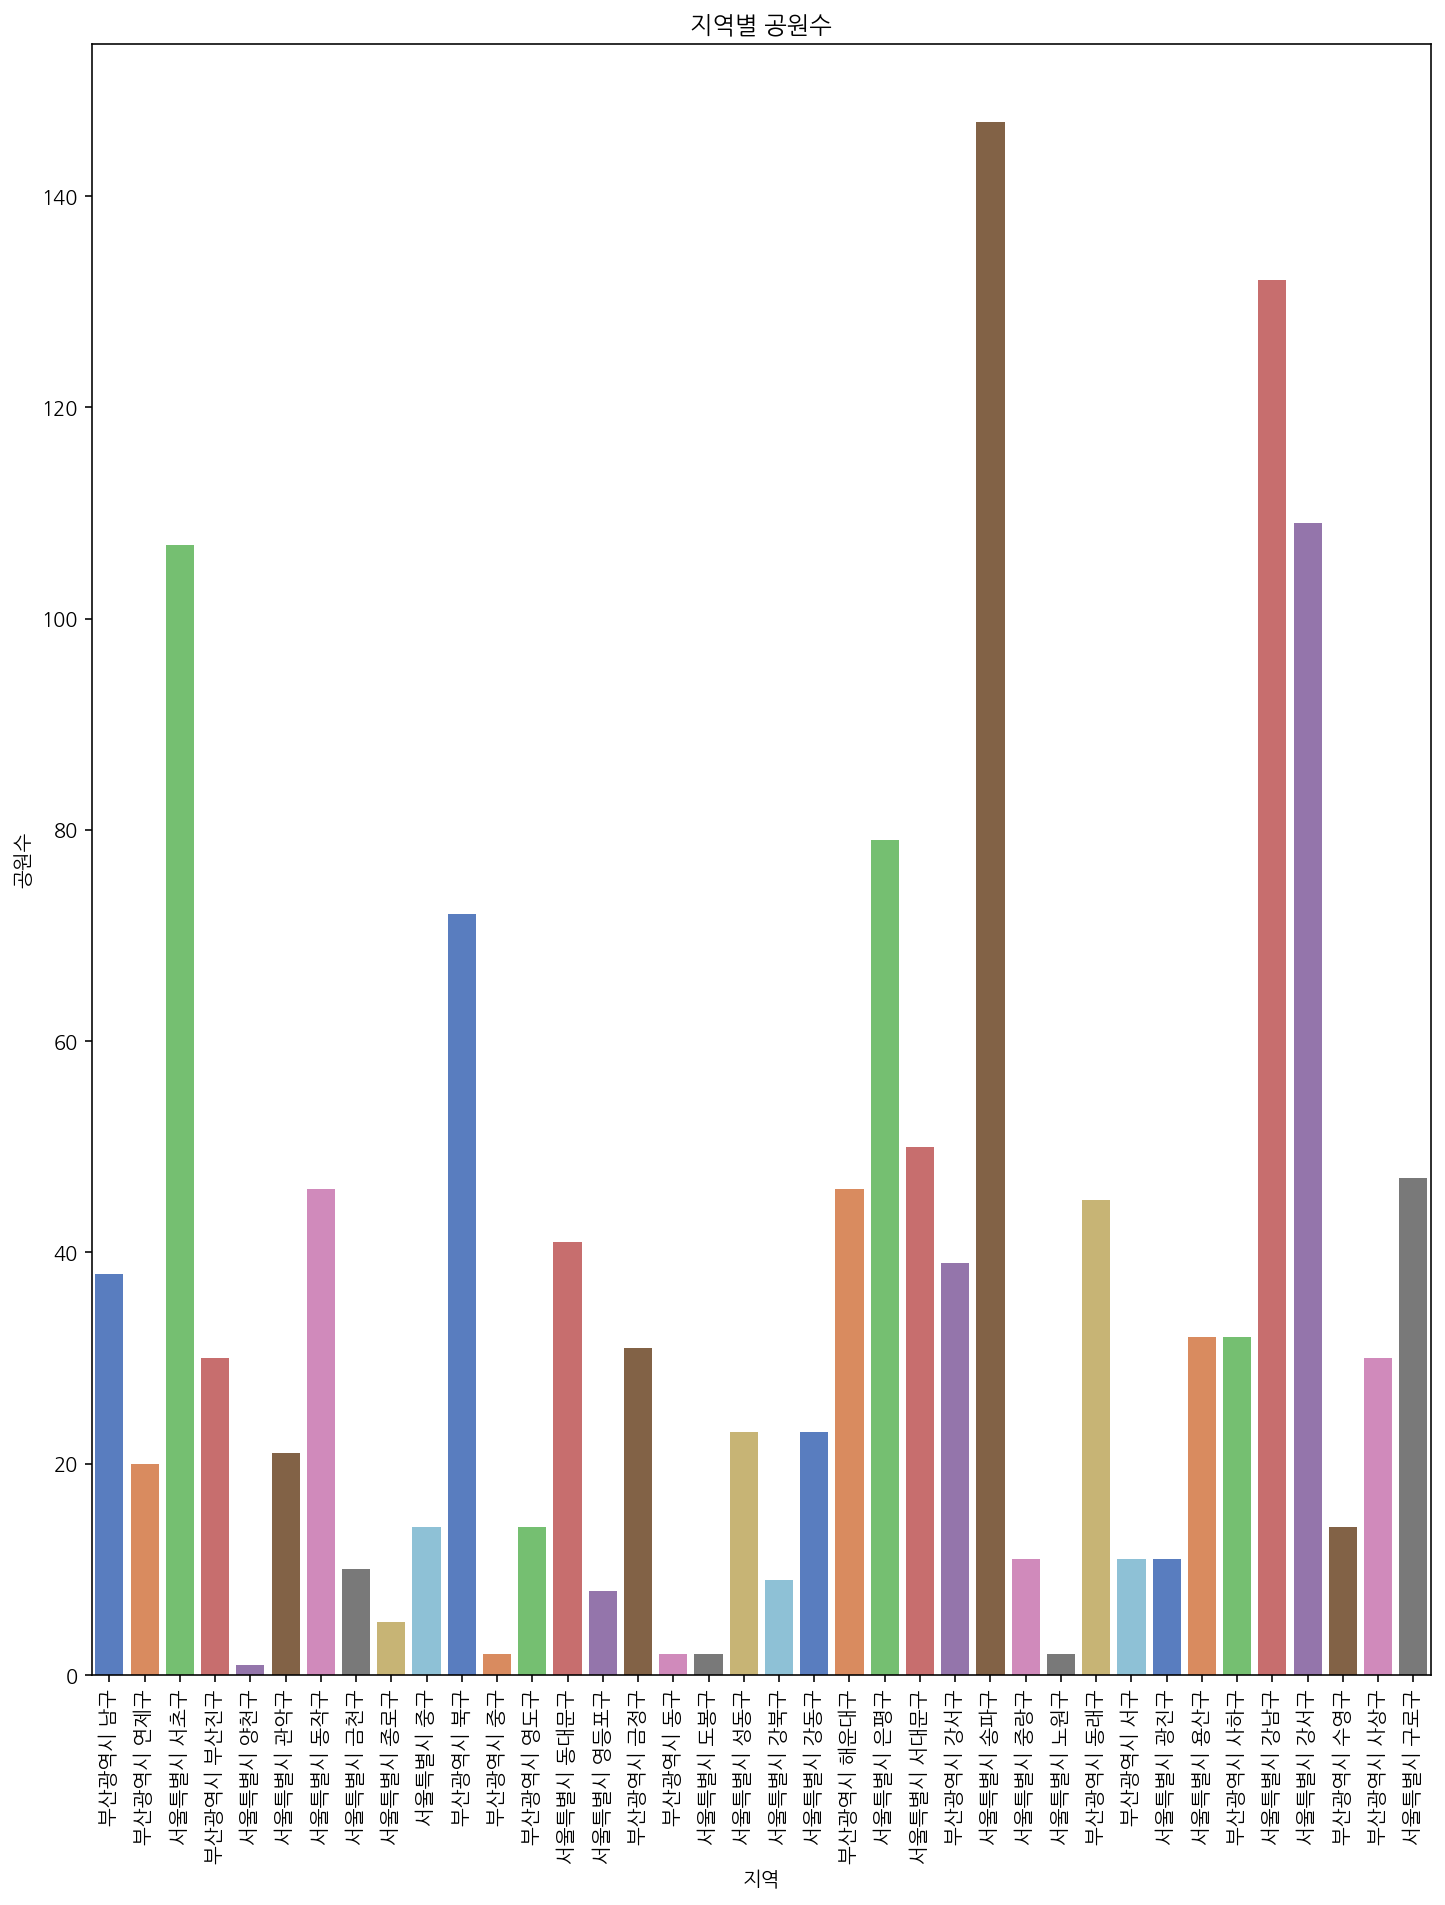

In [35]:
# city와 gu 컬럼을 합쳐서 새로운 지역 정보 컬럼 생성
park['region'] = park['city'] + ' ' + park['gu']

plt.figure(figsize=(12, 15))
sns.countplot(data=park, x='region',palette='muted')
plt.title('지역별 공원수')
plt.xlabel('지역')
plt.ylabel('공원수')
plt.xticks(rotation=90)
plt.show()


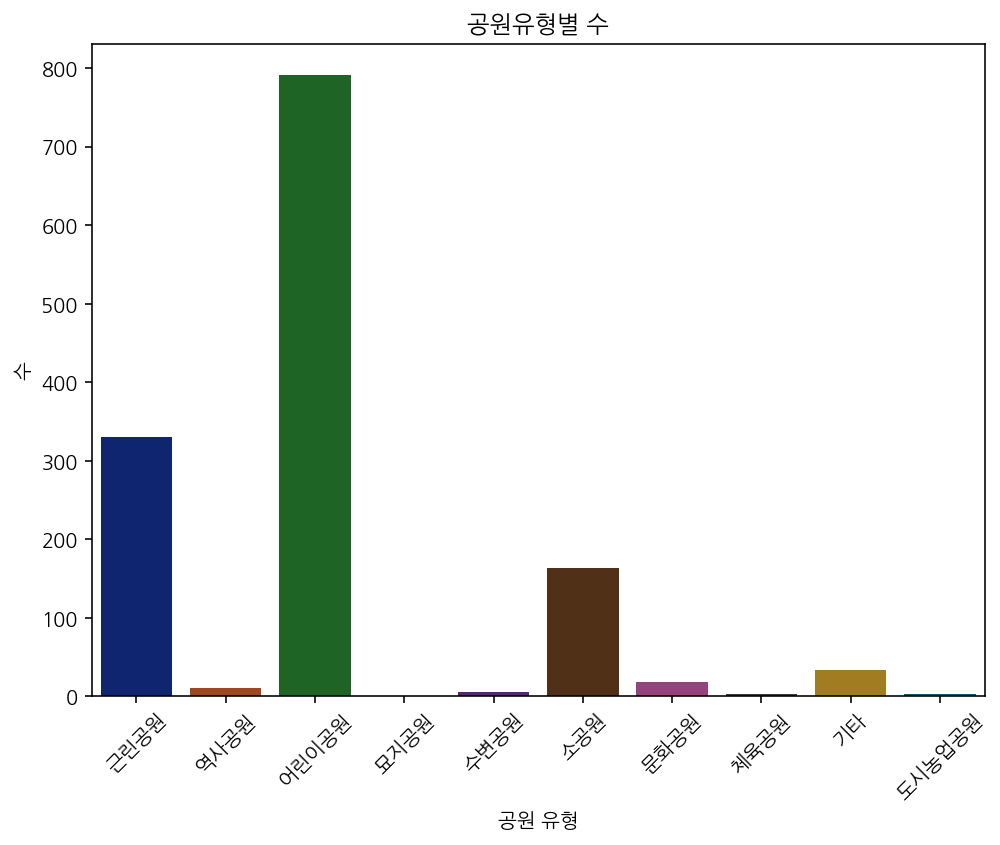

In [36]:
#공원 유형별 수
plt.figure(figsize=(8, 6))
sns.countplot(data=park, x='park_type', palette='dark')
plt.title('공원유형별 수')
plt.xlabel('공원 유형')
plt.ylabel('수')
plt.xticks(rotation=45)
plt.show()


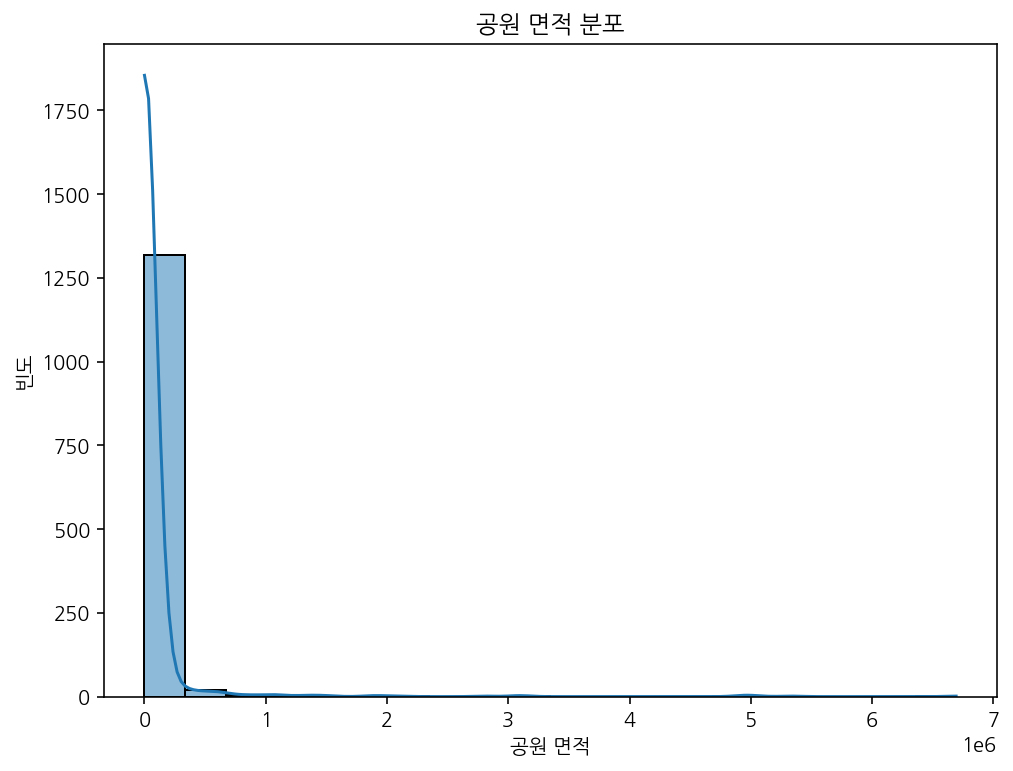

In [37]:
# 공원 면적 분포
plt.figure(figsize=(8, 6))
sns.histplot(data=park, x='park_area', bins=20, kde=True)
plt.title('공원 면적 분포')
plt.xlabel('공원 면적')
plt.ylabel('빈도')
plt.show()


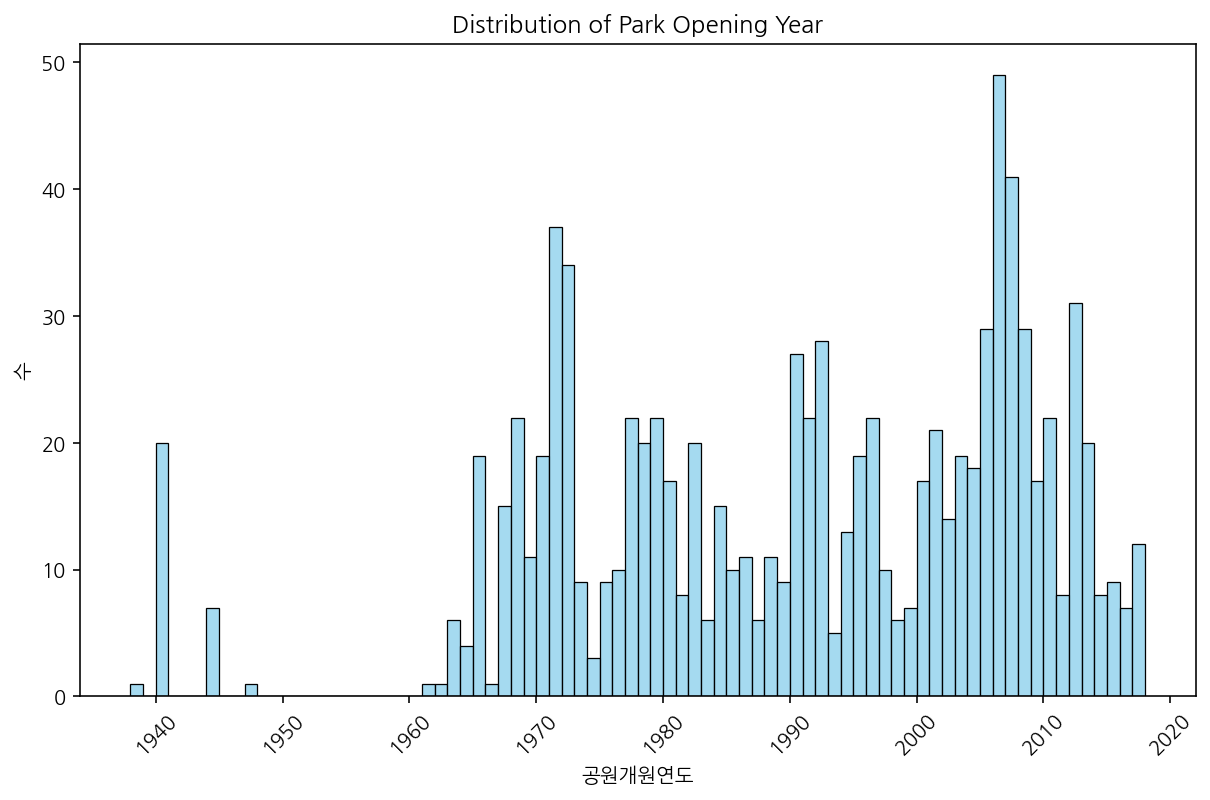

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(data=park, x='park_open_year', bins=range(int(park['park_open_year'].min()), int(park['park_open_year'].max()) + 1), kde=False, color='skyblue')
plt.title('Distribution of Park Opening Year')
plt.xlabel('공원개원연도')
plt.ylabel('수')
plt.xticks(rotation=45)
plt.show()


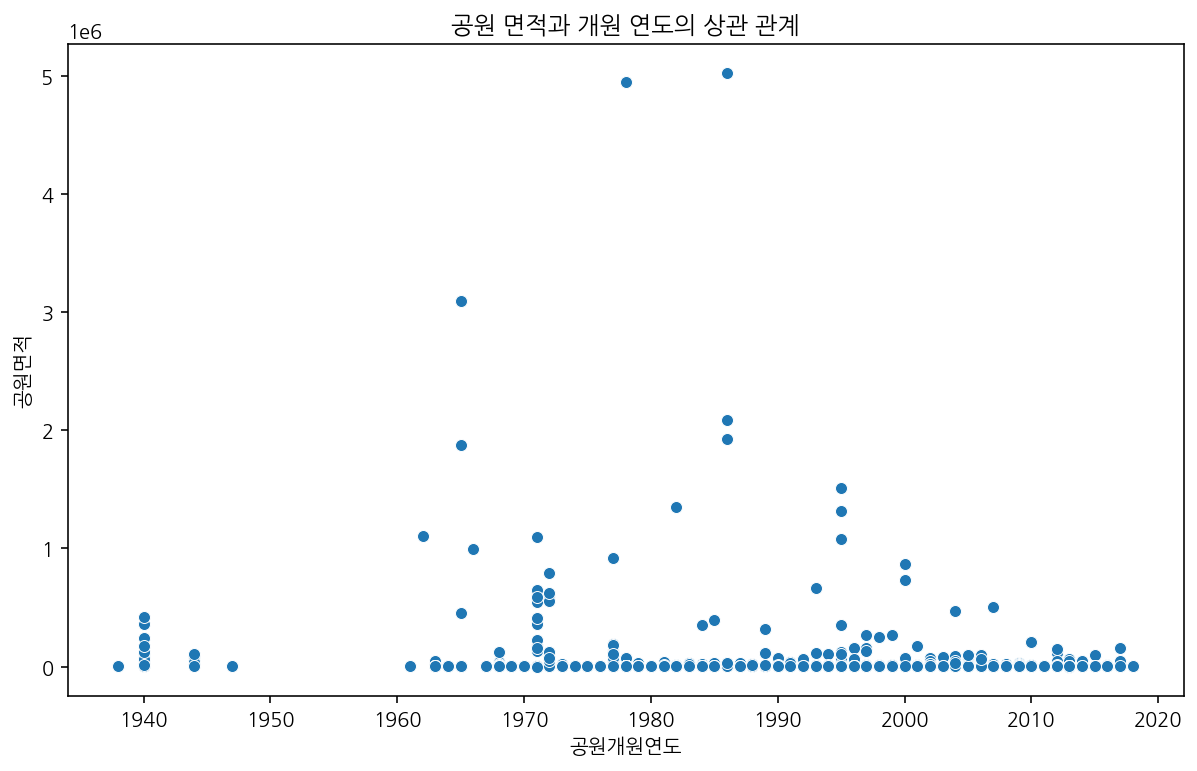

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=park, x='park_open_year', y='park_area')
plt.title('공원 면적과 개원 연도의 상관 관계')
plt.xlabel('공원개원연도')
plt.ylabel('공원면적')
plt.show()


### 1) train에 gu 정보 추가하기 
- park의 구, 동 정보 및 서울특별시, 부산광역시 공공데이터를 추가로 이용해서 train에 구 정보 추가
* 부산시 행정구역 : https://data.busan.go.kr/dataSet/detail.nm?publicdatapk=OA_CD00003&contentId=10 (https://kosis.kr/statHtml/statHtml.do?orgId=202&tblId=DT_206&lang_mode=ko&vw_cd=MT_OTITLE&list_id=202_20203_B&conn_path=I4)
* 서울시 행정구역 : https://data.seoul.go.kr/dataList/10043/S/2/datasetView.do

In [40]:
gu = pd.read_csv(home + '전국행정동리스트.csv')
gu.rename(columns={'전국행정동리스트':'city', 'Unnamed: 2':'gu', 'Unnamed: 3':'dong'}, inplace=True)
gu.drop([0,1], inplace=True)
gu = gu[['city','gu','dong']]
gu[(gu['city']=='서울특별시') | (gu['city']=='부산광역시')]

city   gu dong
2    서울특별시  종로구  청운동
3    서울특별시  종로구  신교동
4    서울특별시  종로구  궁정동
5    서울특별시  종로구  효자동
6    서울특별시  종로구  창성동
..     ...  ...  ...
558  부산광역시  NaN  구칠리
559  부산광역시  NaN  이곡리
560  부산광역시  NaN  고촌리
561  부산광역시  NaN  안평리
562  부산광역시  NaN  임기리

[561 rows x 3 columns]

In [41]:
# csv 저장
gu.to_csv(home + 'city_gu_dong.csv')

In [42]:
city_gu_dong = pd.read_csv(home + 'city_gu_dong.csv')
city_gu_dong

Unnamed: 0     city   gu dong
0               2    서울특별시  종로구  청운동
1               3    서울특별시  종로구  신교동
2               4    서울특별시  종로구  궁정동
3               5    서울특별시  종로구  효자동
4               6    서울특별시  종로구  창성동
...           ...      ...  ...  ...
19827       19829  제주특별자치도  NaN  하천리
19828       19830  제주특별자치도  NaN  성읍리
19829       19831  제주특별자치도  NaN  가시리
19830       19832  제주특별자치도  NaN  세화리
19831       19833  제주특별자치도  NaN  토산리

[19832 rows x 4 columns]

### 어린이집 컬럼 변경

In [43]:
#선생님 1명당 케어해야할 아이의 수
daycare['baby_teacher'] = daycare['day_care_baby_num'] / daycare['teacher_num']

In [44]:
# 통학차량 여부 변경
daycare['commuting_vehicle'] = daycare['is_commuting_vehicle'].map({'Y': 1, 'N': 0, '': 0, 'y': 1, 'n': 0})

In [45]:
# 'city', 'gu', 'day_care_type' 별로 그룹화하고 각 그룹의 레코드 수를 계산
group = daycare.groupby(['city', 'gu', 'day_care_type']).size().reset_index(name='counts')

# 'day_care_type' 별로 컬럼을 만들고, NaN 값을 0으로 채우기
daycare_group = group.pivot_table(index=['city', 'gu'], columns='day_care_type', values='counts', fill_value=0).reset_index()

# 'day_care' total 컬럼 추가
daycare_group['total'] = daycare_group['가정'] + daycare_group['국공립'] + daycare_group['민간'] + daycare_group['법인·단체'] + daycare_group['사회복지법인'] + daycare_group['직장'] + daycare_group['협동'] 

# 컬럼 이름에 'daycare_' 추가
daycare_group.columns = ['daycare_' + col if col not in ['city', 'gu'] else col for col in daycare_group.columns]

# 컬럼 이름을 간결하게 만들기
daycare_group.columns.name = None
daycare_group = daycare_group.reset_index(drop=True)
daycare_group.head()

city   gu  daycare_가정  daycare_국공립  daycare_민간  daycare_법인·단체  \
0  부산광역시  강서구          71            6          35              0   
1  부산광역시  금정구          30            6          58              1   
2  부산광역시  기장군          98           13          56              0   
3  부산광역시   남구          65           12          50              2   
4  부산광역시   동구           8            9          11              2   

   daycare_사회복지법인  daycare_직장  daycare_협동  daycare_total  
0               5           5           1            123  
1               7           3           1            106  
2               5           3           3            178  
3               6           6           2            143  
4               2           7           0             39

In [46]:
# 'city'와 'gu' 기준으로 'baby_teacher'의 평균과 'commuting_vehicle'의 합을 계산합니다.
grouped = daycare.groupby(['city', 'gu']).agg({'baby_teacher': 'mean', 'commuting_vehicle': 'sum'}).reset_index()

# 계산된 결과를 'daycare_group'에 병합합니다.
daycare_group = pd.merge(daycare_group, grouped, on=['city', 'gu'], how='left')

# 열 이름을 변경합니다.
daycare_group.rename(columns={'baby_teacher': 'avg_baby_teacher', 'commuting_vehicle': 'sum_commuting_vehicle'}, inplace=True)

In [47]:
daycare_group.fillna(0, inplace=True)

In [48]:
daycare_group.sample(10)

city    gu  daycare_가정  daycare_국공립  daycare_민간  daycare_법인·단체  \
35  서울특별시    중구          13           23           7              7   
3   부산광역시    남구          65           12          50              2   
10  부산광역시    서구           8           12          16              2   
14  부산광역시    중구           2            4           4              0   
15  부산광역시  해운대구          90           14          97              2   
33  서울특별시   은평구          74           53         145              7   
1   부산광역시   금정구          30            6          58              1   
12  부산광역시   연제구          27            7          51              5   
26  서울특별시   동작구          98           44          80              2   
24  서울특별시   노원구         313           72          60              0   

    daycare_사회복지법인  daycare_직장  daycare_협동  daycare_total  avg_baby_teacher  \
35               0          18           0             68          4.370674   
3                6           6           2            143          5.372328   
10               2           0           0             40          5.249649   
14               1           2           0             13          5.385857   
15              13           6           1            223          5.919427   
33               1           2           1            283          0.000000   
1                7           3           1            106          4.965783   
12               4           3           0             97          4.990563   
26               3           6           1            234          4.883491   
24               4           7           1            457          3.881365   

    sum_commuting_vehicle  
35                    4.0  
3                    94.0  
10                   31.0  
14                   11.0  
15                  143.0  
33                  123.0  
1                    88.0  
12                   70.0  
26                    0.0  
24                   84.0

### 공원 컬럼 변경

In [49]:
# 'city', 'gu', 'dong', 'park_type' 별로 그룹화하고 각 그룹의 레코드 수를 계산
group = park.groupby(['city', 'gu', 'dong', 'park_type']).size().reset_index(name='counts')

# 'park_type' 별로 컬럼을 만들고, NaN 값을 0으로 채우기
park_group = group.pivot_table(index=['city', 'gu', 'dong'], columns='park_type', values='counts', fill_value=0).reset_index()

# 'park' total 컬럼 추가
park_group['total'] = park_group['근린공원'] + park_group['기타'] + park_group['도시농업공원'] + park_group['묘지공원'] + park_group['문화공원'] + park_group['소공원'] + park_group['수변공원'] + park_group['어린이공원'] + park_group['역사공원'] + park_group['체육공원']

# 컬럼 이름에 'park_' 추가
park_group.columns = ['park_' + col if col not in ['city', 'gu', 'dong'] else col for col in park_group.columns]

# 컬럼 이름을 간결하게 만들기
park_group.columns.name = None
park_group = park_group.reset_index(drop=True)
park_group.head()

city   gu  dong  park_근린공원  park_기타  park_도시농업공원  park_묘지공원  park_문화공원  \
0  부산광역시  강서구   녹산동          1        0            0          0          0   
1  부산광역시  강서구  대저1동          0        0            0          0          0   
2  부산광역시  강서구   명지동          6        0            0          0          1   
3  부산광역시  강서구   송정동          2        0            0          0          0   
4  부산광역시  강서구   신호동          2        0            0          0          0   

   park_소공원  park_수변공원  park_어린이공원  park_역사공원  park_체육공원  park_total  
0         0          0           0          0          0           1  
1         1          0           0          0          0           1  
2         2          0          16          0          0          25  
3         0          0           0          0          0           2  
4         0          0           2          0          0           4

In [50]:
# 'city', 'gu'와 'dong' 기준으로 'part_area'의 합을 계산합니다.
grouped = park.groupby(['city', 'gu', 'dong']).agg({'park_area': 'sum'}).reset_index()

# 계산된 결과를 'park_group'에 병합합니다.
park_group = pd.merge(park_group, grouped, on=['city', 'gu', 'dong'], how='left')

# 열 이름을 변경합니다.
# park_group.rename(columns={'park_area': 'sum_part_area'}, inplace=True)

In [51]:
park_group.sample(10)

city    gu  dong  park_근린공원  park_기타  park_도시농업공원  park_묘지공원  park_문화공원  \
158  서울특별시  서대문구   연희동          1        0            0          0          0   
103  서울특별시   강서구  내발산동          2        0            0          0          0   
5    부산광역시   강서구   지사동          3        0            0          0          0   
68   부산광역시   연제구   연산동          1        0            0          0          0   
123  서울특별시   구로구    궁동          0        0            0          0          0   
31   부산광역시  부산진구   가야동          2        0            0          0          0   
76   부산광역시  해운대구    좌동          1        0            0          0          0   
75   부산광역시  해운대구   재송동          1        0            0          0          0   
80   서울특별시   강남구   대치동          4        0            0          0          0   
130  서울특별시   금천구   독산동          4        0            0          0          0   

     park_소공원  park_수변공원  park_어린이공원  park_역사공원  park_체육공원  park_total  \
158         0          0           7          0          0           8   
103         0          0           9          0          0          11   
5           0          0           3          0          0           6   
68          7          0           9          0          0          17   
123         0          0           2          0          0           2   
31          0          0           1          0          0           3   
76          0          0          12          0          0          13   
75          1          0           2          0          0           4   
80          4          0           3          0          0          11   
130         0          0           0          0          0           4   

     park_area  
158   131981.6  
103   125952.4  
5      53625.0  
68     44453.2  
123     2409.0  
31     72762.0  
76     42189.8  
75     42066.0  
80     60607.3  
130    58738.5

### 병원 데이터

In [52]:
hospital = pd.read_csv(home +'hospital_data.csv')

In [53]:
hospital.rename(columns={'시': 'city', '동': 'dong', '병원 수': 'Hospital'}, inplace=True)

In [54]:
hospital

city  dong  Hospital
0    부산광역시   가야동         1
1    부산광역시   감만동         1
2    부산광역시   감전동         2
3    부산광역시   감천동         3
4    부산광역시   개금동         7
..     ...   ...       ...
239  서울특별시   화곡동        12
240  서울특별시   화양동         3
241  서울특별시   회기동         2
242  서울특별시  휘경2동         2
243  서울특별시   흑석동         1

[244 rows x 3 columns]

In [55]:
hospital.to_csv(home +'hospital.csv')

### 아파트데이터 컬럼 변경

In [56]:
#drop할 열 (4개)
train_df.drop(columns=['transaction_id','apartment_id','jibun','addr_kr'],axis=1,inplace=True)

In [57]:
#연, 월 분리 (transaction_year_month)
train_df['transaction_year'] = train_df['transaction_year_month'] //100
train_df['transaction_month'] = train_df['transaction_year_month'] % 100

In [58]:
#floor binning 처리하기
train_df['floor_category'] = pd.cut(
    train_df['floor'], 
    bins=[-float("inf"), 5, 10, 20, 40, float("inf")], 
    labels=[1, 2, 3, 4, 5])

In [59]:
train_df['floor_category'].value_counts()

1    420308
3    383358
2    339886
4     70373
5      2628
Name: floor_category, dtype: int64

In [60]:
train_df['floor_category'] = train_df['floor_category'].astype('int64')

In [61]:
#21~시작되는 애들은 다 동일한 것으로 묶어준다
train_df['transaction_date'] = train_df['transaction_date'].apply(lambda x: '21 이상' if x.startswith('21') else x)

In [62]:
train_df.head(3)

city dong       apt  exclusive_use_area  year_of_completion  \
0  서울특별시  신교동  신현(101동)               84.82                2002   
1  서울특별시  필운동    사직파크맨션               99.17                1973   
2  서울특별시  필운동    두레엘리시안               84.74                2007   

   transaction_year_month transaction_date  floor  transaction_real_price  \
0                  200801            21 이상      2                   37500   
1                  200801             1~10      6                   20000   
2                  200801             1~10      6                   38500   

   transaction_year  transaction_month  floor_category  
0              2008                  1               1  
1              2008                  1               2  
2              2008                  1               2

In [63]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
le = LabelEncoder()

train_df['transaction_date'] = le.fit_transform(train_df['transaction_date'])

train_df['transaction_date'].value_counts()

2    416453
0    408385
1    391715
Name: transaction_date, dtype: int64

In [64]:
train_df['transaction_date'].value_counts()

2    416453
0    408385
1    391715
Name: transaction_date, dtype: int64

### 데이터 병합

In [65]:
# train_df에 'city', 'dong'을 기준으로 'gu' 추가
train_df_merge = pd.merge(train_df, city_gu_dong[['city', 'dong', 'gu']], on=['city', 'dong'], how='left')

In [66]:
# 'city'와 'gu'를 기준으로 'train_df'와 'daycare_group'를 병합합니다.
# 'left' 방식을 사용하여 'train_df'의 모든 행을 유지하고, 'daycare_group'에서 일치하는 행을 병합합니다.
train_df_merge = pd.merge(train_df_merge, daycare_group, on=['city', 'gu'], how='left')

In [67]:
# 'city', 'gu', 'dong' 을 기준으로 'train_df'와 'park_group'를 병합합니다.
# 'left' 방식을 사용하여 'train_df'의 모든 행을 유지하고, 'park_group'에서 일치하는 행을 병합합니다.
train_df_merge = pd.merge(train_df_merge, park_group, on=['city', 'gu', 'dong'], how='left')

In [68]:
# 'city', 'dong' 을 기준으로 'train_df'와 'hospital'를 병합합니다.
# 'left' 방식을 사용하여 'train_df'의 모든 행을 유지하고, 'hospital'에서 일치하는 행을 병합합니다.
train_df_merge = pd.merge(train_df_merge, hospital, on=['city', 'dong'], how='left')

In [69]:
train_df_merge.head()

city dong       apt  exclusive_use_area  year_of_completion  \
0  서울특별시  신교동  신현(101동)               84.82                2002   
1  서울특별시  필운동    사직파크맨션               99.17                1973   
2  서울특별시  필운동    두레엘리시안               84.74                2007   
3  서울특별시  내수동     파크팰리스              146.39                2003   
4  서울특별시  내수동      킹스매너              194.43                2004   

   transaction_year_month  transaction_date  floor  transaction_real_price  \
0                  200801                 2      2                   37500   
1                  200801                 1      6                   20000   
2                  200801                 1      6                   38500   
3                  200801                 0     15                  118000   
4                  200801                 2      3                  120000   

   transaction_year  ...  park_묘지공원  park_문화공원 park_소공원  park_수변공원  \
0              2008  ...        NaN        NaN      NaN        NaN   
1              2008  ...        NaN        NaN      NaN        NaN   
2              2008  ...        NaN        NaN      NaN        NaN   
3              2008  ...        NaN        NaN      NaN        NaN   
4              2008  ...        NaN        NaN      NaN        NaN   

   park_어린이공원  park_역사공원  park_체육공원  park_total  park_area  Hospital  
0         NaN        NaN        NaN         NaN        NaN       NaN  
1         NaN        NaN        NaN         NaN        NaN       NaN  
2         NaN        NaN        NaN         NaN        NaN       NaN  
3         NaN        NaN        NaN         NaN        NaN       NaN  
4         NaN        NaN        NaN         NaN        NaN       NaN  

[5 rows x 36 columns]

In [70]:
train_df_merge.columns

Index(['city', 'dong', 'apt', 'exclusive_use_area', 'year_of_completion',
       'transaction_year_month', 'transaction_date', 'floor',
       'transaction_real_price', 'transaction_year', 'transaction_month',
       'floor_category', 'gu', 'daycare_가정', 'daycare_국공립', 'daycare_민간',
       'daycare_법인·단체', 'daycare_사회복지법인', 'daycare_직장', 'daycare_협동',
       'daycare_total', 'avg_baby_teacher', 'sum_commuting_vehicle',
       'park_근린공원', 'park_기타', 'park_도시농업공원', 'park_묘지공원', 'park_문화공원',
       'park_소공원', 'park_수변공원', 'park_어린이공원', 'park_역사공원', 'park_체육공원',
       'park_total', 'park_area', 'Hospital'],
      dtype='object')

In [71]:
train_df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247765 entries, 0 to 1247764
Data columns (total 36 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   city                    1247765 non-null  object 
 1   dong                    1247765 non-null  object 
 2   apt                     1247765 non-null  object 
 3   exclusive_use_area      1247765 non-null  float64
 4   year_of_completion      1247765 non-null  int64  
 5   transaction_year_month  1247765 non-null  int64  
 6   transaction_date        1247765 non-null  int64  
 7   floor                   1247765 non-null  int64  
 8   transaction_real_price  1247765 non-null  int64  
 9   transaction_year        1247765 non-null  int64  
 10  transaction_month       1247765 non-null  int64  
 11  floor_category          1247765 non-null  int64  
 12  gu                      1184030 non-null  object 
 13  daycare_가정              1070366 non-null  float64
 14  da

### 병합된 데이터 저장

In [72]:
train_df_merge.to_csv(home + 'train_merged2.csv')

### 병합된 데이터 확인

In [73]:
train_df_merge.isnull().sum()

city                           0
dong                           0
apt                            0
exclusive_use_area             0
year_of_completion             0
transaction_year_month         0
transaction_date               0
floor                          0
transaction_real_price         0
transaction_year               0
transaction_month              0
floor_category                 0
gu                         63735
daycare_가정                177399
daycare_국공립               177399
daycare_민간                177399
daycare_법인·단체             177399
daycare_사회복지법인            177399
daycare_직장                177399
daycare_협동                177399
daycare_total             177399
avg_baby_teacher          177399
sum_commuting_vehicle     177399
park_근린공원                 295341
park_기타                   295341
park_도시농업공원               295341
park_묘지공원                 295341
park_문화공원                 295341
park_소공원                  295341
park_수변공원                 295341
park_어린이공원

<AxesSubplot:>

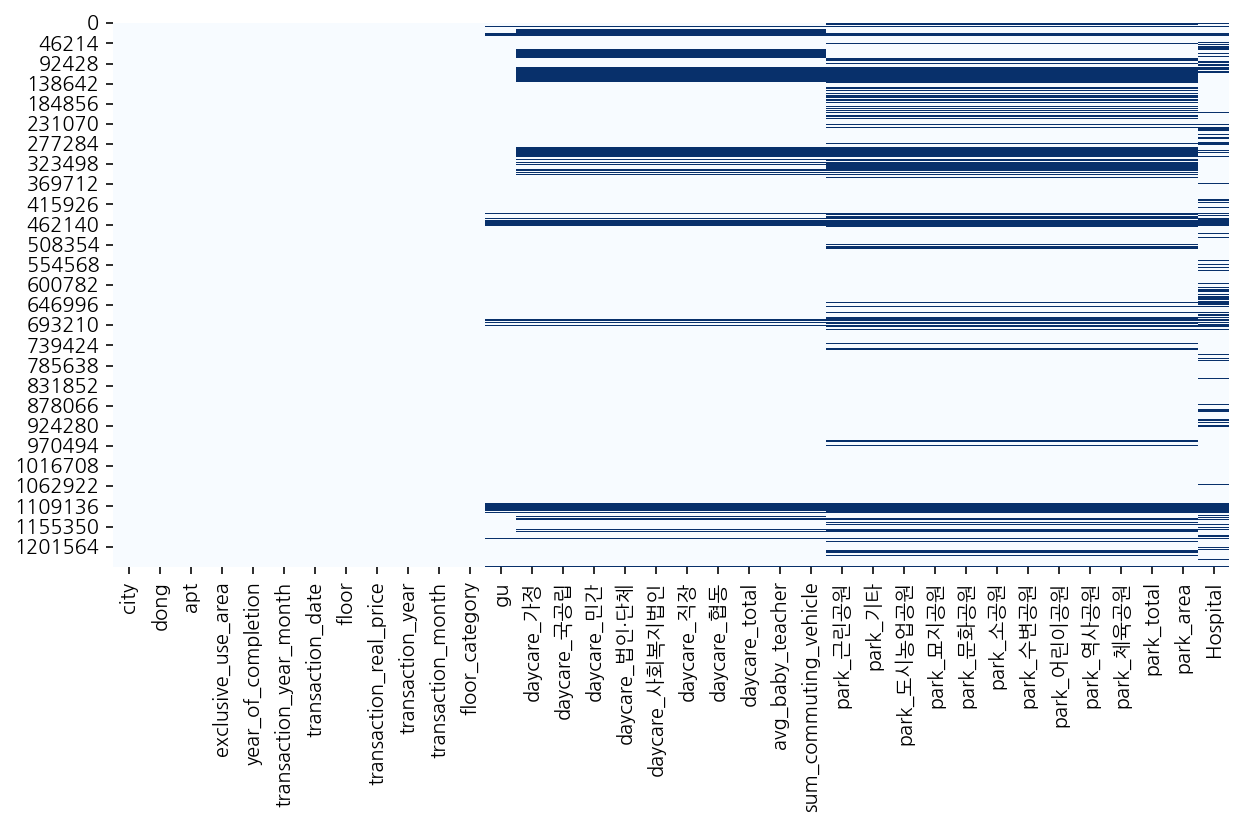

In [74]:
# 결측치 시각화
fig = plt.figure(figsize=(10, 5))
sns.heatmap(train_df_merge.isnull(), cbar=False, cmap='Blues')  

<AxesSubplot:>

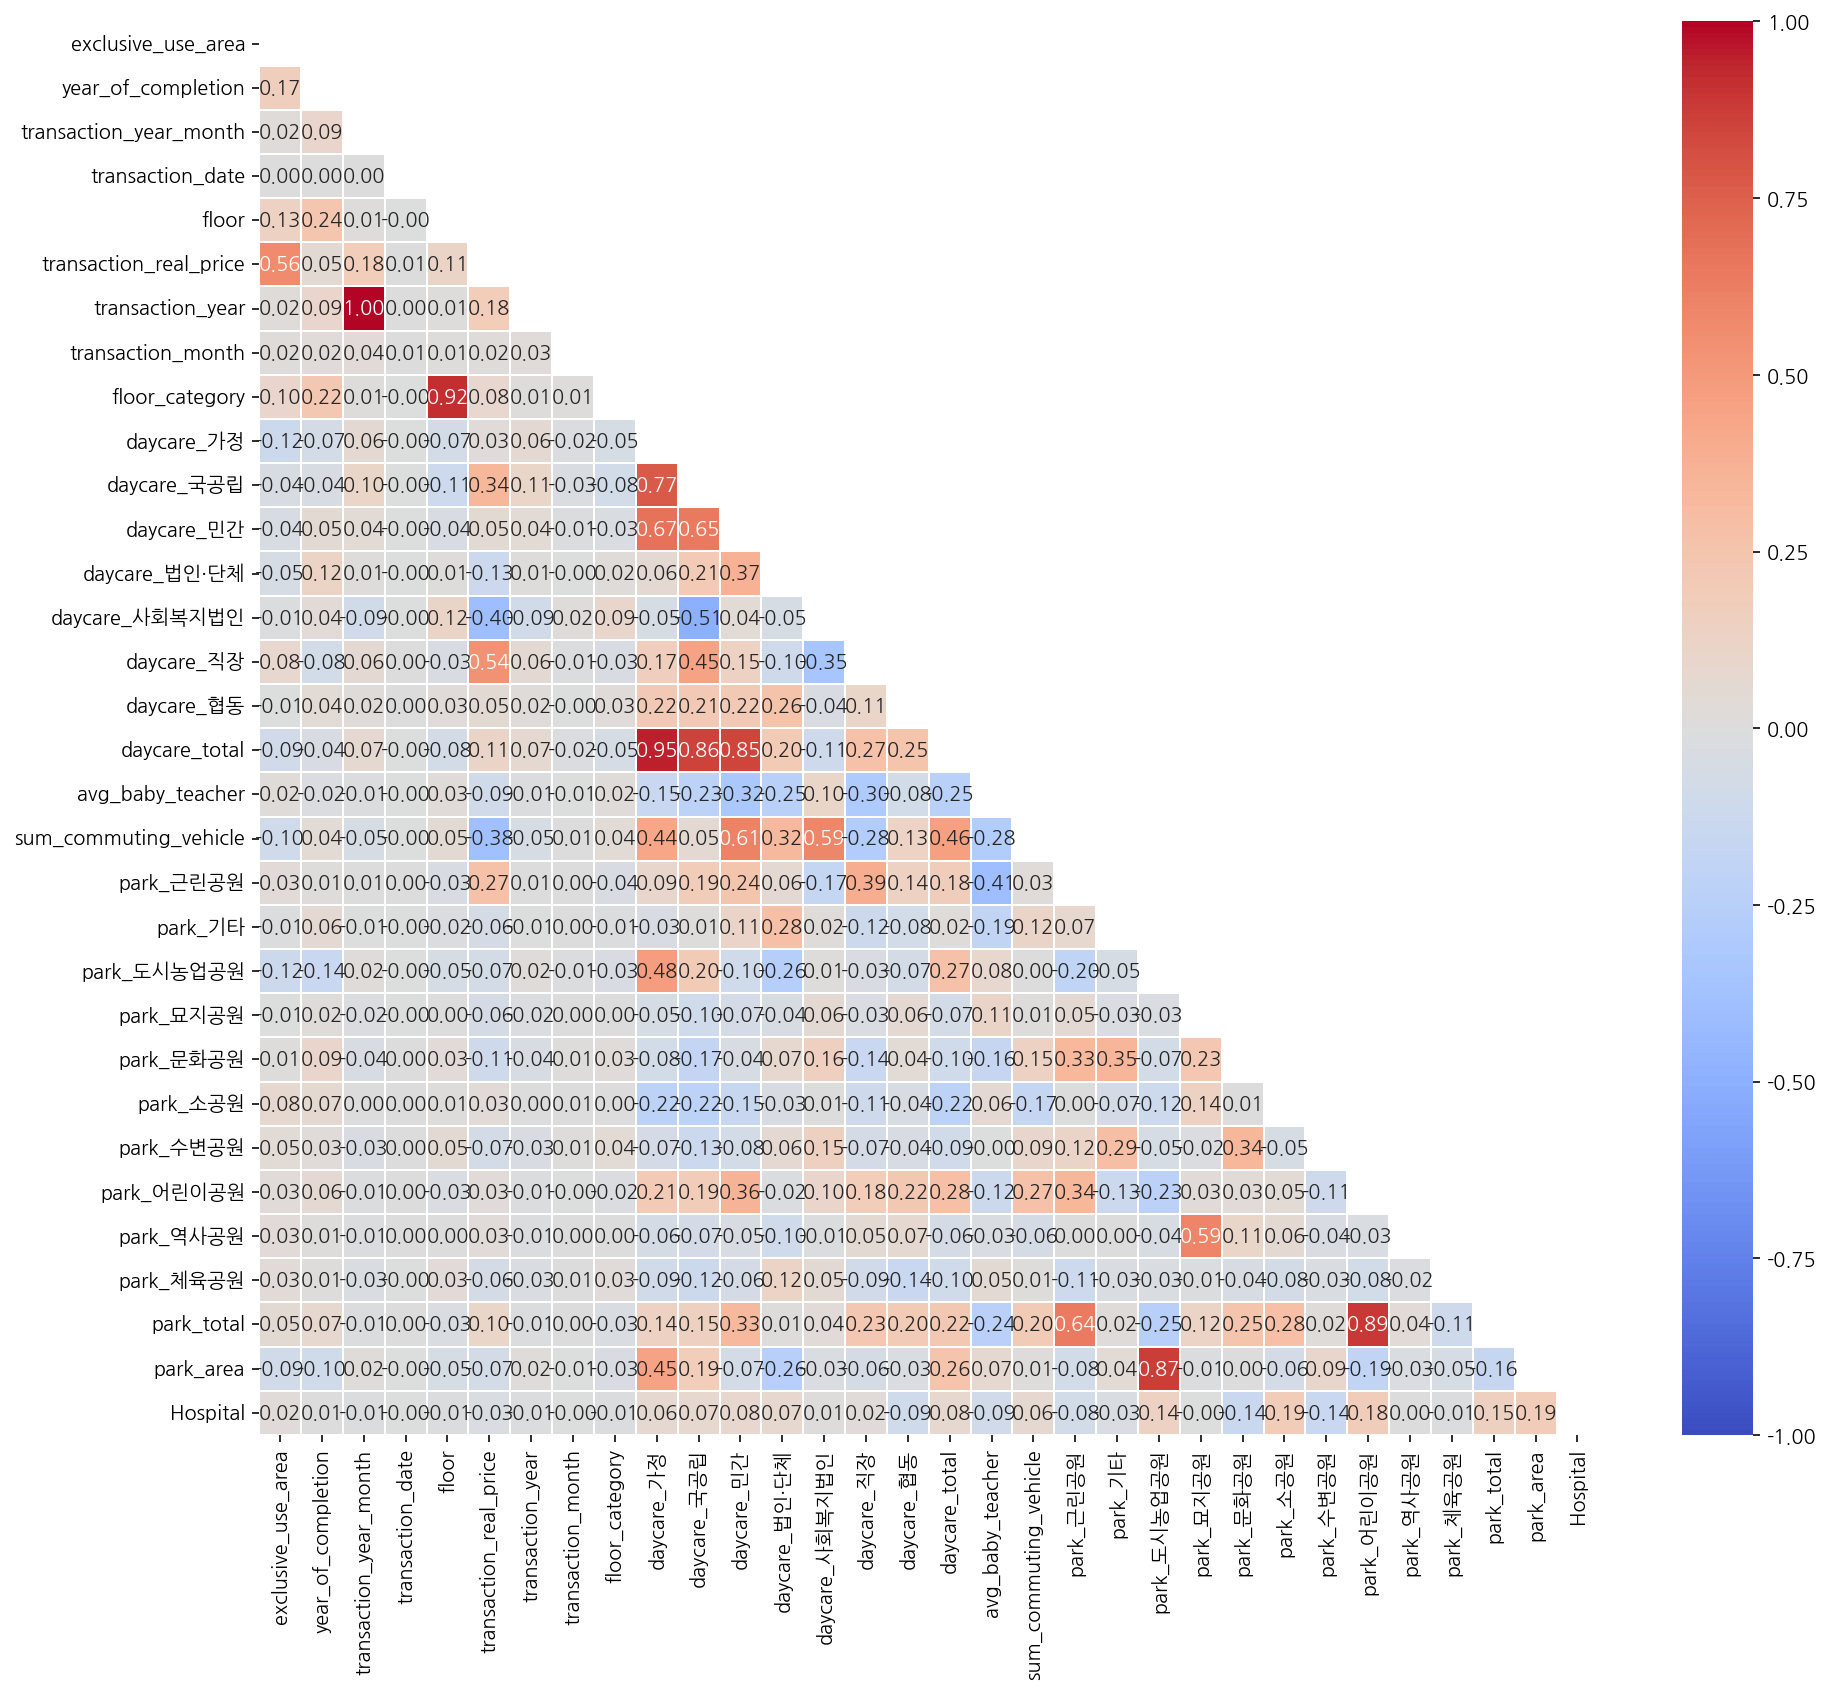

In [75]:
# corr = train_df_merge.corr(numeric_only=True)
# mask = np.triu(np.ones_like(corr, dtype=bool))
# fig = plt.figure(figsize=(15, 13))
# sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.2, vmin = -1, vmax = 1, mask = mask)

# 파이썬 버전차이로 조금 LMS에서는 이 코드를 사용
numeric_train_df_merge = train_df_merge.select_dtypes(include=[np.number])

corr = train_df_merge.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig = plt.figure(figsize=(15, 13))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.2, vmin = -1, vmax = 1, mask = mask)

In [76]:
# Drop non-numeric columns
numeric_train_df_merge = train_df_merge.select_dtypes(include=[np.number])

# Calculate correlation
corr = numeric_train_df_merge.corr()['transaction_real_price'].sort_values(ascending=False)

print(corr)

transaction_real_price    1.000000
exclusive_use_area        0.562646
daycare_직장                0.538569
daycare_국공립               0.341183
park_근린공원                 0.265631
transaction_year_month    0.183491
transaction_year          0.183290
daycare_total             0.113162
floor                     0.110780
park_total                0.103864
floor_category            0.081630
year_of_completion        0.051073
daycare_민간                0.051001
daycare_협동                0.048939
park_소공원                  0.031559
park_역사공원                 0.030221
daycare_가정                0.029752
park_어린이공원                0.026926
transaction_month         0.023394
transaction_date          0.006533
Hospital                 -0.030819
park_체육공원                -0.056527
park_기타                  -0.058000
park_묘지공원                -0.059304
park_도시농업공원              -0.072260
park_area                -0.072416
park_수변공원                -0.074279
avg_baby_teacher         -0.091793
park_문화공원           

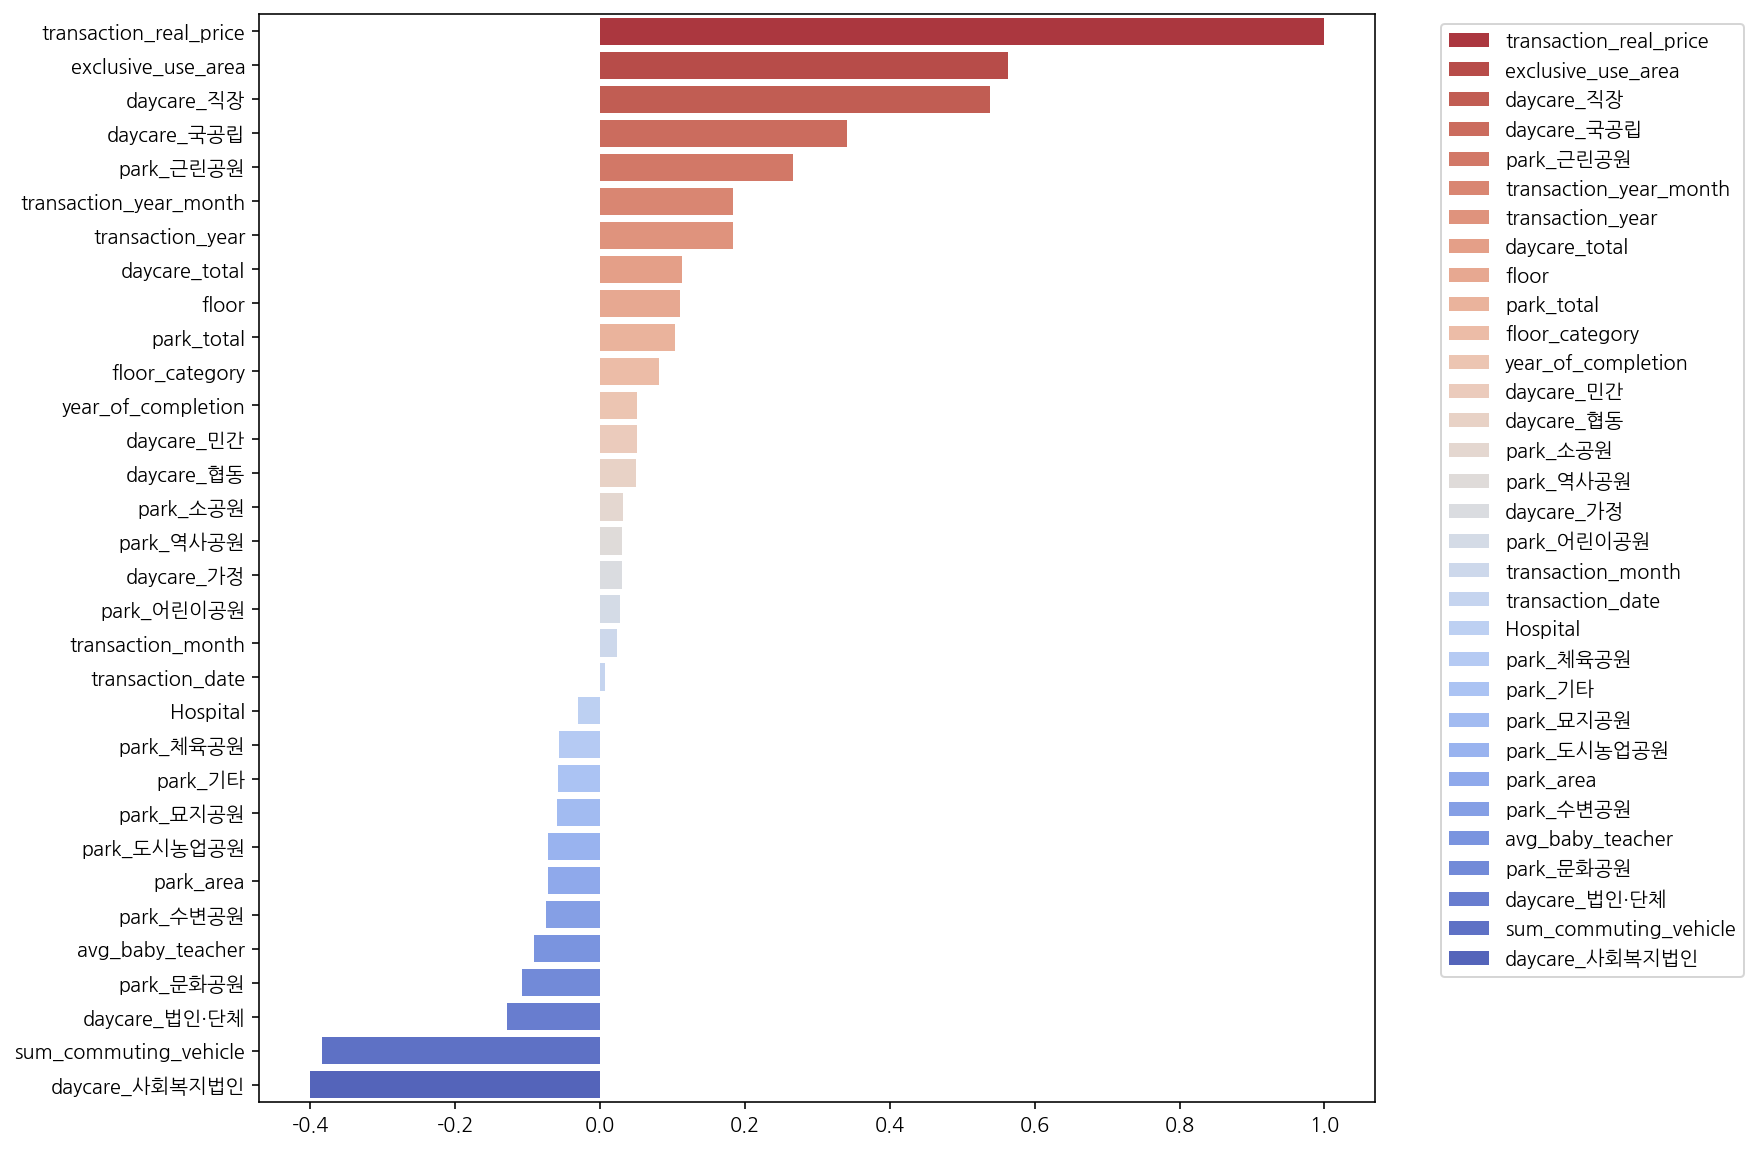

In [77]:
fig = plt.figure(figsize=(10, 10))
sns.barplot(x=corr.values, y=corr.index, hue=corr.index, dodge=False, palette='coolwarm_r')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') #파이썬 버전으로 차이로 축가
plt.show()


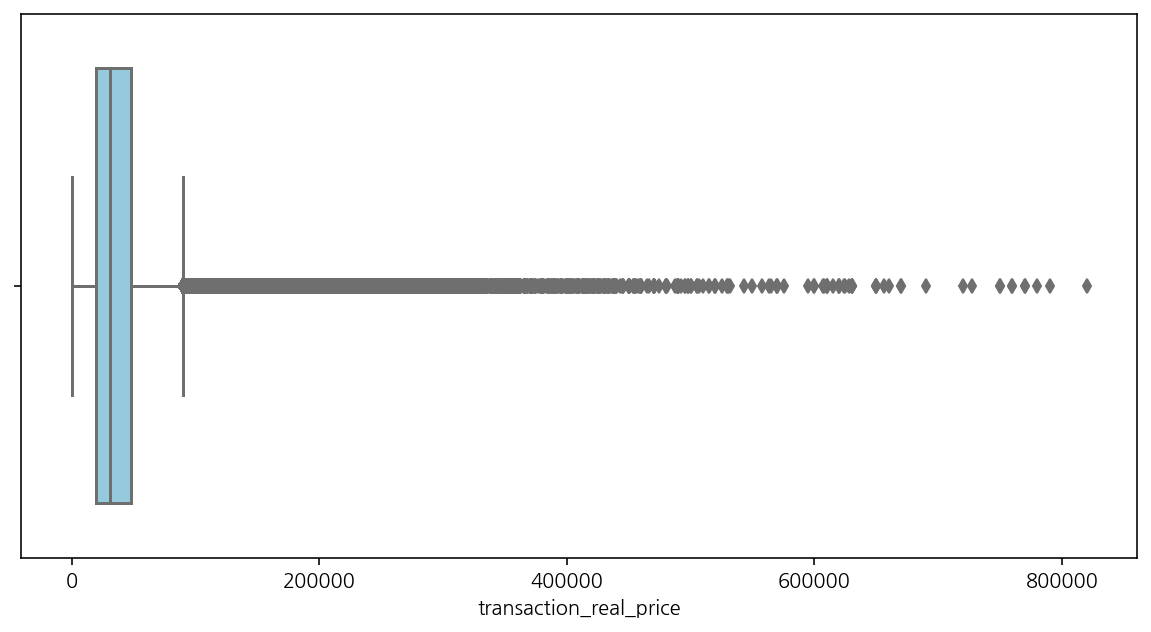

In [78]:
fig = plt.figure(figsize=(10, 5))
sns.boxplot(data=train_df_merge, x='transaction_real_price', color='skyblue');

이전에도 확인을 했지만 가격에 아웃라이거 너무 많다

### 병합 데이터 시각화

In [79]:
train_df_merge_vi = train_df_merge.copy()

#### 아파트
**연식**<br/>
신식 아파트일수록 거래가격이 비쌀까?

In [80]:
# 아파트가 지어진 후 년도차이
train_df_merge_vi['year_diff'] = train_df_merge_vi['transaction_year'] - train_df_merge_vi['year_of_completion']

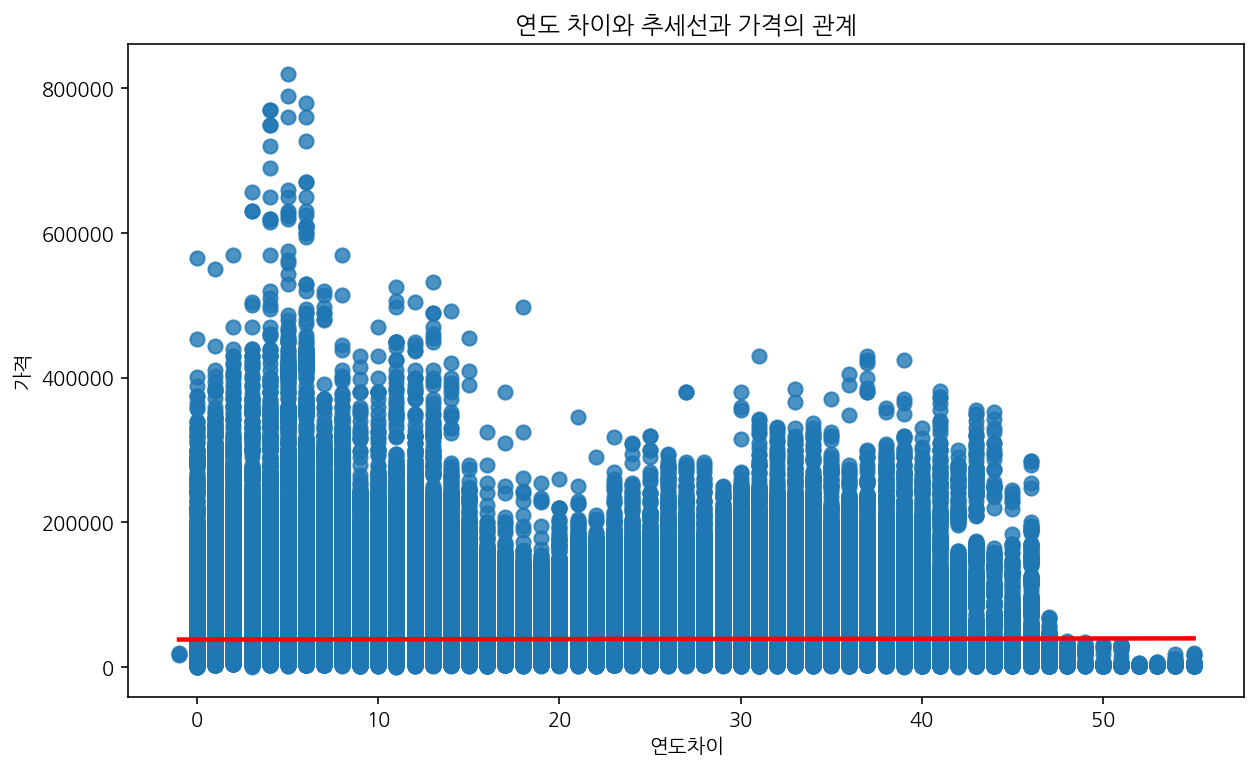

In [81]:
# 'year_diff'와 'price'의 관계를 그래프로 표현


plt.figure(figsize=(10, 6))
sns.regplot(x='year_diff', y='transaction_real_price', data=train_df_merge_vi, scatter_kws={'s': 50}, line_kws={"color": "red"})
plt.title('연도 차이와 추세선과 가격의 관계')
plt.xlabel('연도차이')
plt.ylabel('가격')
plt.show()

In [82]:
#corr
train_df_merge_vi[['year_diff', 'transaction_real_price']].corr()

year_diff  transaction_real_price
year_diff                 1.00000                 0.00839
transaction_real_price    0.00839                 1.00000

그래프의 분포를 보았을 때는 아파트 연식과 가격이 음의 상관관계가 있는 것으로 보여지나 추세선과 상관계수를 확인하였을 때 데이터의 표본이 많아지며 아파트 연식과 가격은 큰 상관관계가 없어 drop하겠습니다.

In [83]:
# year_diff drop
train_df_merge_vi.drop('year_diff', axis=1, inplace=True)

**브랜드**<br/>
국토교통부 23년도 건설업체 시공능력평가 결과 기준 (https://www.molit.go.kr/USR/NEWS/m_71/dtl.jsp?lcmspage=2&id=95088649) <br/>
상위 20위 브랜드와 기타의 평균 가격으로 순위 측정

In [84]:
#브랜드 건설사 순위를 매기기 위한 조건에 따른 함수 정의
def rank_apt(name):
    if '래미안' in name:
        return '삼성물산'
    elif '힐스테이트' in name:
        return '현대건설'
    elif '디에이치' in name:
        return '현대엔지니어링'
    elif '푸르지오' in name:
        return '대우'
    elif '자이' in name:
        return 'GS'
    elif 'e편한세상' in name.lower() or '아크로' in name:
        return 'DL'
    elif '더샵' in name or '오티에르' in name:
        return '포스코'
    elif 'e편한세상' in name.lower() or '아크로' in name:
        return 'DL'
    elif '롯데' in name or '르엘' in name:
        return '롯데'
    elif 'sk' in name.lower() or '드파인' in name or '아펠바움' in name:
        return 'SK'
    elif '베르디움' in name or '호반써밋' in name:
        return '호반'
    elif '아이파크' in name or '현대' in name:
        return 'HDC'
    elif '디에트르' in name or '대방' in name:
        return '대방'
    elif '포레나' in name or '꿈에그린' in name or '오벨리스크' in name:
        return '한화'
    elif '디에트르' in name or '대방' in name:
        return '대방'
    elif 'S-클래스' in name or 's-class' in name.lower():
        return '중흥'
    elif '데시앙' in name:
        return '태영'
    elif '풍경채' in name:
        return '제일'
    elif '엘리프' in name or 'elif' in name.lower() or 'richeville' in name.lower() or '리슈빌' in name:
        return '계룡'
    elif '하늘채' in name:
        return '코오롱'
    elif '스타힐스' in name or 'starhills' in name.lower():
        return '서희'
    else:
        return '기타'

# 'apt' 열의 값에 따라 순위를 매김
train_df_merge_vi['rank'] = train_df_merge_vi['apt'].apply(rank_apt)

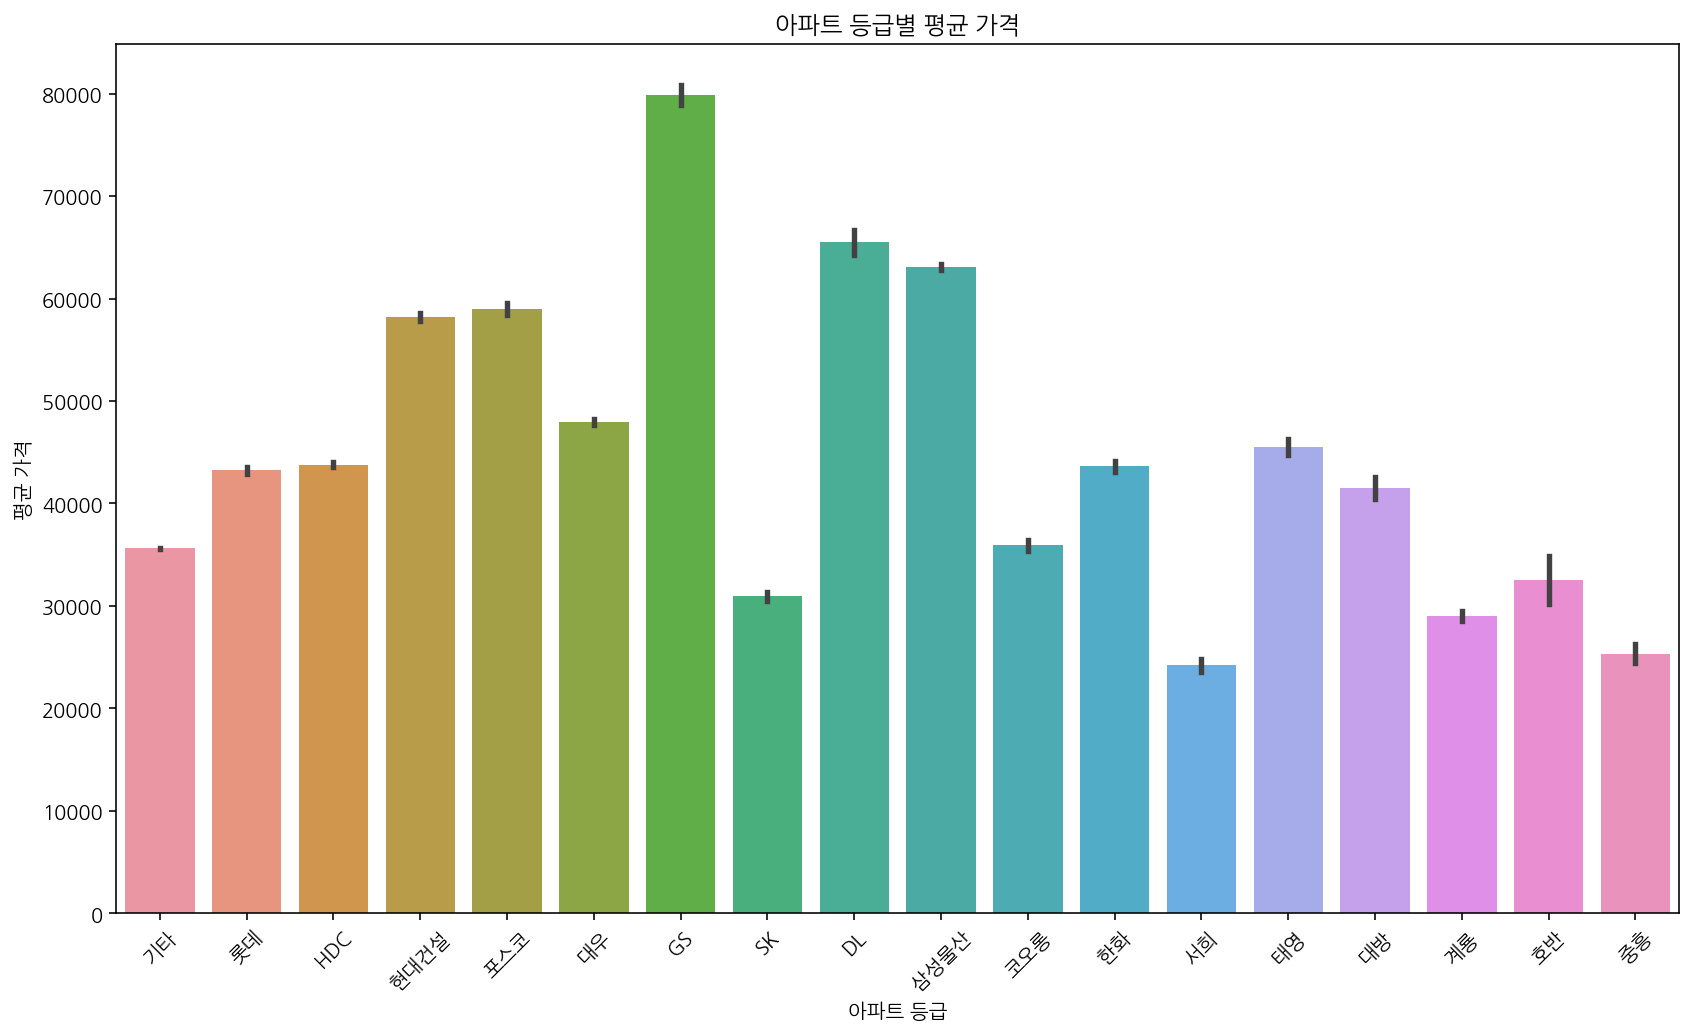

In [85]:
plt.figure(figsize=(14, 8))
sns.barplot(x='rank', y='transaction_real_price', data=train_df_merge_vi)
plt.title('아파트 등급별 평균 가격')
plt.xlabel('아파트 등급')
plt.ylabel('평균 가격')
plt.xticks(rotation=45)  # x축 라벨 회전
plt.show()

자이 아파트가 압도적인 아파트 평균가격을 보여주고 있습니다.<br/>
그래프를 보았을 때 아파트 건설사 순위와 가격은 연관이 없는 것으로 확인됩니다.<br/>
모델 성능 향상을 위해 평균 가격 별로 등급을 측정하여 브랜드 이름에 매핑해 ['rank_avg_price']로 저장하겠습니다.


In [86]:
# rank 별 평균 가격 계산
rank_avg_price = train_df_merge_vi.groupby('rank')['transaction_real_price'].mean()

# 평균 가격을 기준으로 순위 매기기
rank_avg_price_ranked = rank_avg_price.rank(method='dense').astype(int)

# 계산된 순위를 기반으로 각 아파트의 rank_avg_price 값을 매핑
train_df_merge_vi['rank_avg_price'] = train_df_merge_vi['rank'].map(rank_avg_price_ranked)

**평수**

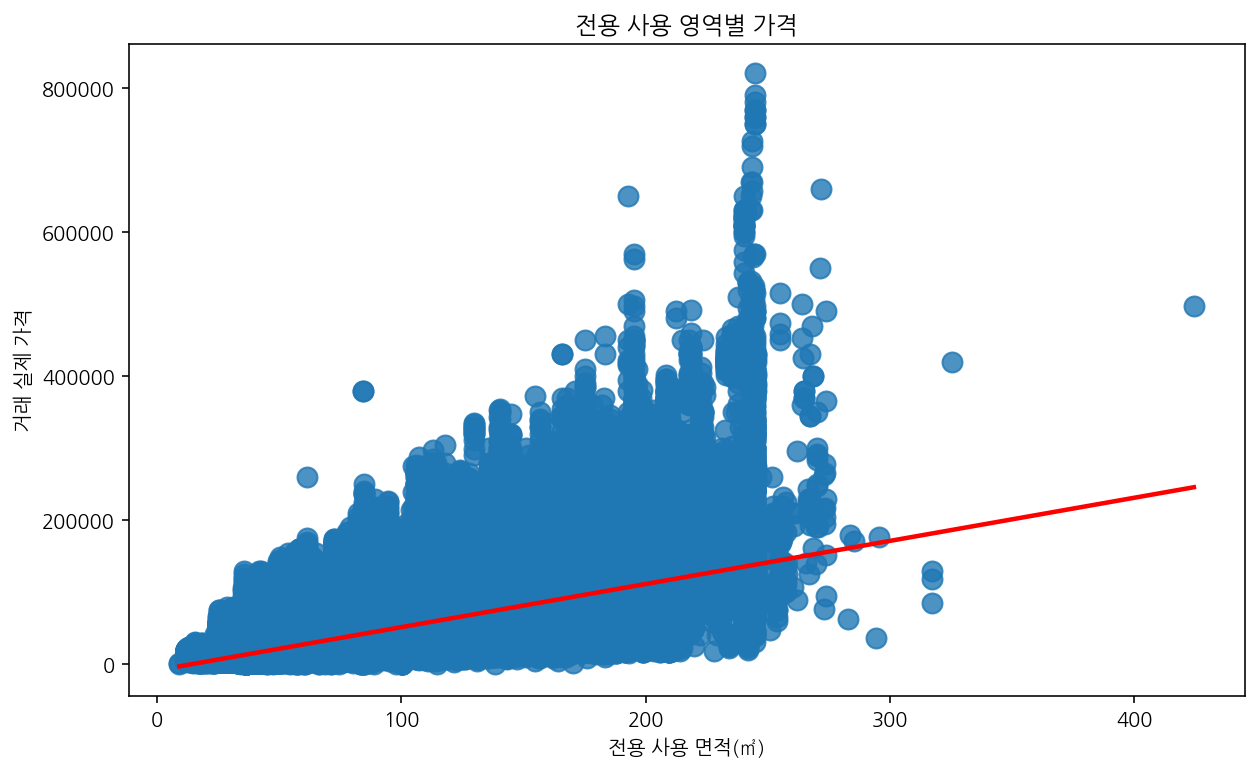

In [87]:
plt.figure(figsize=(10, 6))
sns.regplot(x='exclusive_use_area', y='transaction_real_price', data=train_df_merge_vi, scatter_kws={'s': 100}, line_kws={"color": "red"})
plt.title('전용 사용 영역별 가격')
plt.xlabel('전용 사용 면적(㎡)')
plt.ylabel('거래 실제 가격')
plt.show()

평수는 가격을 결정하는데 주요한 요소인 것으로 보여집니다.

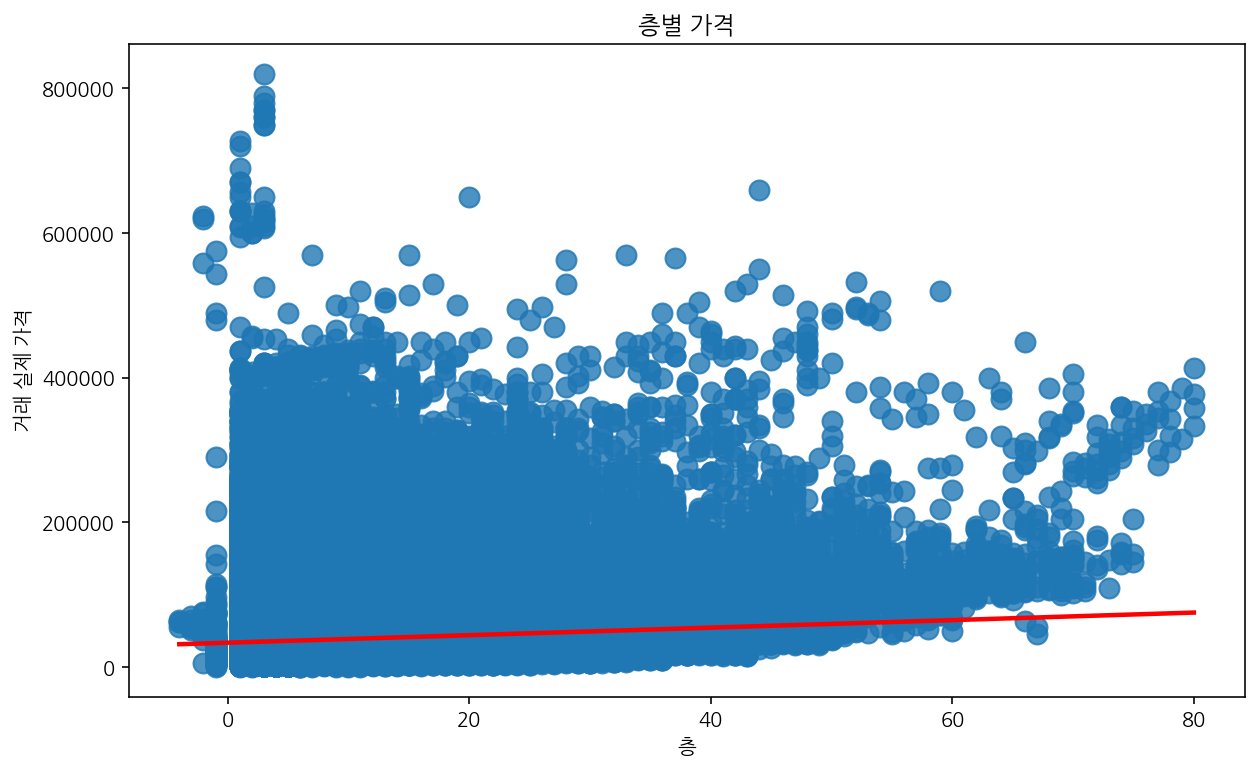

In [88]:
plt.figure(figsize=(10, 6))
sns.regplot(x='floor', y='transaction_real_price', data=train_df_merge_vi, scatter_kws={'s': 100}, line_kws={"color": "red"})
plt.title('층별 가격')
plt.xlabel('층')
plt.ylabel('거래 실제 가격')
plt.show()

In [89]:
#corr
train_df_merge_vi[['floor', 'transaction_real_price']].corr()

floor  transaction_real_price
floor                   1.00000                 0.11078
transaction_real_price  0.11078                 1.00000

층수 별 최고가는 음의 상관관계로 높아질수록 가격이 낮아져보이지만 <br/>
평균적으로는 층수와 가격은 양의 상관관계이며 높을수록 가격이 비싸지는 경향이 있는 것으로 확인됩니다.

### 입지적 요소

**공원**

### 경제적 요소

**기준금리** <br/>
출처 : e-나라지표 (https://www.index.go.kr/unity/potal/main/EachDtlPageDetail.do?idx_cd=1073)

In [90]:
#기준 금리
data = {
    'transaction_year' : [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
    'base_rate': [3.00, 2.00, 2.50, 3.25, 2.75, 2.50, 2.00, 1.50, 1.25, 1.50]
}

data = pd.DataFrame(data)

# 기준금리를 'Base Rate'에 저장
train_df_merge_vi = train_df_merge_vi.merge(data, on='transaction_year', how='left')


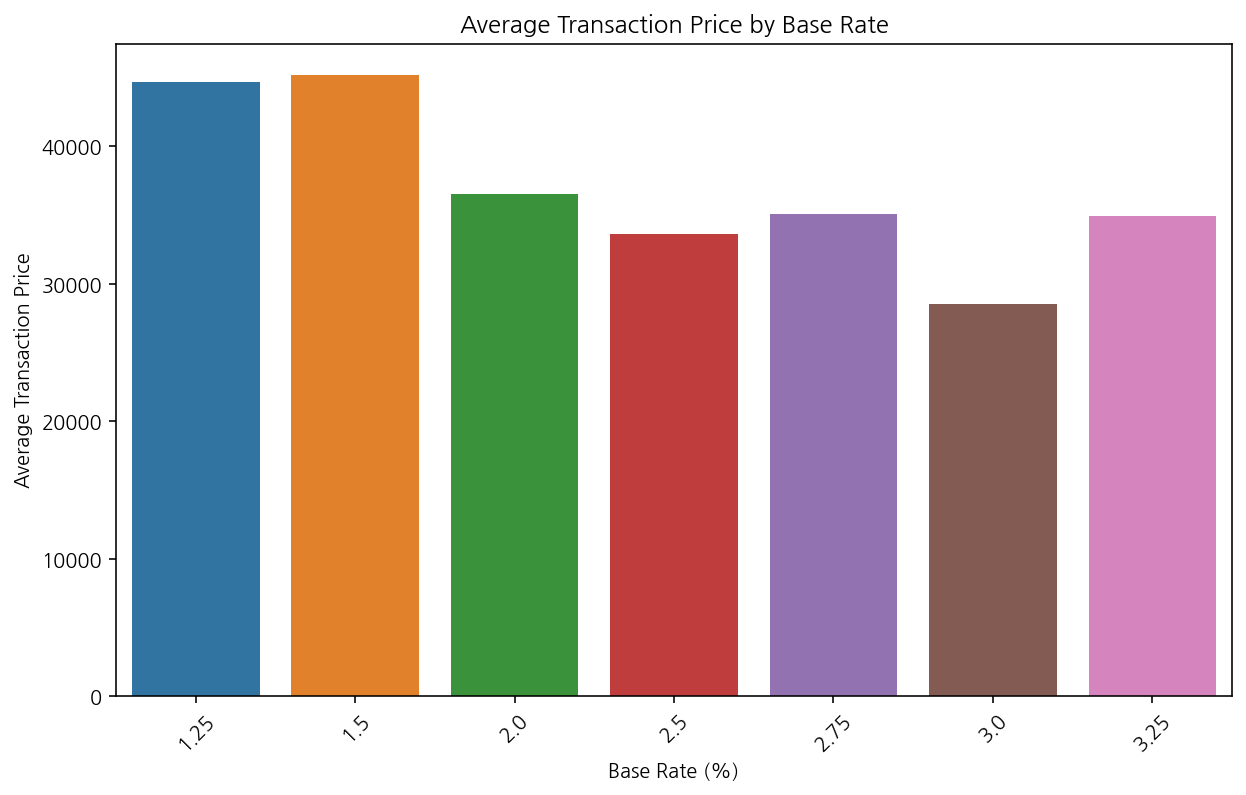

In [91]:
#시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='base_rate', y='transaction_real_price', data=train_df_merge_vi, estimator=np.mean, ci=None)
plt.title('Average Transaction Price by Base Rate')
plt.xlabel('Base Rate (%)')
plt.ylabel('Average Transaction Price')
plt.xticks(rotation=45)  # x축 라벨 회전
plt.show()

In [92]:
#corr
train_df_merge_vi[['base_rate', 'transaction_real_price']].corr()

base_rate  transaction_real_price
base_rate                1.000000               -0.161547
transaction_real_price  -0.161547                1.000000

기준 금리는 음의 상관관계를 보이지만 예상보다는 적은 영향을 주는 것으로 확인됩니다.

**지역별 인구밀도** <br/>
단위 : 명/km<br/>
출처: 통계청「장래인구추계 시도편 : 2020-2050」, 국토교통부「지적통계」 (https://www.index.go.kr/unity/potal/main/EachDtlPageDetail.do?idx_cd=1007)

In [93]:
data_hu = {
    'transaction_year' : [2008,	2009,	2010,	2011,	2012,	2013,	2014,	2015,	2016,	2017],
    '서울_인구' : [	16714,	16758,	16667,	16643,	16583,	16507,	16482,	16425,	16263,	16136],
    '부산_인구' : [	4588,	4566,	4531,	4524,	4498,	4489,	4485,	4484,	4477,	4447]
}

data_hu = pd.DataFrame(data_hu)

# 인구밀도를 'Base Rate'에 저장
train_df_merge_vi = train_df_merge_vi.merge(data_hu, on='transaction_year', how='left')


No handles with labels found to put in legend.
No handles with labels found to put in legend.


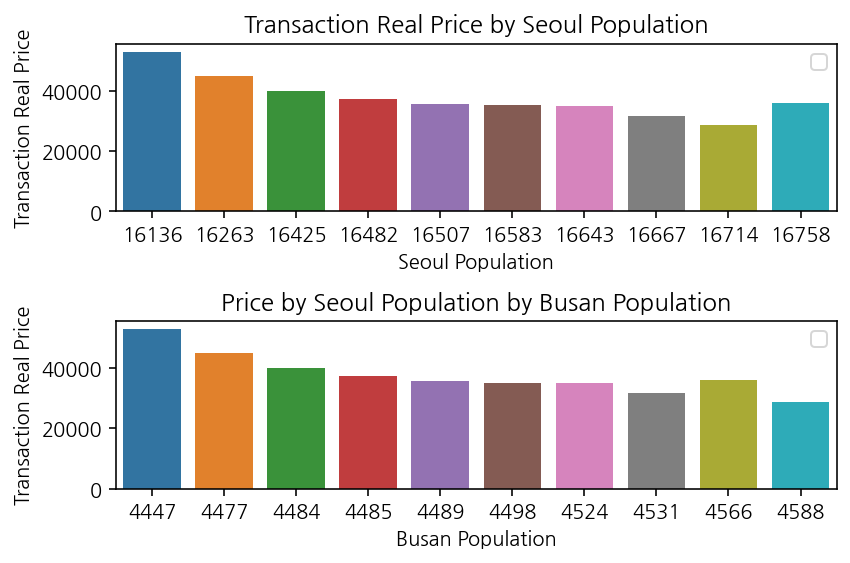

In [94]:
# 'transaction_real_price'를 기준으로 정렬

plt.subplot(2, 1, 1) 
sns.barplot(x='서울_인구', y='transaction_real_price', data=train_df_merge_vi, estimator=np.mean, ci=None)
plt.title('Transaction Real Price by Seoul Population')
plt.xlabel('Seoul Population')
plt.ylabel('Transaction Real Price')
plt.legend()

plt.subplot(2, 1, 2) 
sns.barplot(x='부산_인구', y='transaction_real_price', data=train_df_merge_vi, estimator=np.mean, ci=None)
plt.title('Price by Seoul Population by Busan Population')
plt.xlabel('Busan Population')
plt.ylabel('Transaction Real Price')
plt.legend()


plt.tight_layout()

plt.show()

예상하지 못했던 결과가 나왔습니다. <br/>
인구밀도가 높을수록 집값이 비싸야하지만 인구밀도가 낮을수록 가격이 높은 것이 확인됩니다. <br/> <br/>
원인은 연도에서 찾을 수 있었는데, 인구 밀도가 높을수록 과거 연도이기 때문에 가격이 낮은 것으로 보여집니다. <br/>
과거 데이터임에도 주요도시의 인구 밀도가 조금씩 감소하는 것을 체감할 수 있었습니다..
<스크린샷>

### 결측치처리 및 base_model

In [95]:
train_df_merge.isnull().sum()

city                           0
dong                           0
apt                            0
exclusive_use_area             0
year_of_completion             0
transaction_year_month         0
transaction_date               0
floor                          0
transaction_real_price         0
transaction_year               0
transaction_month              0
floor_category                 0
gu                         63735
daycare_가정                177399
daycare_국공립               177399
daycare_민간                177399
daycare_법인·단체             177399
daycare_사회복지법인            177399
daycare_직장                177399
daycare_협동                177399
daycare_total             177399
avg_baby_teacher          177399
sum_commuting_vehicle     177399
park_근린공원                 295341
park_기타                   295341
park_도시농업공원               295341
park_묘지공원                 295341
park_문화공원                 295341
park_소공원                  295341
park_수변공원                 295341
park_어린이공원

In [96]:
train_df_merge.drop(['city', 'dong', 'apt', 'gu'], axis=1, inplace=True)

In [97]:
train_df_merge.isnull().sum()

exclusive_use_area             0
year_of_completion             0
transaction_year_month         0
transaction_date               0
floor                          0
transaction_real_price         0
transaction_year               0
transaction_month              0
floor_category                 0
daycare_가정                177399
daycare_국공립               177399
daycare_민간                177399
daycare_법인·단체             177399
daycare_사회복지법인            177399
daycare_직장                177399
daycare_협동                177399
daycare_total             177399
avg_baby_teacher          177399
sum_commuting_vehicle     177399
park_근린공원                 295341
park_기타                   295341
park_도시농업공원               295341
park_묘지공원                 295341
park_문화공원                 295341
park_소공원                  295341
park_수변공원                 295341
park_어린이공원                295341
park_역사공원                 295341
park_체육공원                 295341
park_total                295341
park_area 

In [98]:
train_df_merge.fillna(0)

exclusive_use_area  year_of_completion  transaction_year_month  \
0                   84.8200                2002                  200801   
1                   99.1700                1973                  200801   
2                   84.7400                2007                  200801   
3                  146.3900                2003                  200801   
4                  194.4300                2004                  200801   
...                     ...                 ...                     ...   
1247760             59.8245                2012                  201711   
1247761             84.9923                2012                  201711   
1247762             84.9923                2012                  201711   
1247763            101.7400                2008                  201711   
1247764             84.9923                2012                  201711   

         transaction_date  floor  transaction_real_price  transaction_year  \
0                       2      2                   37500              2008   
1                       1      6                   20000              2008   
2                       1      6                   38500              2008   
3                       0     15                  118000              2008   
4                       2      3                  120000              2008   
...                   ...    ...                     ...               ...   
1247760                 0      3                   22000              2017   
1247761                 2      7                   30750              2017   
1247762                 2      9                   29500              2017   
1247763                 2      7                   26700              2017   
1247764                 2     16                   28800              2017   

         transaction_month  floor_category  daycare_가정  ...  park_묘지공원  \
0                        1               1         4.0  ...        0.0   
1                        1               2         4.0  ...        0.0   
2                        1               2         4.0  ...        0.0   
3                        1               3         4.0  ...        0.0   
4                        1               1         4.0  ...        0.0   
...                    ...             ...         ...  ...        ...   
1247760                 11               1         0.0  ...        0.0   
1247761                 11               2         0.0  ...        0.0   
1247762                 11               2         0.0  ...        0.0   
1247763                 11               2         0.0  ...        0.0   
1247764                 11               3         0.0  ...        0.0   

         park_문화공원  park_소공원  park_수변공원  park_어린이공원  park_역사공원  park_체육공원  \
0              0.0       0.0        0.0         0.0        0.0        0.0   
1              0.0       0.0        0.0         0.0        0.0        0.0   
2              0.0       0.0        0.0         0.0        0.0        0.0   
3              0.0       0.0        0.0         0.0        0.0        0.0   
4              0.0       0.0        0.0         0.0        0.0        0.0   
...            ...       ...        ...         ...        ...        ...   
1247760        0.0       0.0        0.0         0.0        0.0        0.0   
1247761        0.0       0.0        0.0         0.0        0.0        0.0   
1247762        0.0       0.0        0.0         0.0        0.0        0.0   
1247763        0.0       0.0        0.0         0.0        0.0        0.0   
1247764        0.0       0.0        0.0         0.0        0.0        0.0   

         park_total  park_area  Hospital  
0               0.0        0.0       0.0  
1               0.0        0.0       0.0  
2               0.0        0.0       0.0  
3               0.0        0.0       0.0  
4               0.0        0.0       0.0  
...             ...        ...       ...  
1247760         0.0        0.0       0.0  
1247761      

In [99]:
# 무한대 값을 NaN으로 대체합니다.
train_df_merge.replace([np.inf, -np.inf], np.nan, inplace=True)

In [100]:
# 각 열의 결측치를 해당 열의 중앙값으로 채웁니다.
train_df_merge.fillna(train_df_merge.median(), inplace=True)

In [101]:
train_df_merge.isnull().sum()

exclusive_use_area        0
year_of_completion        0
transaction_year_month    0
transaction_date          0
floor                     0
transaction_real_price    0
transaction_year          0
transaction_month         0
floor_category            0
daycare_가정                0
daycare_국공립               0
daycare_민간                0
daycare_법인·단체             0
daycare_사회복지법인            0
daycare_직장                0
daycare_협동                0
daycare_total             0
avg_baby_teacher          0
sum_commuting_vehicle     0
park_근린공원                 0
park_기타                   0
park_도시농업공원               0
park_묘지공원                 0
park_문화공원                 0
park_소공원                  0
park_수변공원                 0
park_어린이공원                0
park_역사공원                 0
park_체육공원                 0
park_total                0
park_area                 0
Hospital                  0
dtype: int64

### 결측치 제거후 데이터 저장

In [102]:
train_df_merge.to_csv(home + 'train_merged2.csv')

In [103]:
train_df_merge

exclusive_use_area  year_of_completion  transaction_year_month  \
0                   84.8200                2002                  200801   
1                   99.1700                1973                  200801   
2                   84.7400                2007                  200801   
3                  146.3900                2003                  200801   
4                  194.4300                2004                  200801   
...                     ...                 ...                     ...   
1247760             59.8245                2012                  201711   
1247761             84.9923                2012                  201711   
1247762             84.9923                2012                  201711   
1247763            101.7400                2008                  201711   
1247764             84.9923                2012                  201711   

         transaction_date  floor  transaction_real_price  transaction_year  \
0                       2      2                   37500              2008   
1                       1      6                   20000              2008   
2                       1      6                   38500              2008   
3                       0     15                  118000              2008   
4                       2      3                  120000              2008   
...                   ...    ...                     ...               ...   
1247760                 0      3                   22000              2017   
1247761                 2      7                   30750              2017   
1247762                 2      9                   29500              2017   
1247763                 2      7                   26700              2017   
1247764                 2     16                   28800              2017   

         transaction_month  floor_category  daycare_가정  ...  park_묘지공원  \
0                        1               1         4.0  ...        0.0   
1                        1               2         4.0  ...        0.0   
2                        1               2         4.0  ...        0.0   
3                        1               3         4.0  ...        0.0   
4                        1               1         4.0  ...        0.0   
...                    ...             ...         ...  ...        ...   
1247760                 11               1        90.0  ...        0.0   
1247761                 11               2        90.0  ...        0.0   
1247762                 11               2        90.0  ...        0.0   
1247763                 11               2        90.0  ...        0.0   
1247764                 11               3        90.0  ...        0.0   

         park_문화공원  park_소공원  park_수변공원  park_어린이공원  park_역사공원  park_체육공원  \
0              0.0       0.0        0.0         3.0        0.0        0.0   
1              0.0       0.0        0.0         3.0        0.0        0.0   
2              0.0       0.0        0.0         3.0        0.0        0.0   
3              0.0       0.0        0.0         3.0        0.0        0.0   
4              0.0       0.0        0.0         3.0        0.0        0.0   
...            ...       ...        ...         ...        ...        ...   
1247760        0.0       0.0        0.0         3.0        0.0        0.0   
1247761        0.0       0.0        0.0         3.0        0.0        0.0   
1247762        0.0       0.0        0.0         3.0        0.0        0.0   
1247763        0.0       0.0        0.0         3.0        0.0        0.0   
1247764        0.0       0.0        0.0         3.0        0.0        0.0   

         park_total  park_area  Hospital  
0               6.0    73929.5       3.0  
1               6.0    73929.5       3.0  
2               6.0    73929.5       3.0  
3               6.0    73929.5       3.0  
4               6.0    73929.5       3.0  
...             ...        ...       ...  
1247760         6.0    73929.5       3.0  
1247761      

In [104]:
train_df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247765 entries, 0 to 1247764
Data columns (total 32 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   exclusive_use_area      1247765 non-null  float64
 1   year_of_completion      1247765 non-null  int64  
 2   transaction_year_month  1247765 non-null  int64  
 3   transaction_date        1247765 non-null  int64  
 4   floor                   1247765 non-null  int64  
 5   transaction_real_price  1247765 non-null  int64  
 6   transaction_year        1247765 non-null  int64  
 7   transaction_month       1247765 non-null  int64  
 8   floor_category          1247765 non-null  int64  
 9   daycare_가정              1247765 non-null  float64
 10  daycare_국공립             1247765 non-null  float64
 11  daycare_민간              1247765 non-null  float64
 12  daycare_법인·단체           1247765 non-null  float64
 13  daycare_사회복지법인          1247765 non-null  float64
 14  da

In [105]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error, mean_absolute_percentage_error

X = train_df_merge.drop('transaction_real_price', axis=1)
y = train_df_merge['transaction_real_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)
model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


R2 score: 0.9469220771844886
MAE: 4194.710394047383
MSE: 49883839.719773255
RMSE: 7062.849263560228


<AxesSubplot:xlabel='transaction_real_price'>

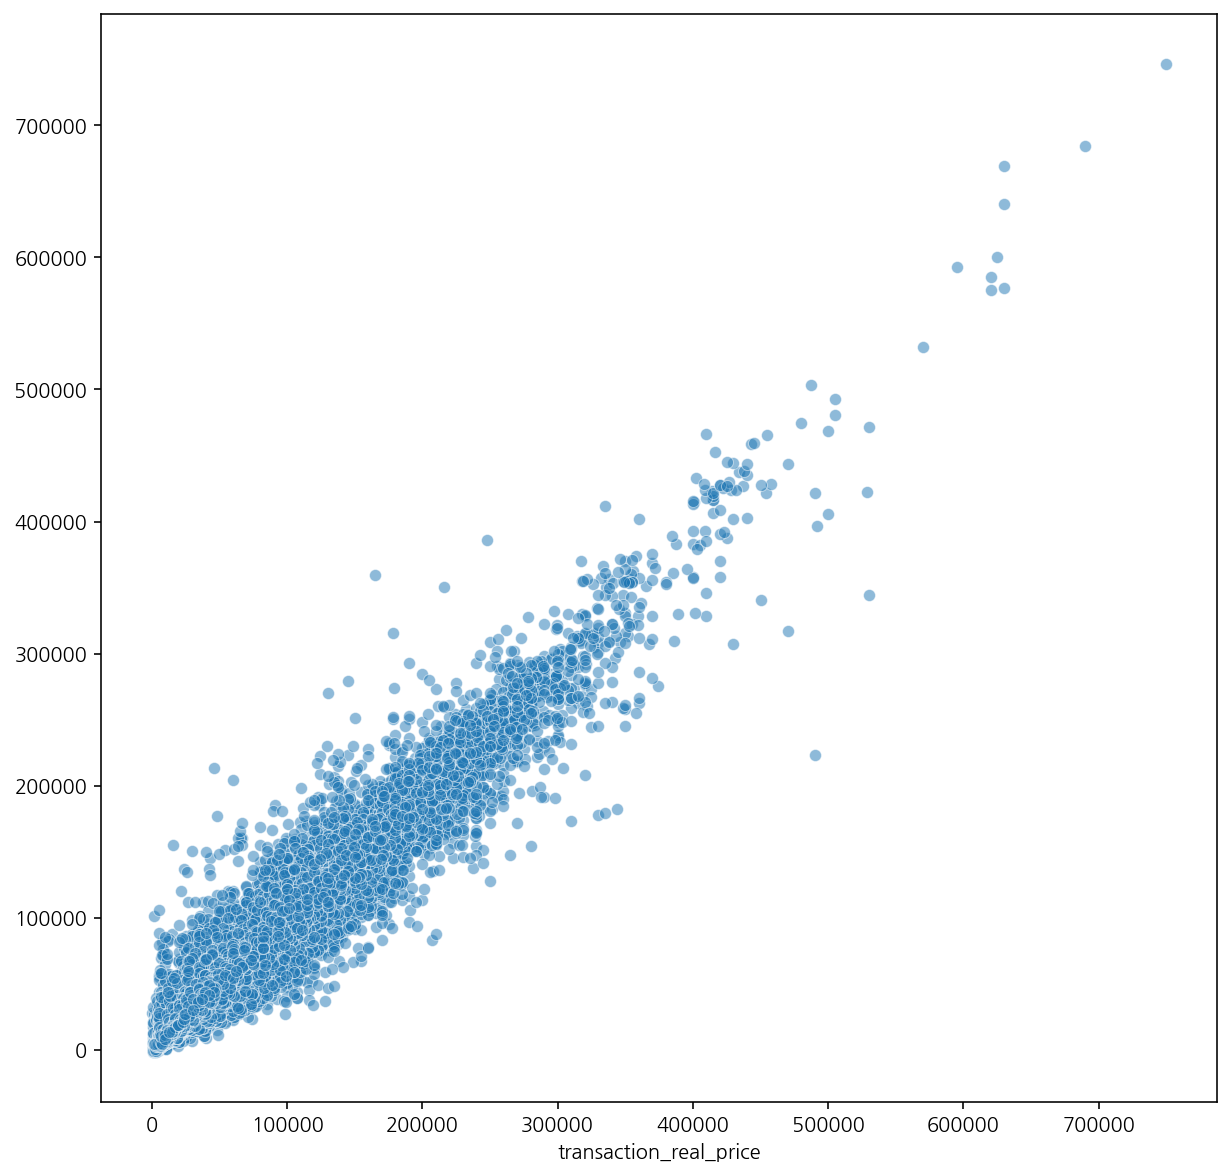

In [106]:
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)

In [107]:
# 'transaction_real_price' 열에 대해 IQR을 계산합니다.
Q1 = train_df_merge['transaction_real_price'].quantile(0.25)
Q3 = train_df_merge['transaction_real_price'].quantile(0.75)
IQR = Q3 - Q1

# 1.5 x IQR 규칙에 따라 이상치를 제거합니다.
train_df_merge = train_df_merge[~((train_df_merge['transaction_real_price'] < (Q1 - 1.5 * IQR)) | (train_df_merge['transaction_real_price'] > (Q3 + 1.5 * IQR)))]

In [108]:
# 가격  IQR을 계산후 재학습
X = train_df_merge.drop('transaction_real_price', axis=1)
y = train_df_merge['transaction_real_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)
model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))


R2 score: 0.9217028762671499
MAE: 3369.3401704040048
MSE: 27295938.466194928
RMSE: 5224.551508617264


<AxesSubplot:xlabel='transaction_real_price'>

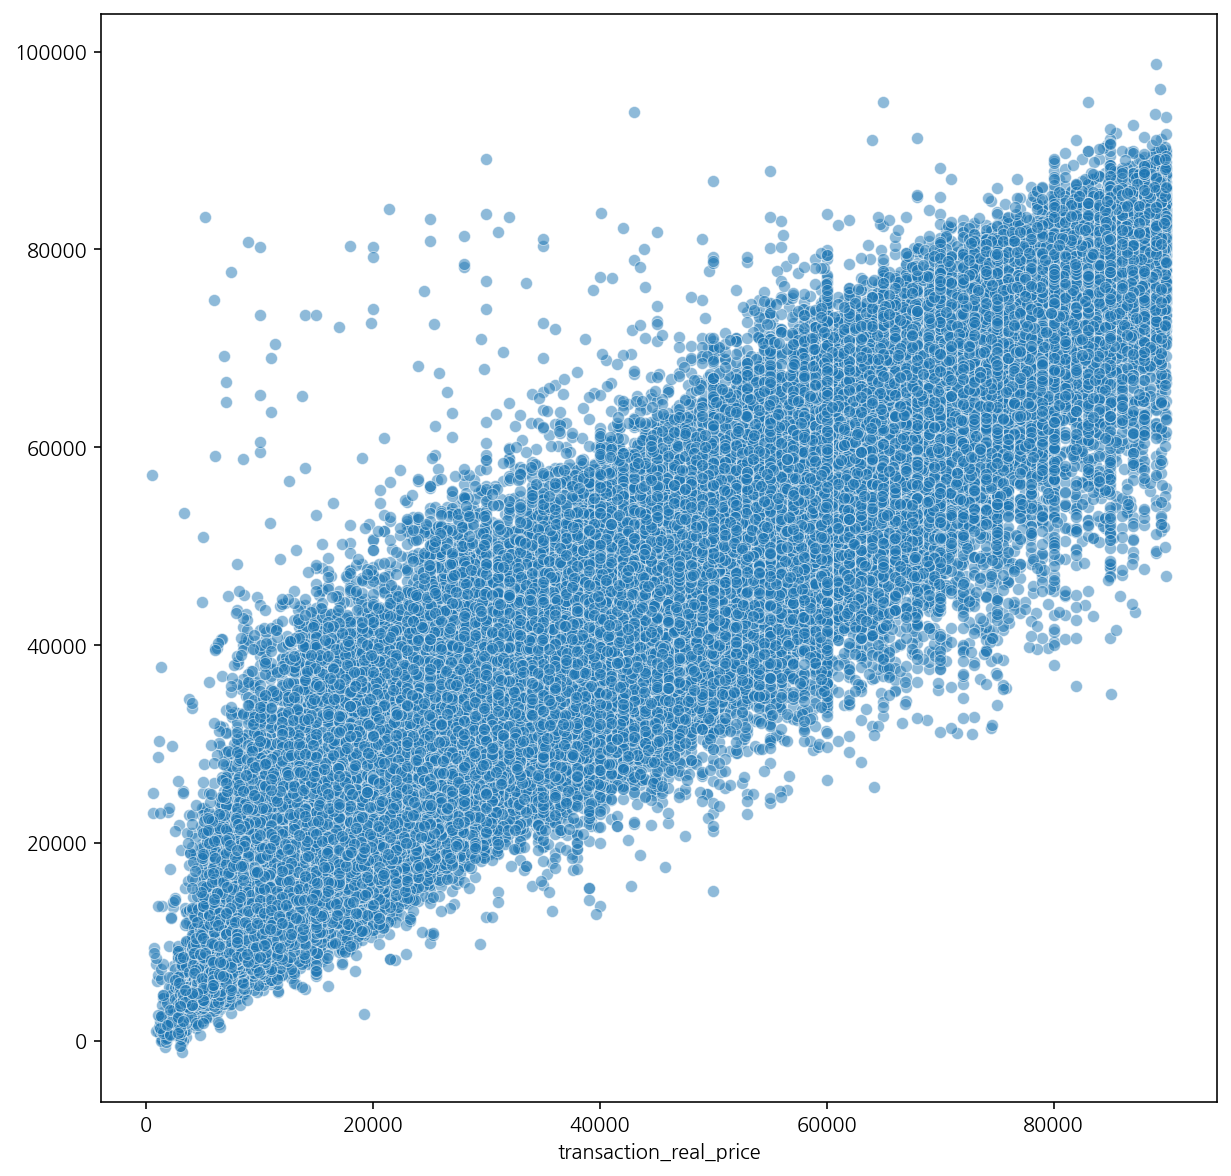

In [109]:
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)

In [110]:
# shap 가 없다면 설치
!pip install shap

     |████████████████████████████████| 535 kB 6.1 MB/s            


You are using an XGBoost version below 1.6.0 which is not fully supported by shap. Shap falls back to encoding the model as JSON which can lead to numerical precision issues. Please consider upgrading to XGBoost 1.6.0 or higher.


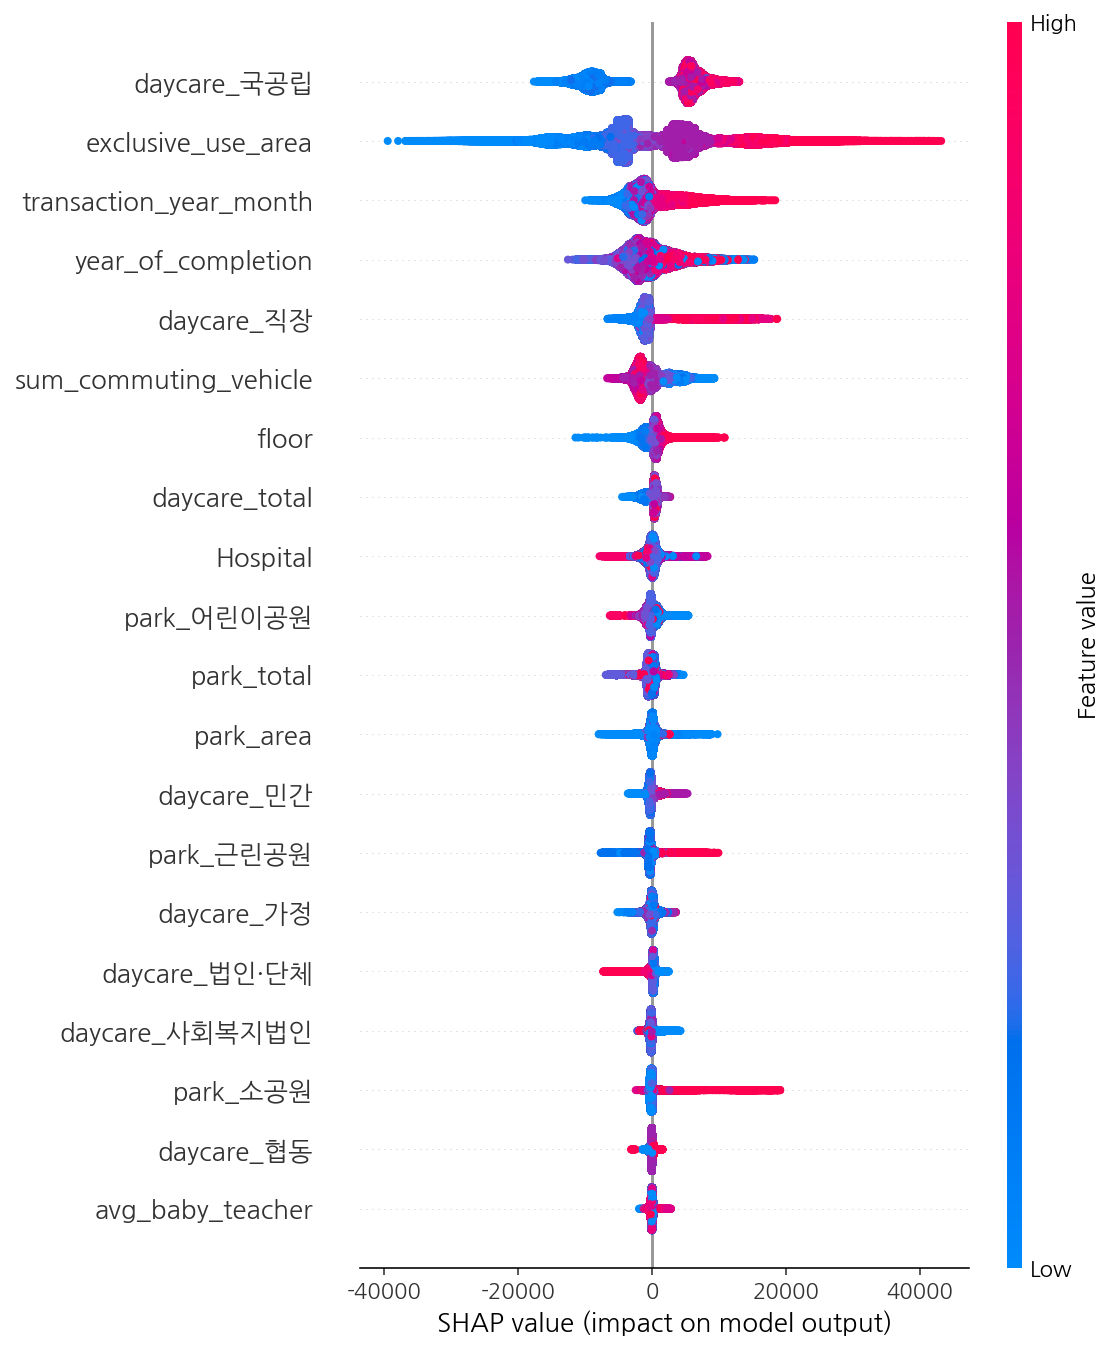

In [111]:
import shap
explainer = shap.Explainer(model)
# Assuming X_val is your validation data
shap_values = explainer.shap_values(X_test)
# Example of a summary plot
shap.summary_plot(shap_values, X_test)

In [ ]:
# 각 레코드에 대한 SHAP 값을 계산합니다.
shap_values = np.array([explainer.shap_values(x.values.reshape(1, -1)) for _, x in X_test.iterrows()])

# 요약 플롯을 생성합니다.
shap.summary_plot(shap_values, X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['font.family'] = 'Avenir'

X = train_df_merge.drop('transaction_real_price', axis=1)
y = train_df_merge['transaction_real_price']



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

Acc = []
Prec = []
Recall = []
F1 = []

for model in [DecisionTreeClassifier(), 
              RandomForestClassifier(), 
              svm.SVC(), 
              SGDClassifier(), 
              LogisticRegression(max_iter=10000),
              XGBClassifier()
              ]:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(model.__class__.__name__, accuracy_score(y_test, y_pred))
    Acc.append(accuracy_score(y_test, y_pred))
    Prec.append(precision_score(y_test, y_pred, average='weighted'))
    Recall.append(recall_score(y_test, y_pred, average='weighted'))
    F1.append(f1_score(y_test, y_pred, average='weighted'))

In [12]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

home = os.getenv('HOME') + '/aiffel/datathon_apt/data/' # 로컬에서 사용할 때 사용 하고 각자의 경로에 맞게 설정
# home = '/content/drive/MyDrive/data/'

In [13]:
train_df_merge = pd.read_csv(home + 'train_merged2.csv', index_col=0)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [15]:
X = train_df_merge.drop('transaction_real_price', axis=1)
y = train_df_merge['transaction_real_price']

In [16]:
# 데이터 분할 - train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=25)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((873435, 31), (374330, 31), (873435,), (374330,))

In [17]:
# Scikit-Learn을 사용한 단순 회귀 모델 훈련
model_sklearn = LinearRegression()
# fit
model_sklearn.fit(X_train, y_train)
# model_sklearn

LinearRegression()

In [18]:
# predict - 테스트 데이터에 대한 예측
y_pred_sklearn = model_sklearn.predict(X_test)
y_pred_sklearn

array([57749.67198234, 33184.3374513 , 25355.09621088, ...,
       36776.9470277 , 39589.53016252, 39376.89481953])

<AxesSubplot:xlabel='transaction_real_price'>

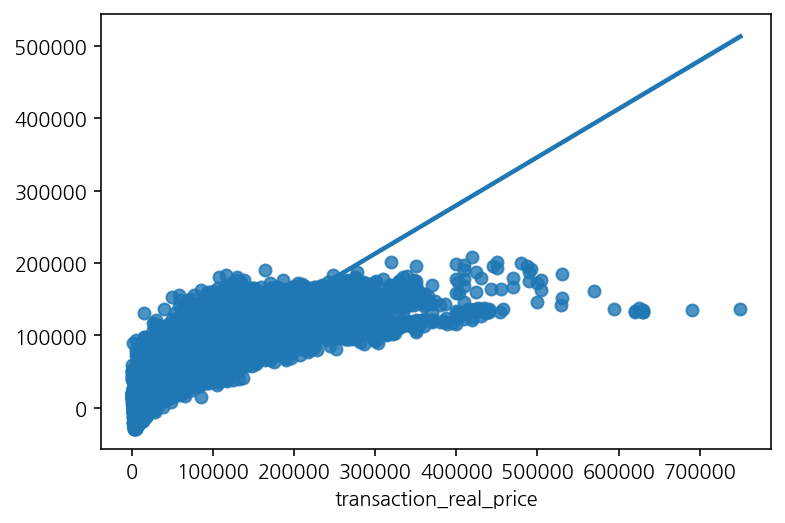

In [19]:
sns.regplot(x=y_test, y=y_pred_sklearn)

<AxesSubplot:xlabel='transaction_real_price'>

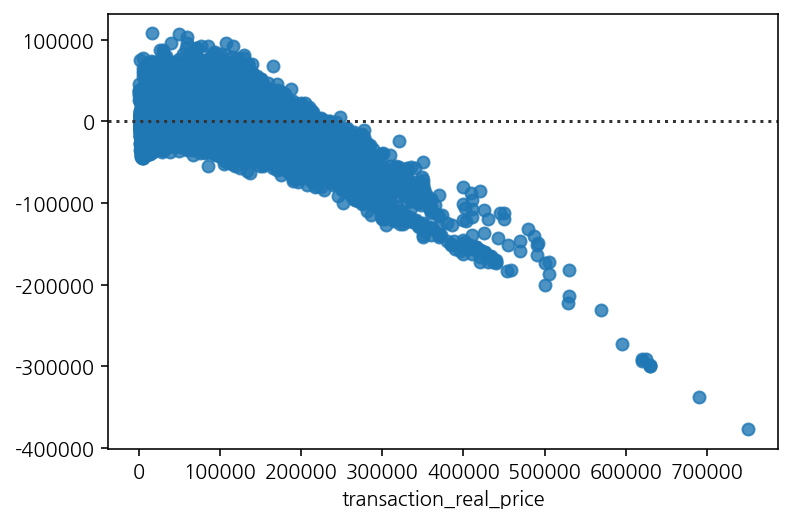

In [20]:
sns.residplot(x=y_test, y=y_pred_sklearn)

In [21]:
calculate_r_squared(y_test,y_pred_sklearn )

NameError: name 'calculate_r_squared' is not defined

In [22]:
model_sklearn.score(X_test, y_test)

0.6620641983693673

In [ ]:
r2_score(y_test, y_pred_sklearn)

In [23]:
# 모델 평가 - mean_squared_error
# mse_sklearn
mean_squared_error(y_test, y_pred_sklearn)

317599756.5449032

In [24]:
# MSE
mse = ((y_test - y_pred_sklearn) ** 2).mean()
mse

317599756.5449032

In [25]:
# RMSE
np.sqrt(mse)

17821.328697515884

In [26]:
# Statsmodels를 사용한 단순 회귀 모델 훈련
# Statsmodels에서 상수항을 추가 - sm.add_constant
X_train_ols = sm.add_constant(X_train)
model_ols = sm.OLS(y_train, X_train_ols).fit()
model_ols

In [27]:
# 테스트 데이터에 대한 예측
X_test_ols = sm.add_constant(X_test)
y_pred_ols = model_ols.predict(X_test_ols)
y_pred_ols

795508    57749.671982
37169     33184.337451
287242    25355.096211
954942    -6702.908549
998318     3481.034060
              ...     
397506    31005.805982
647201    48500.845658
143481    36776.947027
374336    39589.530162
133567    39376.894819
Length: 374330, dtype: float64

<AxesSubplot:xlabel='transaction_real_price'>

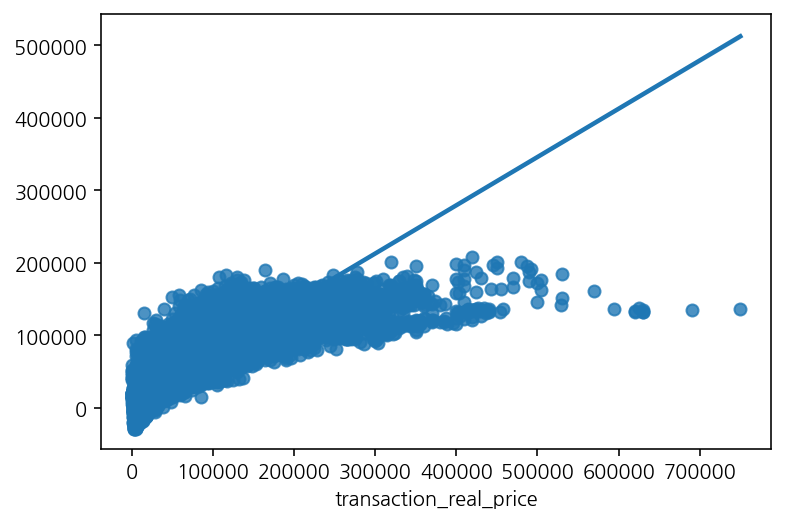

In [28]:
# 시각화: 회귀선과 산점도
sns.regplot(x=y_test, y=y_pred_ols)

In [29]:
# mean_squared_error
mse_ols = mean_squared_error(y_test, y_pred_ols)
r2_ols = r2_score(y_test, y_pred_ols)
mse_ols, r2_ols

(317599756.544894, 0.662064198369377)

In [30]:
# model_ols.summary()
print(model_ols.summary())

                              OLS Regression Results                              
Dep. Variable:     transaction_real_price   R-squared:                       0.660
Model:                                OLS   Adj. R-squared:                  0.660
Method:                     Least Squares   F-statistic:                 5.658e+04
Date:                    Sun, 25 Feb 2024   Prob (F-statistic):               0.00
Time:                            21:54:47   Log-Likelihood:            -9.8007e+06
No. Observations:                  873435   AIC:                         1.960e+07
Df Residuals:                      873404   BIC:                         1.960e+07
Df Model:                              30                                         
Covariance Type:                nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

In [32]:
# shap 가 없다면 설치
!pip install shap

     |████████████████████████████████| 535 kB 6.1 MB/s            


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train, y_train)

In [ ]:
import shap
explainer = shap.Explainer(model_ols)
# Assuming X_val is your validation data
shap_values = explainer.shap_values(X_test)
# Example of a summary plot
shap.summary_plot(shap_values, X_test)

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

home = os.getenv('HOME') + '/aiffel/datathon_apt/data/' # 로컬에서 사용할 때 사용 하고 각자의 경로에 맞게 설정
# home = '/content/drive/MyDrive/data/'

In [3]:
train_df_merge = pd.read_csv(home + 'train_merged2.csv', index_col=0)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [5]:
# StandardScaler를 사용하여 수치형 열을 표준화합니다.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = train_df_merge.drop('transaction_real_price', axis=1)
y = train_df_merge['transaction_real_price']

X_scaled = X.copy()
X_scaled[X.columns] = scaler.fit_transform(X)

In [6]:
# 데이터 분할 - train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=25)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((873435, 31), (374330, 31), (873435,), (374330,))

In [7]:
from sklearn.ensemble import RandomForestRegressor    
model = RandomForestRegressor(n_jobs=-1, random_state=25)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=25)

In [8]:
# 모델 요약 정보
# 특성 중요도 (Feature Importance)
feature_importances = model.feature_importances_

# 각 특성의 중요도 출력
for i, importance in enumerate(feature_importances):
    print(f"Feature {i+1}: Importance = {importance:.4f}")

Feature 1: Importance = 0.3686
Feature 2: Importance = 0.0856
Feature 3: Importance = 0.0383
Feature 4: Importance = 0.0014
Feature 5: Importance = 0.0178
Feature 6: Importance = 0.0036
Feature 7: Importance = 0.0033
Feature 8: Importance = 0.0016
Feature 9: Importance = 0.0029
Feature 10: Importance = 0.0873
Feature 11: Importance = 0.0022
Feature 12: Importance = 0.0055
Feature 13: Importance = 0.0058
Feature 14: Importance = 0.2624
Feature 15: Importance = 0.0010
Feature 16: Importance = 0.0043
Feature 17: Importance = 0.0025
Feature 18: Importance = 0.0146
Feature 19: Importance = 0.0226
Feature 20: Importance = 0.0058
Feature 21: Importance = 0.0001
Feature 22: Importance = 0.0000
Feature 23: Importance = 0.0004
Feature 24: Importance = 0.0090
Feature 25: Importance = 0.0002
Feature 26: Importance = 0.0133
Feature 27: Importance = 0.0005
Feature 28: Importance = 0.0001
Feature 29: Importance = 0.0075
Feature 30: Importance = 0.0174
Feature 31: Importance = 0.0145


In [ ]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# 트리 시각화 및 이미지 파일로 저장
for i, estimator in enumerate(model.estimators_):
    dot_data = export_graphviz(estimator, out_file=None, 
                               feature_names=[f"Feature {i+1}" for i in range(X.shape[1])], 
                               filled=True, rounded=True, special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data)
    graph.write_png(f"tree_{i}.png")

In [9]:
y_pred = model.predict(X_test)

<AxesSubplot:xlabel='transaction_real_price'>

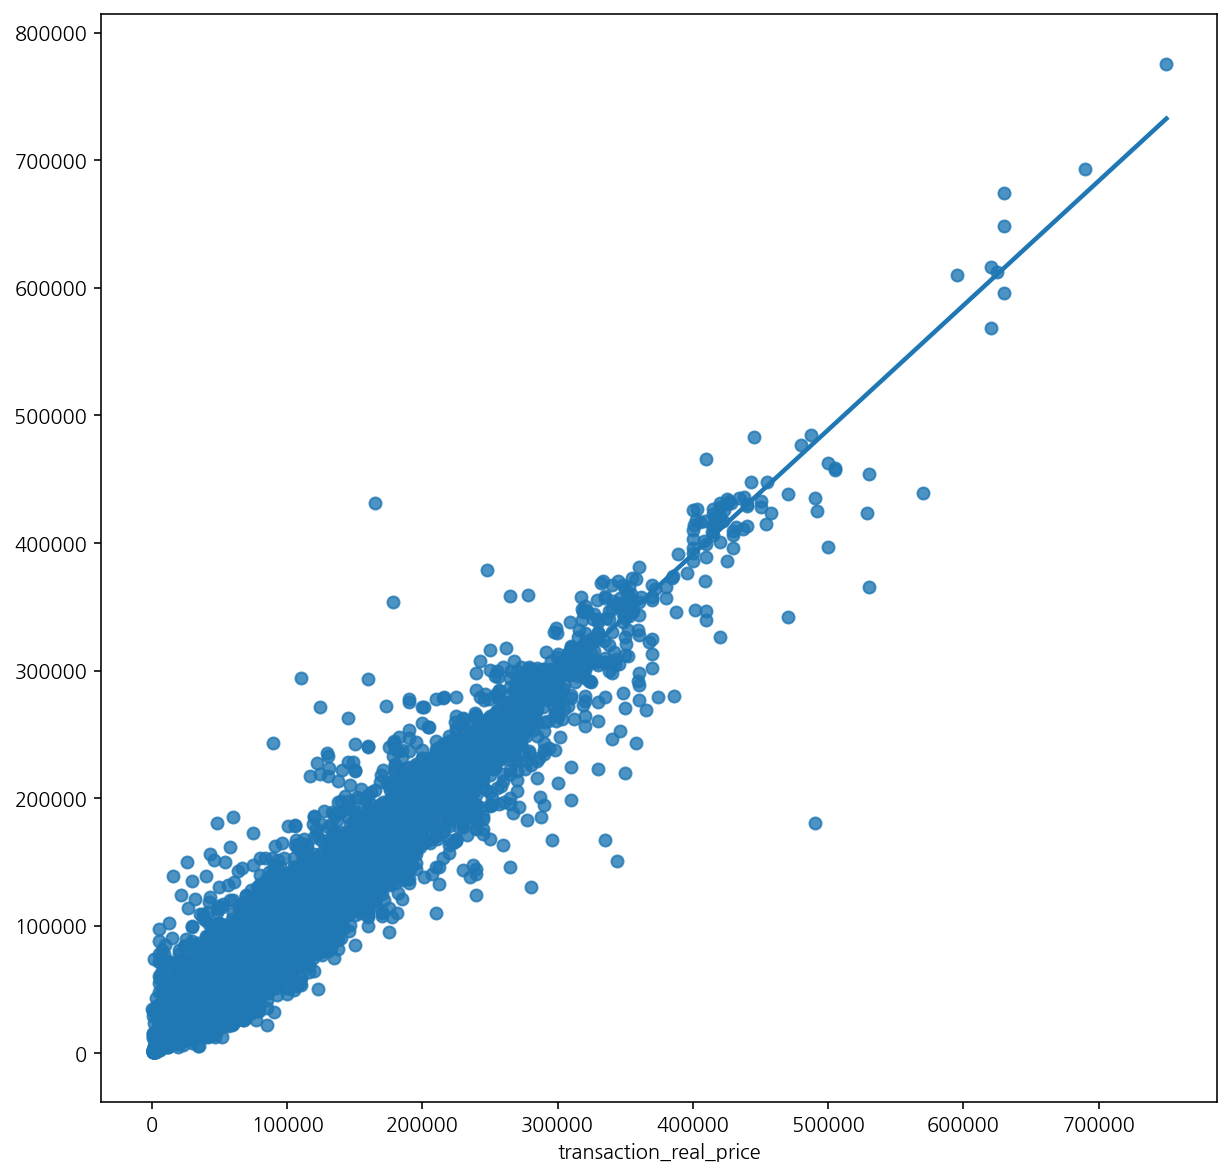

In [10]:
# 시각화: 회귀선과 산점도
fig = plt.figure(figsize=(10, 10))
sns.regplot(x=y_test, y=y_pred)

<AxesSubplot:xlabel='transaction_real_price'>

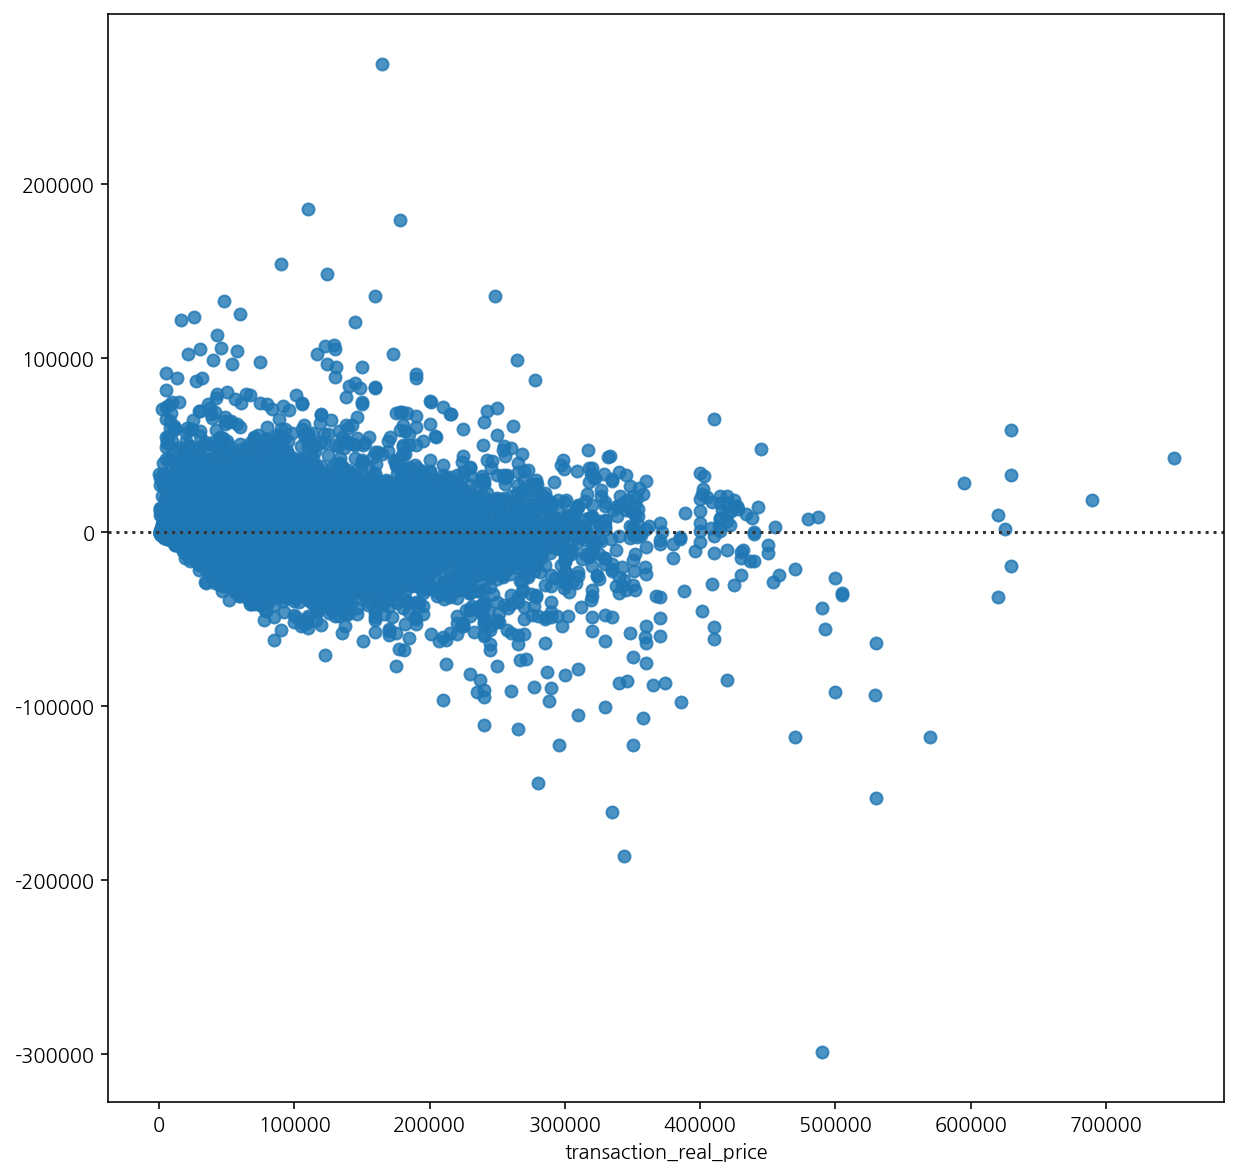

In [11]:
fig = plt.figure(figsize=(10, 10))
sns.residplot(x=y_test, y=y_pred)

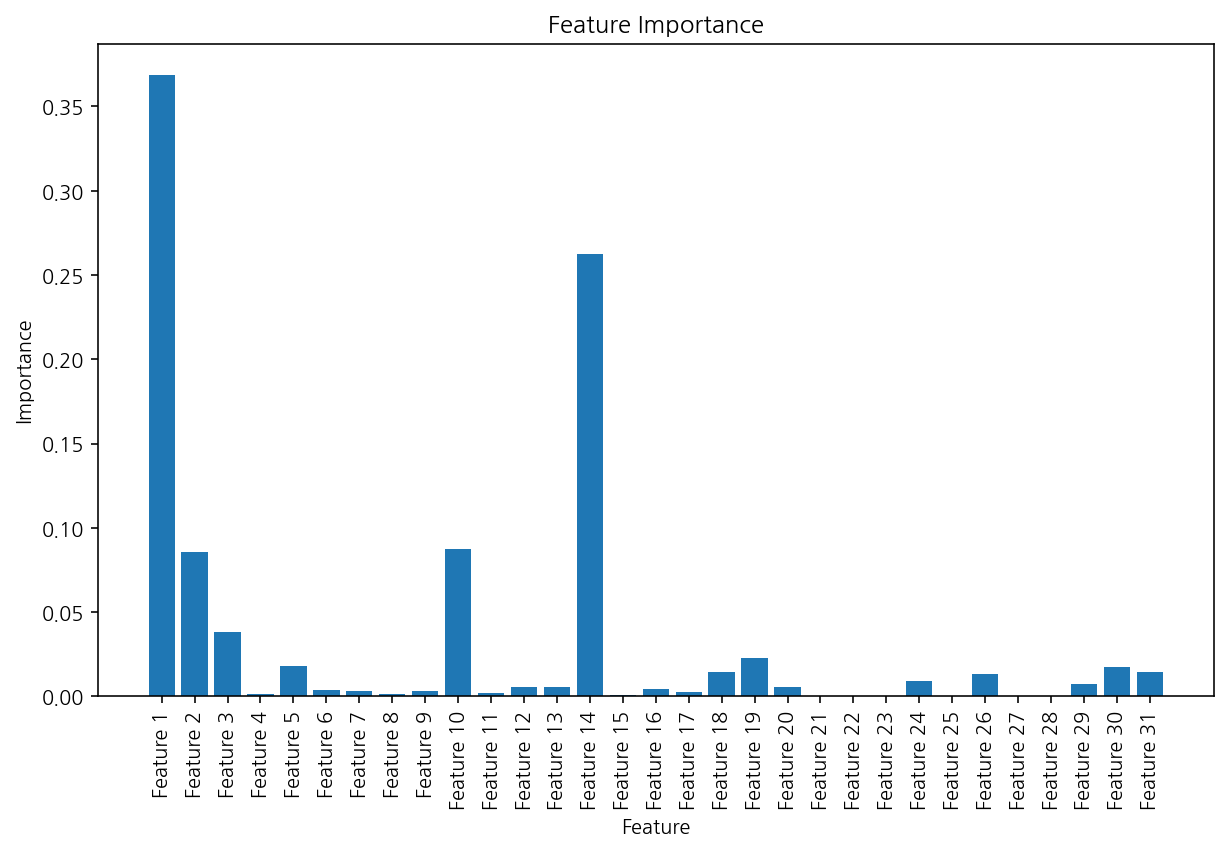

In [12]:
import matplotlib.pyplot as plt

# 특성 중요도 출력
feature_importances = model.feature_importances_

# Bar 그래프로 시각화
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances, tick_label=[f"Feature {i+1}" for i in range(len(feature_importances))])
plt.xlabel('Feature')
plt.xticks(rotation=90)
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()


In [13]:
!pip install eli5


     |████████████████████████████████| 216 kB 5.7 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 47 kB 7.2 MB/s             
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=b572dc435955cb7a5d1366067ed73c99919a48eed57bf8852149e16b2e95a2da
  Stored in directory: /aiffel/.cache/pip/wheels/7b/26/a5/8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Successfully built eli5


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

# Permutation Importance 계산
perm = PermutationImportance(model, random_state=25).fit(X_test, y_test)

# Permutation Importance 시각화
eli5.show_weights(perm, feature_names=[f"Feature {i+1}" for i in range(X.shape[1])])


/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


In [ ]:
!pip install shap

In [42]:
import shap

# 모델을 설명할 Explainer를 생성합니다.
explainer = shap.Explainer(model)

# 테스트 데이터에 대한 SHAP 값을 계산하고, 진행 상황을 표시합니다.
shap_values = explainer(X_test, progress_bar=True)

# 요약 플롯을 생성합니다.
shap.summary_plot(shap_values.values, X_test)


ImportError: cannot import name '_fit_context' from 'sklearn.base' (/opt/conda/lib/python3.9/site-packages/sklearn/base.py)

In [36]:
# !pip install pdpbox

     |████████████████████████████████| 35.8 MB 7.8 MB/s            
     |████████████████████████████████| 61 kB 567 kB/s             
     |████████████████████████████████| 18.2 MB 86.8 MB/s            
     |████████████████████████████████| 288 kB 72.2 MB/s            
     |████████████████████████████████| 333 kB 83.4 MB/s            
     |████████████████████████████████| 12.2 MB 72.0 MB/s            
     |████████████████████████████████| 15.7 MB 68.6 MB/s            
     |████████████████████████████████| 3.2 MB 72.9 MB/s            
     |████████████████████████████████| 297.1 MB 4.0 kB/s              
     |████████████████████████████████| 2.8 MB 74.5 MB/s            
     |████████████████████████████████| 13.0 MB 69.2 MB/s            
     |████████████████████████████████| 11.6 MB 73.1 MB/s            
     |████████████████████████████████| 78 kB 13.4 MB/s             
     |████████████████████████████████| 310 kB 71.7 MB/s            
     |█████████████████████

     |███████████████████████████████▋| 16.7 MB 75.6 MB/s eta 0:00:01     |████████████████████████████████| 16.8 MB 75.6 MB/s            
  Attempting uninstall: Pygments
    Found existing installation: Pygments 2.10.0
    Uninstalling Pygments-2.10.0:
      Successfully uninstalled Pygments-2.10.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.4
    Uninstalling numpy-1.21.4:
      Successfully uninstalled numpy-1.21.4
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.62.3
    Uninstalling tqdm-4.62.3:
      Successfully uninstalled tqdm-4.62.3
  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.8.9
    Uninstalling tabulate-0.8.9:
      Successfully uninstalled tabulate-0.8.9
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.4.2
    Unins

In [38]:
# from pdpbox import pdp, get_dataset, info_plots

# # 특정 특성에 대한 PDP 계산
# feature_name = X_test.columns
# pdp_dist = pdp.pdp_isolate(model=model, dataset=X_test, model_features=X_test.columns, feature=feature_name)

# # PDP 시각화
# pdp.pdp_plot(pdp_dist, feature_name)
# plt.show()


AttributeError: module 'matplotlib.cbook' has no attribute '_make_class_factory'

In [ ]:
import shap
import xgboost

# 데이터를 로드합니다.
X, y = shap.datasets.adult()
model = xgboost.XGBClassifier().fit(X, y)

# 진행 상황을 표시하면서 SHAP 값을 계산합니다.
explainer = shap.Explainer(model, X, l1_reg="num_features(10)")
shap_values = explainer(X)
